<a href="https://colab.research.google.com/github/JuanMelendres/proyecto_integrador_equipo19/blob/master/Avance2_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Avance 2. Ingeniería de características

##Optimización de flujos quirúrgicos mediante IA

###Oscar Damián Vela Noyola A00821831
###Juan Antonio Melendres Villa A00369017
###Miguel Ángel Villanueva Amador A01793890


#### Librerías

Importamos las librerias que se llegaran a necesitar

In [1]:
# --- Importaciones esenciales para análisis de datos y visualización ---
import pandas as pd  # Manipulación y análisis eficiente de datos tabulares
import numpy as np  # Operaciones matemáticas avanzadas y manejo eficiente de arrays
import matplotlib.pyplot as plt  # Creación de gráficos personalizados
import seaborn as sns  # Gráficos estadísticos más estéticos, basados en matplotlib

# --- Estadística, clustering y transformación de datos ---
from scipy import stats  # Funciones estadísticas avanzadas (pruebas de hipótesis, correlaciones)
from sklearn.cluster import KMeans  # Clustering no supervisado para agrupamiento de datos
from sklearn.preprocessing import MinMaxScaler  # Normalización de datos en un rango (0,1)
from sklearn.preprocessing import OneHotEncoder  # Codificación de variables categóricas en formato numérico
from sklearn.preprocessing import PowerTransformer  # Transformaciones estadísticas (como Yeo-Johnson)
from sklearn.decomposition import PCA  # Análisis de Componentes Principales (PCA) para reducción de dimensionalidad
from sklearn.preprocessing import StandardScaler  # Estandarización de datos, útil para algoritmos que requieren datos escalados

# --- Procesamiento de texto ---
import re  # Manipulación avanzada de texto mediante expresiones regulares
import unicodedata  # Normalización de texto (remover acentos y caracteres especiales)
from collections import Counter  # Conteo eficiente de elementos (frecuencia de palabras o categorías)
from wordcloud import WordCloud  # Generación de nubes de palabras para visualización de texto

# --- Modelado de texto y análisis de temas ---
from sklearn.feature_extraction.text import TfidfVectorizer  # Vectorización del texto mediante TF-IDF
from gensim import corpora  # Creación de corpus para análisis de texto en modelos temáticos
from gensim.models import LsiModel  # Modelado de temas mediante Latent Semantic Indexing (LSI)
from gensim.models import CoherenceModel  # Evaluación de coherencia para modelos de temas

# --- Modelos de Machine Learning ---
from sklearn.ensemble import RandomForestRegressor  # Algoritmo de regresión basado en árboles de decisión
from sklearn.linear_model import LinearRegression  # Regresión lineal para análisis de relaciones lineales
from sklearn.model_selection import train_test_split  # División de datos en conjuntos de entrenamiento y prueba
from sklearn.metrics import mean_absolute_error, r2_score  # Métricas para evaluación de modelos de regresión
from sklearn.feature_selection import chi2  # Selección de características mediante chi-cuadrado
from sklearn.preprocessing import LabelEncoder  # Codificación de etiquetas categóricas

# --- Modelos de clasificación y evaluación ---
from sklearn.linear_model import LogisticRegression  # Regresión logística para tareas de clasificación
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Métricas para evaluación de clasificación

# --- Gestión de advertencias ---
import warnings  # Control de advertencias
warnings.filterwarnings('ignore')  # Supresión de todas las advertencias para evitar ruido en la salida

#### Cargar set de datos original

Cargamos el data set original

In [2]:
# Load the data from the first sheet, and assign it to variable "df"
df = pd.read_excel('PQ.xlsx')
# Show the first 10 rows using dataframe.head() method
df.head(10)

,id,num,registro,edad,sexo,peso,tallacm,tallam,imc,Diabetes Mellitus (DM),...,observaciones,complicaciones30das,var103,obesidad,edadmayor60,hiperglucemia,dmdescontrol,complicacion,bhcanormal,qsanormal
0,1,713.0,745957,43,1,70.0,170.0,1.70,24.22,0.0,...,NaN,NaN,NaN,0,0,0,0.0,0,0,0
1,2,899.0,715767,19,2,62.0,160.0,1.60,24.22,0.0,...,NaN,NaN,NaN,0,0,0,0.0,0,0,1
2,3,1414.0,718835,63,2,60.0,160.0,1.60,23.44,1.0,...,NaN,NaN,NaN,0,1,0,0.0,0,1,1
3,4,1664.0,780065,40,2,71.0,157.0,1.57,28.80,0.0,...,NaN,NaN,NaN,0,0,0,0.0,0,1,0
4,5,533.0,761613,52,1,73.0,161.0,1.61,28.16,0.0,...,NaN,NaN,NaN,0,0,0,0.0,0,1,0
5,6,1327.0,718672,27,1,67.0,160.0,1.60,26.17,0.0,...,NaN,NaN,NaN,0,0,0,0.0,0,1,1
6,7,NaN,763027,78,1,70.0,170.0,1.70,24.22,0.0,...,NaN,NaN,NaN,0,1,0,0.0,0,1,1
7,8,881.0,749454,74,2,71.6,147.0,1.47,33.13,0.0,...,NaN,NaN,NaN,1,1,0,0.0,0,0,1
8,9,1079.0,749394,52,2,89.0,154.0,1.54,37.53,1.0,...,NaN,NaN,NaN,1,0,0,0.0,0,1,1
9,10,1977.0,782561,43,2,60.0,160.0,1.60,23.44,0.0,...,NaN,NaN,NaN,0,0,0,0.0,0,0,1


In [3]:
df.shape[0] # CANTIDAD DE RENGLONES

2115

### VARIABLES CATEGÓRICAS

#### Sexo a binario

In [4]:
df['sexo_binary'] = df['sexo'].map({2: 0, 1: 1}).fillna(-1).astype(int)

Generamos una nueva columna llamada sexo_binary que contiene valores binarios basados en los datos originales de la columna sexo.

#### Codificación one-hot para el tipo de anestesia

In [5]:
# Verificar si hay valores nulos antes de realizar la operación
if df['clasificacionanestes'].isna().sum() > 0:
    # Calcular la moda (puede haber múltiples modas, por lo que seleccionamos una aleatoriamente si es necesario)
    modas = df['clasificacionanestes'].mode()
    moda_final = modas.sample(1).iloc[0]  # Seleccionar una moda aleatoria si hay más de una

    # Rellenar los valores nulos con la moda seleccionada
    df['clasificacionanestes'].fillna(moda_final, inplace=True)

Reemplazar valores nulos con la moda es una estrategia de imputación simple y útil cuando los valores más comunes son representativos del conjunto de datos. Al verificar si hay valores nulos antes de realizar la imputación.

In [6]:
# Inicializar OneHotEncoder con drop='first' para evitar multicolinealidad
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Aplicar One-Hot Encoding a la columna 'clasificacionanestes'
encoded_data = encoder.fit_transform(df[['clasificacionanestes']])

# Obtener los nombres de las columnas generadas con prefijo 'anestesia'
column_names = [f"anestesia_{cat}" for cat in encoder.categories_[0][1:]]

# Crear un DataFrame con los datos codificados y los nuevos nombres de columnas
encoded_df = pd.DataFrame(encoded_data, columns=column_names)

# Concatenar el DataFrame original con las nuevas columnas
df = pd.concat([df.drop(columns=['clasificacionanestes']), encoded_df], axis=1)

# Mostrar las primeras filas del DataFrame resultante
df.head(10)

,id,num,registro,edad,sexo,peso,tallacm,tallam,imc,Diabetes Mellitus (DM),...,hiperglucemia,dmdescontrol,complicacion,bhcanormal,qsanormal,sexo_binary,anestesia_2,anestesia_3,anestesia_4,anestesia_5
0,1,713.0,745957,43,1,70.0,170.0,1.70,24.22,0.0,...,0,0.0,0,0,0,1,1.0,0.0,0.0,0.0
1,2,899.0,715767,19,2,62.0,160.0,1.60,24.22,0.0,...,0,0.0,0,0,1,0,0.0,0.0,0.0,0.0
2,3,1414.0,718835,63,2,60.0,160.0,1.60,23.44,1.0,...,0,0.0,0,1,1,0,0.0,0.0,0.0,0.0
3,4,1664.0,780065,40,2,71.0,157.0,1.57,28.80,0.0,...,0,0.0,0,1,0,0,0.0,0.0,0.0,0.0
4,5,533.0,761613,52,1,73.0,161.0,1.61,28.16,0.0,...,0,0.0,0,1,0,1,0.0,0.0,0.0,0.0
5,6,1327.0,718672,27,1,67.0,160.0,1.60,26.17,0.0,...,0,0.0,0,1,1,1,0.0,0.0,0.0,0.0
6,7,NaN,763027,78,1,70.0,170.0,1.70,24.22,0.0,...,0,0.0,0,1,1,1,0.0,0.0,0.0,0.0
7,8,881.0,749454,74,2,71.6,147.0,1.47,33.13,0.0,...,0,0.0,0,0,1,0,1.0,0.0,0.0,0.0
8,9,1079.0,749394,52,2,89.0,154.0,1.54,37.53,1.0,...,0,0.0,0,1,1,0,0.0,0.0,0.0,0.0
9,10,1977.0,782561,43,2,60.0,160.0,1.60,23.44,0.0,...,0,0.0,0,0,1,0,0.0,0.0,0.0,0.0


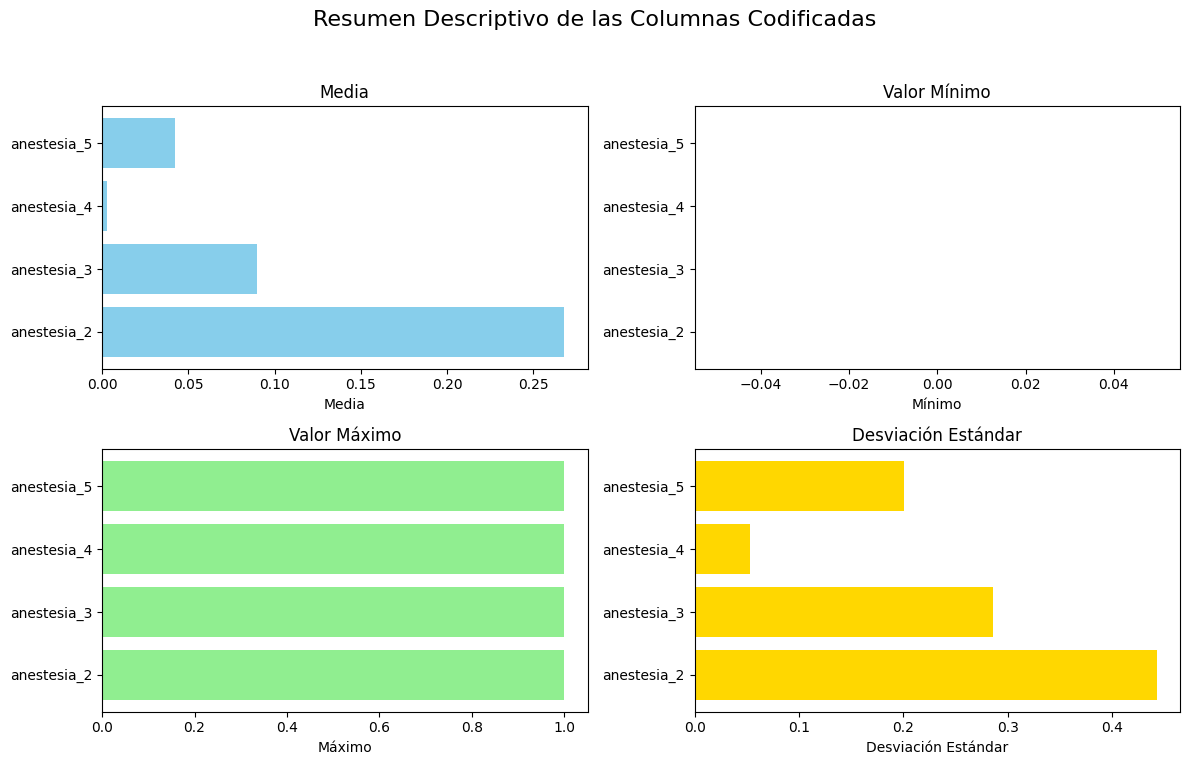

In [7]:
# Generar resumen descriptivo para las columnas numéricas generadas
encoded_summary = encoded_df.describe().T

# Visualización gráfica del resumen descriptivo
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Resumen Descriptivo de las Columnas Codificadas', fontsize=16)

# Graficar la media (mean)
axes[0, 0].barh(encoded_summary.index, encoded_summary['mean'], color='skyblue')
axes[0, 0].set_title('Media')
axes[0, 0].set_xlabel('Media')

# Graficar el mínimo (min)
axes[0, 1].barh(encoded_summary.index, encoded_summary['min'], color='lightcoral')
axes[0, 1].set_title('Valor Mínimo')
axes[0, 1].set_xlabel('Mínimo')

# Graficar el máximo (max)
axes[1, 0].barh(encoded_summary.index, encoded_summary['max'], color='lightgreen')
axes[1, 0].set_title('Valor Máximo')
axes[1, 0].set_xlabel('Máximo')

# Graficar la desviación estándar (std)
axes[1, 1].barh(encoded_summary.index, encoded_summary['std'], color='gold')
axes[1, 1].set_title('Desviación Estándar')
axes[1, 1].set_xlabel('Desviación Estándar')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

One-Hot Encoding permite convertir variables categóricas en datos numéricos, lo que es necesario para muchos modelos de machine learning, como regresión logística, árboles de decisión, o redes neuronales, que no pueden trabajar directamente con datos categóricos.

  * Media: Muestra la proporción de veces que cada valor es 1.
  
  * Mínimo y Máximo: Verifica que los valores estén correctamente codificados entre 0 y 1.
  
  * Desviación Estándar: Indica la dispersión de los valores.

Este código transforma una variable categórica en varias columnas binarias, facilitando su uso en algoritmos de machine learning.

In [8]:
# Mostrar las primeras 10 filas de las nuevas columnas generadas
print("Primeras 10 filas con las nuevas columnas generadas:")
df[column_names].head(10)

Primeras 10 filas con las nuevas columnas generadas:


,anestesia_2,anestesia_3,anestesia_4,anestesia_5
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0


Este código muestra las nuevas columnas generadas por el OneHotEncoder sin incluir la columna original 'clasificacionanestes'. Así, se evita redundancia y se asegura que el DataFrame esté preparado para su uso en modelos predictivos.

#### nitritos a binario

Estas categorías requieren manejo adecuado según su significado en el contexto del análisis. Por ejemplo:

Creamos un Diccionario de Mapeo:

  * Cada categoría de 'nitritos' se asigna explícitamente a 0 o 1 según su significado.
    * 1: 'POSITIVO', 100, 75, 'PEND' (presencia).
    * 0: 'NEGATIVO', 'NR', 'NSR', '.', 'NE' (ausencia).
  
  * Los valores nan deberían tratarse explícitamente (rellenando o eliminando).

In [9]:
# Definir el mapeo explícito de las categorías encontradas en 'nitritos'
nitritos_mapping = {
    'NEGATIVO': 0,
    'NR': 0,
    'POSITIVO': 1,
    100: 1,
    '.': 0,
    'NSR': 0,
    75: 1,
    'NE': 0,
    'PEND': 1
}

# Aplicar el mapeo y manejar los valores nulos explícitamente
df['nitritos_binary'] = df['nitritos'].fillna('.').map(lambda x: nitritos_mapping.get(x, 0))

# Mostrar las primeras filas para verificar el resultado
df[['nitritos', 'nitritos_binary']].head(10)

,nitritos,nitritos_binary
0,NEGATIVO,0
1,NEGATIVO,0
2,NR,0
3,NR,0
4,NR,0
5,NR,0
6,NEGATIVO,0
7,NEGATIVO,0
8,NEGATIVO,0
9,NEGATIVO,0


Este código transforma una columna de texto en una variable binaria, útil para análisis o modelado. Garantiza que todas las categorías de 'nitritos' se manejen de manera explícita y coherente con los resultados esperados. Además, asegura que los valores nulos o desconocidos se traten adecuadamente.

In [10]:
# Generar un resumen descriptivo de la columna 'nitritos_binary'
nitritos_binary_summary = df['nitritos_binary'].describe()

# Mostrar el resumen descriptivo
nitritos_binary_summary

,nitritos_binary
count,2115.000000
mean,0.035461
std,0.184986
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Este resumen sugiere que solo una pequeña fracción de los registros (3.5%) tienen valores positivos o relevantes en la columna 'nitritos'. La mayoría de los registros tienen un valor binario de 0, indicando que no se detectó nitrito positivo o que los valores reportados no son significativos en términos de presencia.

#### egoinfeccin a binario

Diccionario de Mapeo:

  * El diccionario egoinfeccin_mapping convierte las categorías 'SÍ' en 1 y 'NO' en 0, indicando si hubo infección.

Manejo de Valores Nulos:

  * Los valores nulos en 'egoinfeccin' se reemplazan por 'NO', lo que asegura que todos los datos se manejen consistentemente.

Uso de map():

  * Se utiliza map() para transformar los valores de la columna original según el diccionario de mapeo, asignando 1 o 0.

In [11]:
# Definir mapeo explícito para convertir las categorías a valores binarios
egoinfeccin_mapping = {
    'Si': 1,   # Presencia de infección
    'No': 0,   # Ausencia de infección
}

# Crear la nueva columna 'egoinfeccin_binary' con valores binarios
df['egoinfeccin_binary'] = df['egoinfeccin'].fillna('NO').map(lambda x: egoinfeccin_mapping.get(str(x).strip().upper(), 0))

# Verificar el resultado
df[['egoinfeccin', 'egoinfeccin_binary']].head(10)

,egoinfeccin,egoinfeccin_binary
0,NO,0
1,NO,0
2,NaN,0
3,NaN,0
4,NaN,0
5,NaN,0
6,NO,0
7,NO,0
8,NO,0
9,NO,0


In [12]:
# Asegurarse de que la variable sea de tipo entero
df['egoinfeccin_binary'] = df['egoinfeccin_binary'].astype(int)

# Verificar el tipo de datos
df['egoinfeccin_binary'].dtypes

dtype('int64')

Este código convierte los valores de una columna de texto en una variable binaria (0 o 1) basada en si los valores comienzan con 'S'. Esto es útil para preparar los datos para análisis o modelos de machine learning que requieren variables numéricas.

#### egoanormal a binario

Diccionario de Mapeo:

  * Se define un diccionario que asigna el valor 1 a "Sí" y el valor 0 a "No"

Manejo de Valores Nulos:

  * Si existen valores nulos en la columna 'egoanormal', se rellenan con 'No' para evitar errores durante la transformación.

Uso de map():

  * Usando el método map(), se aplica el diccionario de mapeo a la columna egoanormal y se guarda el resultado en una nueva columna llamada egoanormal_binary

In [13]:
# Definir el mapeo para transformar 'Sí' a 1 y 'No' a 0
egoanormal_mapping = {
    'SI': 1,
    'NO': 0
}

# Crear la nueva columna 'egoanormal_binary' con valores binarios
df['egoanormal_binary'] = df['egoanormal'].fillna('NO').map(lambda x: egoanormal_mapping.get(str(x).strip().upper(), 0))

# Verificar el resultado mostrando las primeras filas
df[['egoanormal', 'egoanormal_binary']].head(10)

,egoanormal,egoanormal_binary
0,SI,1
1,NO,0
2,NaN,0
3,NaN,0
4,NaN,0
5,NaN,0
6,NO,0
7,NO,0
8,NO,0
9,NO,0


In [14]:
# Asegurarse de que la variable sea de tipo entero
df['egoinfeccin_binary'] = df['egoinfeccin_binary'].astype(int)

# Verificar el tipo de datos
df['egoinfeccin_binary'].dtypes

dtype('int64')

La variable egoanormal debe transformarse porque los valores "Si" y "No" son categóricos, y los modelos de machine learning requieren datos numéricos. Al transformarla a 1 y 0, haces que esta variable sea más adecuada para análisis y predicciones, permitiendo que los modelos entiendan la información de manera efectiva.

### Transformaciones numéricas

In [15]:
def analizar_variable(df, variable):
    # Asegúrate de que la variable no contenga valores negativos o cero
    if df[variable].isnull().any():
        print(f"Se encontraron valores nulos en {variable}. Se eliminarán o reemplazarán.")
        df[variable].fillna(df[variable].mean(), inplace=True)  # Reemplazar nulos con la media (puedes ajustar esto)

    # Para Box-Cox, asegurarse que todos los valores sean positivos
    min_value = df[variable].min()
    if min_value <= 0:
        print(f"Transformación Box-Cox no se puede aplicar a {variable} debido a valores <= 0. Se ajustarán.")
        df[variable] = df[variable] + (1 - min_value)  # Ajustar los valores para que sean todos positivos

    # Transformaciones
    log_variable = np.log(df[variable])
    exp_variable = np.exp(df[variable] - df[variable].mean())  # Centrado para evitar overflow
    sqrt_variable = np.sqrt(df[variable])

    # Box-Cox (intenta aplicar solo si hay valores válidos)
    try:
        boxcox_variable, _ = stats.boxcox(df[variable])
    except ValueError as e:
        print(f"Box-Cox no se pudo aplicar a {variable}: {e}")
        boxcox_variable = np.nan  # Manejo como NaN si falla

    # Yeo-Johnson (funciona con valores negativos y cero)
    yeo_johnson_variable, _ = stats.yeojohnson(df[variable])

    # Normalidad
    normalidad_results = {
        'Original': stats.shapiro(df[variable]),
        'Logarítmica': stats.shapiro(log_variable),
        'Exponencial': stats.shapiro(exp_variable),
        'Raíz Cuadrada': stats.shapiro(sqrt_variable),
    }

    # Añadir Box-Cox si fue exitoso
    if isinstance(boxcox_variable, np.ndarray):
        normalidad_results['Box-Cox'] = stats.shapiro(boxcox_variable)

    # Añadir Yeo-Johnson
    normalidad_results['Yeo-Johnson'] = stats.shapiro(yeo_johnson_variable)

    # Gráficos
    plt.figure(figsize=(18, 12))

    # Histograma original
    plt.subplot(3, 2, 1)
    plt.hist(df[variable], bins=20, color='blue', alpha=0.7)
    plt.title(f'Histograma de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')

    # Histograma logarítmico
    plt.subplot(3, 2, 2)
    plt.hist(log_variable, bins=20, color='orange', alpha=0.7)
    plt.title(f'Histograma de {variable} Logarítmica')
    plt.xlabel(f'Log({variable})')
    plt.ylabel('Frecuencia')

    # Histograma exponencial
    plt.subplot(3, 2, 3)
    plt.hist(exp_variable, bins=20, color='green', alpha=0.7)
    plt.title(f'Histograma de {variable} Exponencial')
    plt.xlabel(f'Exp({variable})')
    plt.ylabel('Frecuencia')

    # Histograma raíz cuadrada
    plt.subplot(3, 2, 4)
    plt.hist(sqrt_variable, bins=20, color='purple', alpha=0.7)
    plt.title(f'Histograma de {variable} Raíz Cuadrada')
    plt.xlabel(f'√{variable}')
    plt.ylabel('Frecuencia')

    # Histograma Box-Cox
    if isinstance(boxcox_variable, np.ndarray):
        plt.subplot(3, 2, 5)
        plt.hist(boxcox_variable, bins=20, color='red', alpha=0.7)
        plt.title(f'Histograma de Box-Cox de {variable}')
        plt.xlabel(f'Box-Cox({variable})')
        plt.ylabel('Frecuencia')
    else:
        plt.subplot(3, 2, 5)
        plt.text(0.5, 0.5, 'Box-Cox no se pudo aplicar', fontsize=14, ha='center')

    # Histograma Yeo-Johnson
    plt.subplot(3, 2, 6)
    plt.hist(yeo_johnson_variable, bins=20, color='cyan', alpha=0.7)
    plt.title(f'Histograma de Yeo-Johnson de {variable}')
    plt.xlabel(f'Yeo-Johnson({variable})')
    plt.ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

    # Resultados de normalidad
    print(f"\nResultados de normalidad para {variable}:")
    for transformation, result in normalidad_results.items():
        print(f"{transformation}: Estadístico = {result.statistic:.4f}, p-value = {result.pvalue:.4f}")

Este código realiza una serie de transformaciones y pruebas de normalidad sobre una variable numérica, lo que es útil para preparar datos para modelos estadísticos y machine learning.

In [16]:
scaler = MinMaxScaler(feature_range=(-1, 1))

El uso de MinMaxScaler garantiza que los datos estén dentro de un rango predefinido (aquí, -1 a 1), manteniendo las proporciones originales. Este escalado es útil para preparar datos para algoritmos de machine learning y mejorar la precisión de los modelos que dependen de la escala de las variables.

#### Edad

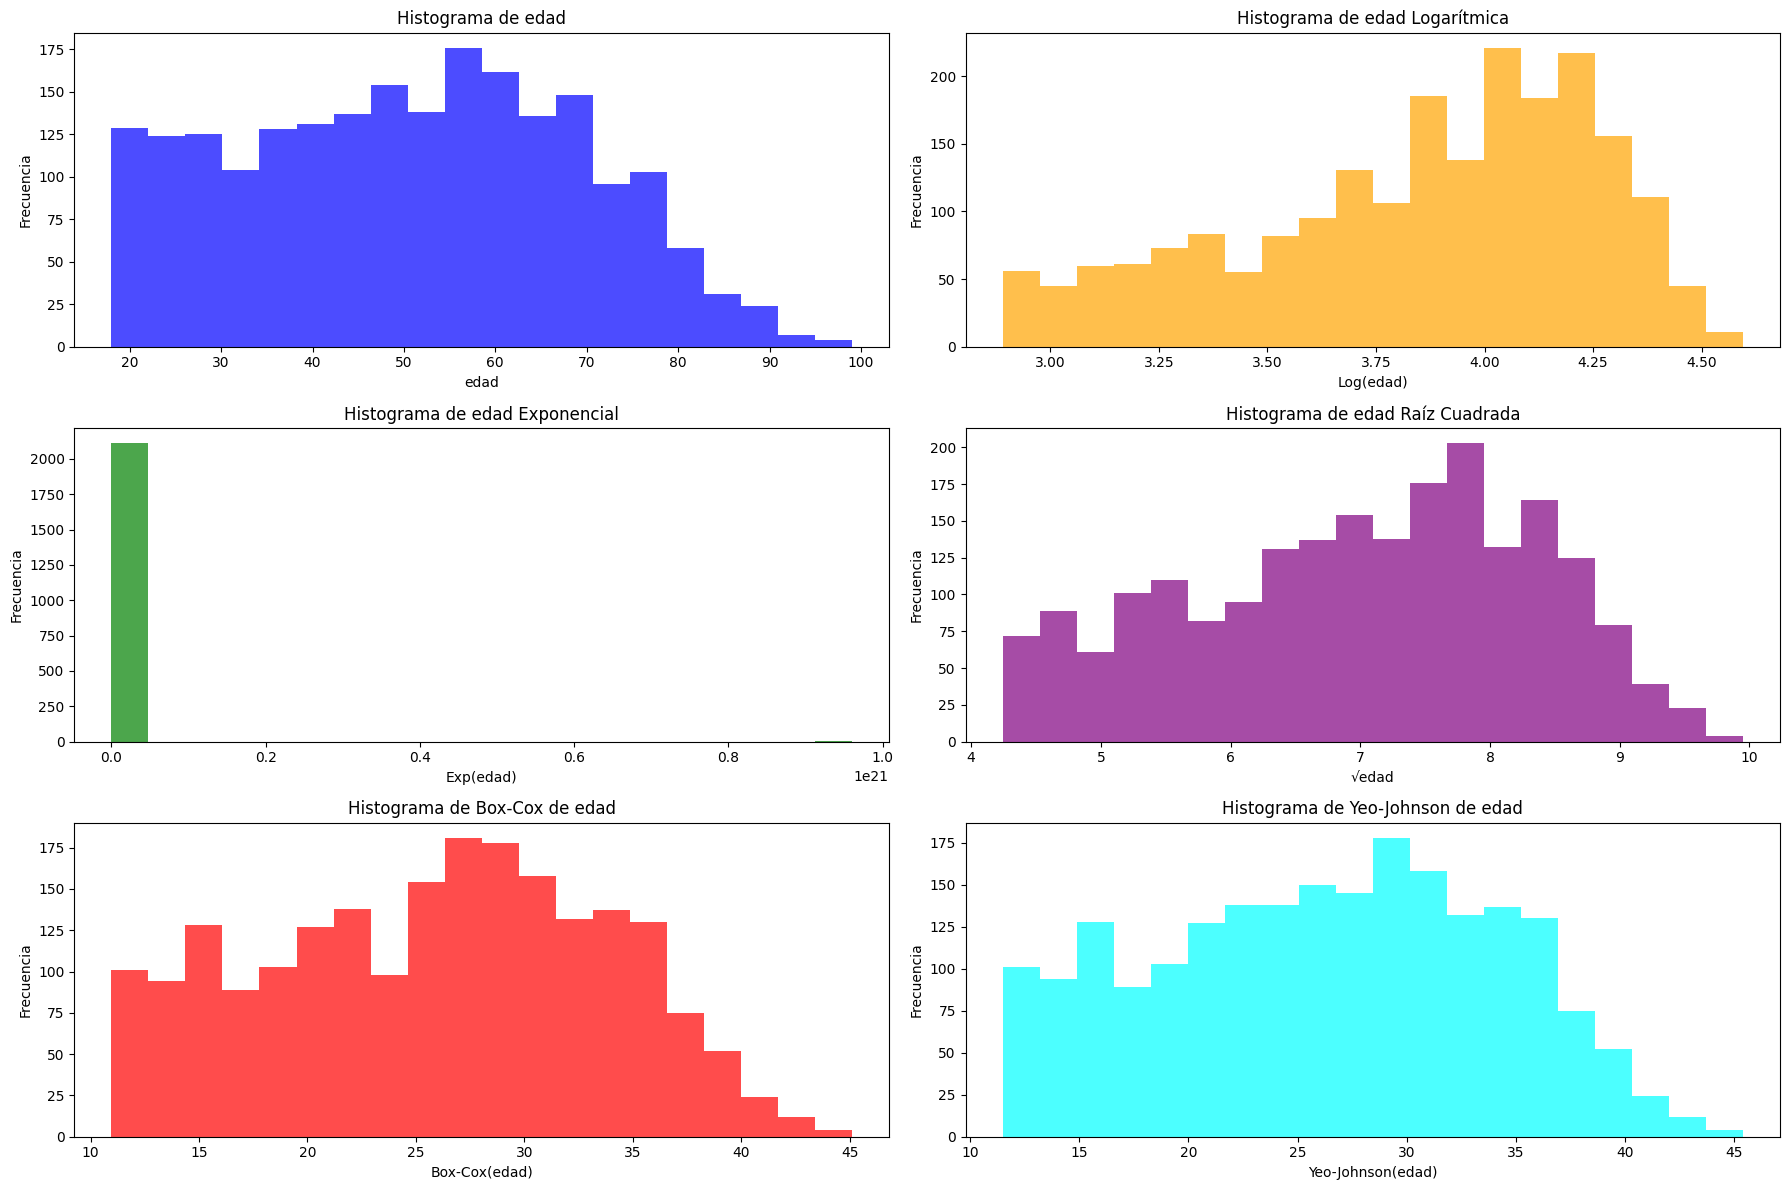


Resultados de normalidad para edad:
Original: Estadístico = 0.9773, p-value = 0.0000
Logarítmica: Estadístico = 0.9478, p-value = 0.0000
Exponencial: Estadístico = 0.0119, p-value = 0.0000
Raíz Cuadrada: Estadístico = 0.9708, p-value = 0.0000
Box-Cox: Estadístico = 0.9764, p-value = 0.0000
Yeo-Johnson: Estadístico = 0.9764, p-value = 0.0000


In [17]:
analizar_variable(df, "edad")

Este código invoca la función analizar_variable sobre la columna 'edad' del DataFrame df. La función fue definida previamente para realizar transformaciones estadísticas y pruebas de normalidad sobre una variable específica.

Al analizar una variable numérica (edad en este caso) para preparar los datos antes de su uso en modelos estadísticos o de machine learning. Las transformaciones aplicadas (como Box-Cox o Yeo-Johnson) son útiles para lograr que los datos se acerquen a una distribución normal, lo que mejora el rendimiento de muchos modelos.

In [18]:
# Verificar si hay valores nulos antes de aplicar la transformación
if df["edad"].isnull().any():
    print("Advertencia: Se encontraron valores nulos en 'edad'. Se reemplazarán con la media.")
    df["edad"].fillna(df["edad"].mean(), inplace=True)

# Inicializar el transformador Yeo-Johnson sin estandarización (standardize=False)
transformer = PowerTransformer(method="yeo-johnson", standardize=False)

# Aplicar la transformación Yeo-Johnson a la columna 'edad'
df["edad_yj"] = transformer.fit_transform(df[["edad"]])

# Aplicar MinMaxScaler para normalizar después de la transformación
df["edad_n"] = scaler.fit_transform(df[["edad_yj"]])

# Mostrar los primeros resultados para verificar la transformación
df[["edad", "edad_yj", "edad_n"]].head(10)

,edad,edad_yj,edad_n
0,43,23.313182,-0.302744
1,19,12.006009,-0.969248
2,63,31.673211,0.190040
3,40,21.993603,-0.380527
4,52,27.160305,-0.075975
5,27,15.998897,-0.733886
6,78,37.563087,0.537220
7,74,36.018458,0.446171
8,52,27.160305,-0.075975
9,43,23.313182,-0.302744


Este código ahora utiliza la transformación Yeo-Johnson, que es más general y adecuada para diferentes tipos de datos (positivos, negativos y cero). La transformación se aplica sin estandarización inmediata, para que luego se pueda aplicar MinMaxScaler, lo que garantiza que los datos estén normalizados en un rango específico.

#### Peso

Se encontraron valores nulos en peso. Se eliminarán o reemplazarán.


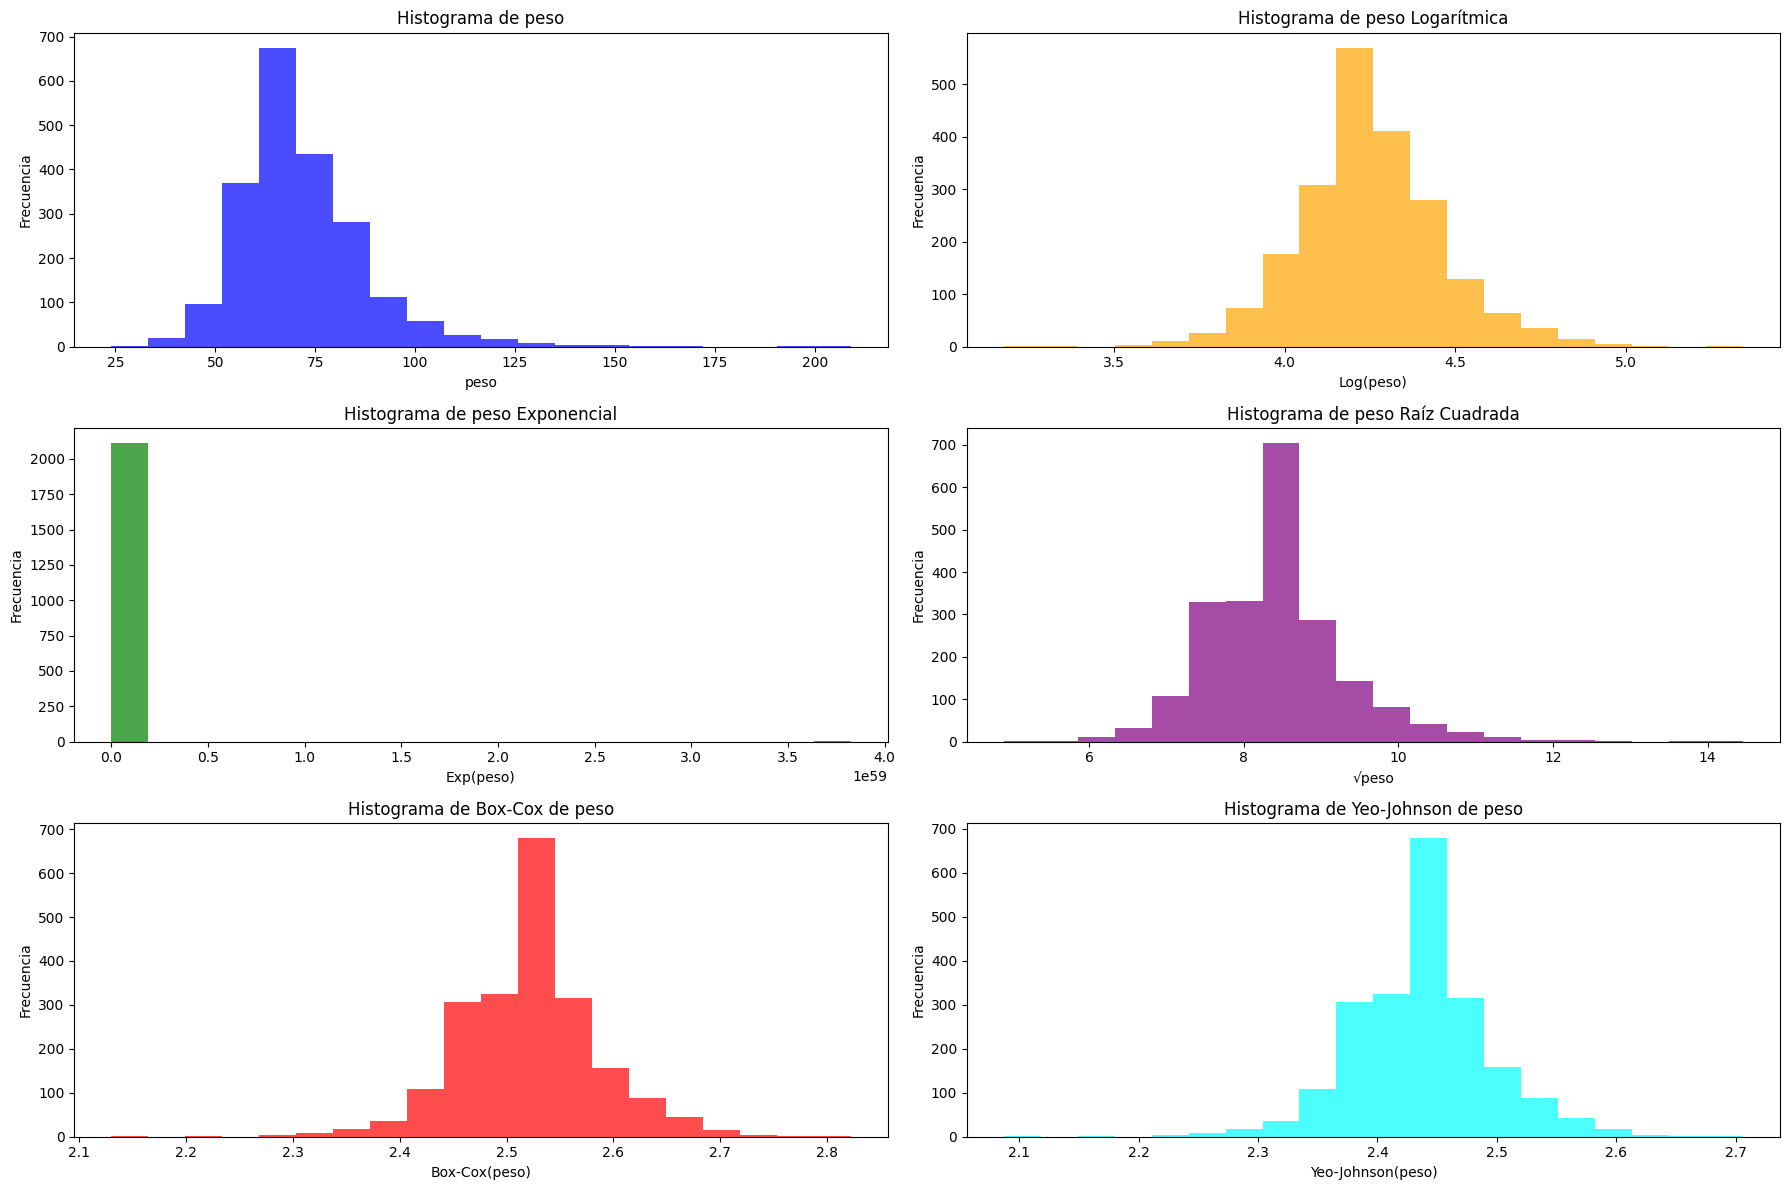


Resultados de normalidad para peso:
Original: Estadístico = 0.9048, p-value = 0.0000
Logarítmica: Estadístico = 0.9765, p-value = 0.0000
Exponencial: Estadístico = 0.0063, p-value = 0.0000
Raíz Cuadrada: Estadístico = 0.9527, p-value = 0.0000
Box-Cox: Estadístico = 0.9793, p-value = 0.0000
Yeo-Johnson: Estadístico = 0.9795, p-value = 0.0000


In [19]:
analizar_variable(df, "peso")

Este código invoca la función analizar_variable sobre la columna 'peso' del DataFrame df. La función tiene como objetivo aplicar transformaciones estadísticas, verificar la normalidad de los datos, y generar gráficos histogramas para analizar la distribución de la variable especificada.

Esto nos proporciona un análisis detallado de la distribución de la columna 'peso', aplicando varias transformaciones y verificando su normalidad. Estas transformaciones son útiles para preparar los datos para modelos estadísticos y de machine learning que asumen normalidad en los datos.

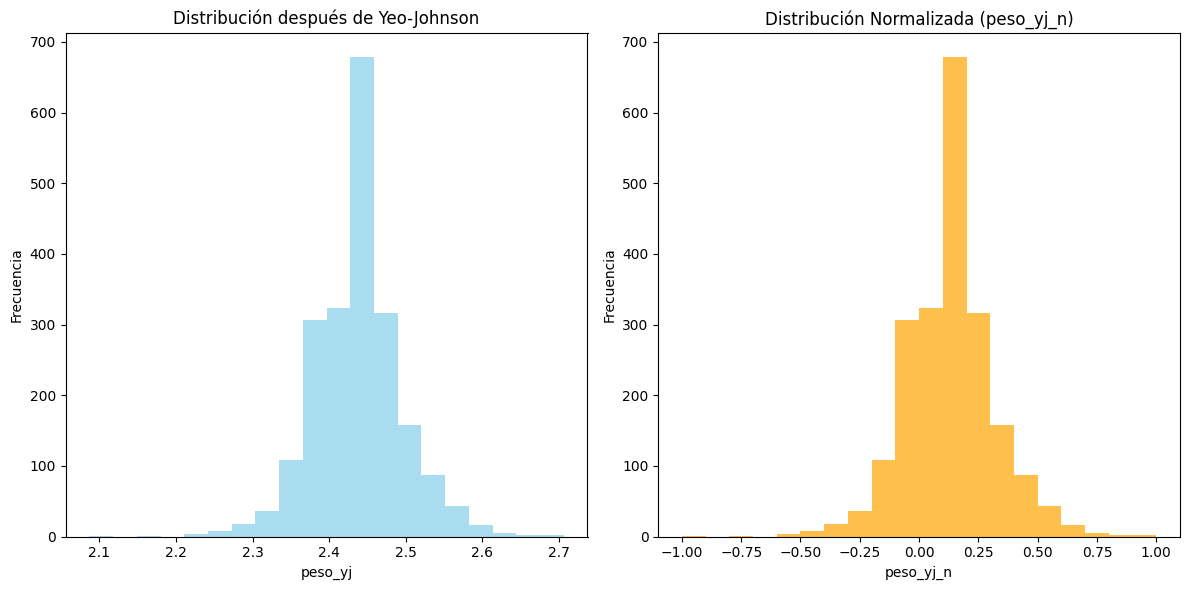

In [20]:
# Manejo de valores nulos antes de la transformación
if df["peso"].isnull().any():
    print("Advertencia: Se encontraron valores nulos en 'peso'. Se reemplazarán con la media.")
    df["peso"].fillna(df["peso"].mean(), inplace=True)

# Inicializar el transformador Yeo-Johnson sin estandarización (standardize=False)
transformer = PowerTransformer(method="yeo-johnson", standardize=False)

# Aplicación de la transformación Yeo-Johnson
df["peso_yj"] = transformer.fit_transform(df[["peso"]])

# Normalización de la columna transformada con MinMaxScaler
df["peso_yj_n"] = scaler.fit_transform(df[["peso_yj"]])

# Comparación visual de la distribución
plt.figure(figsize=(12, 6))

# Histograma de la transformación Yeo-Johnson
plt.subplot(1, 2, 1)
plt.hist(df["peso_yj"], bins=20, alpha=0.7, color='skyblue')
plt.title("Distribución después de Yeo-Johnson")
plt.xlabel("peso_yj")
plt.ylabel("Frecuencia")

# Histograma de la transformación normalizada
plt.subplot(1, 2, 2)
plt.hist(df["peso_yj_n"], bins=20, alpha=0.7, color='orange')
plt.title("Distribución Normalizada (peso_yj_n)")
plt.xlabel("peso_yj_n")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Este enfoque combina la flexibilidad de Yeo-Johnson con la capacidad de normalización de MinMaxScaler, proporcionando una transformación robusta que puede manejar una variedad de distribuciones y rangos de datos.

#### tallacm

Se encontraron valores nulos en tallacm. Se eliminarán o reemplazarán.


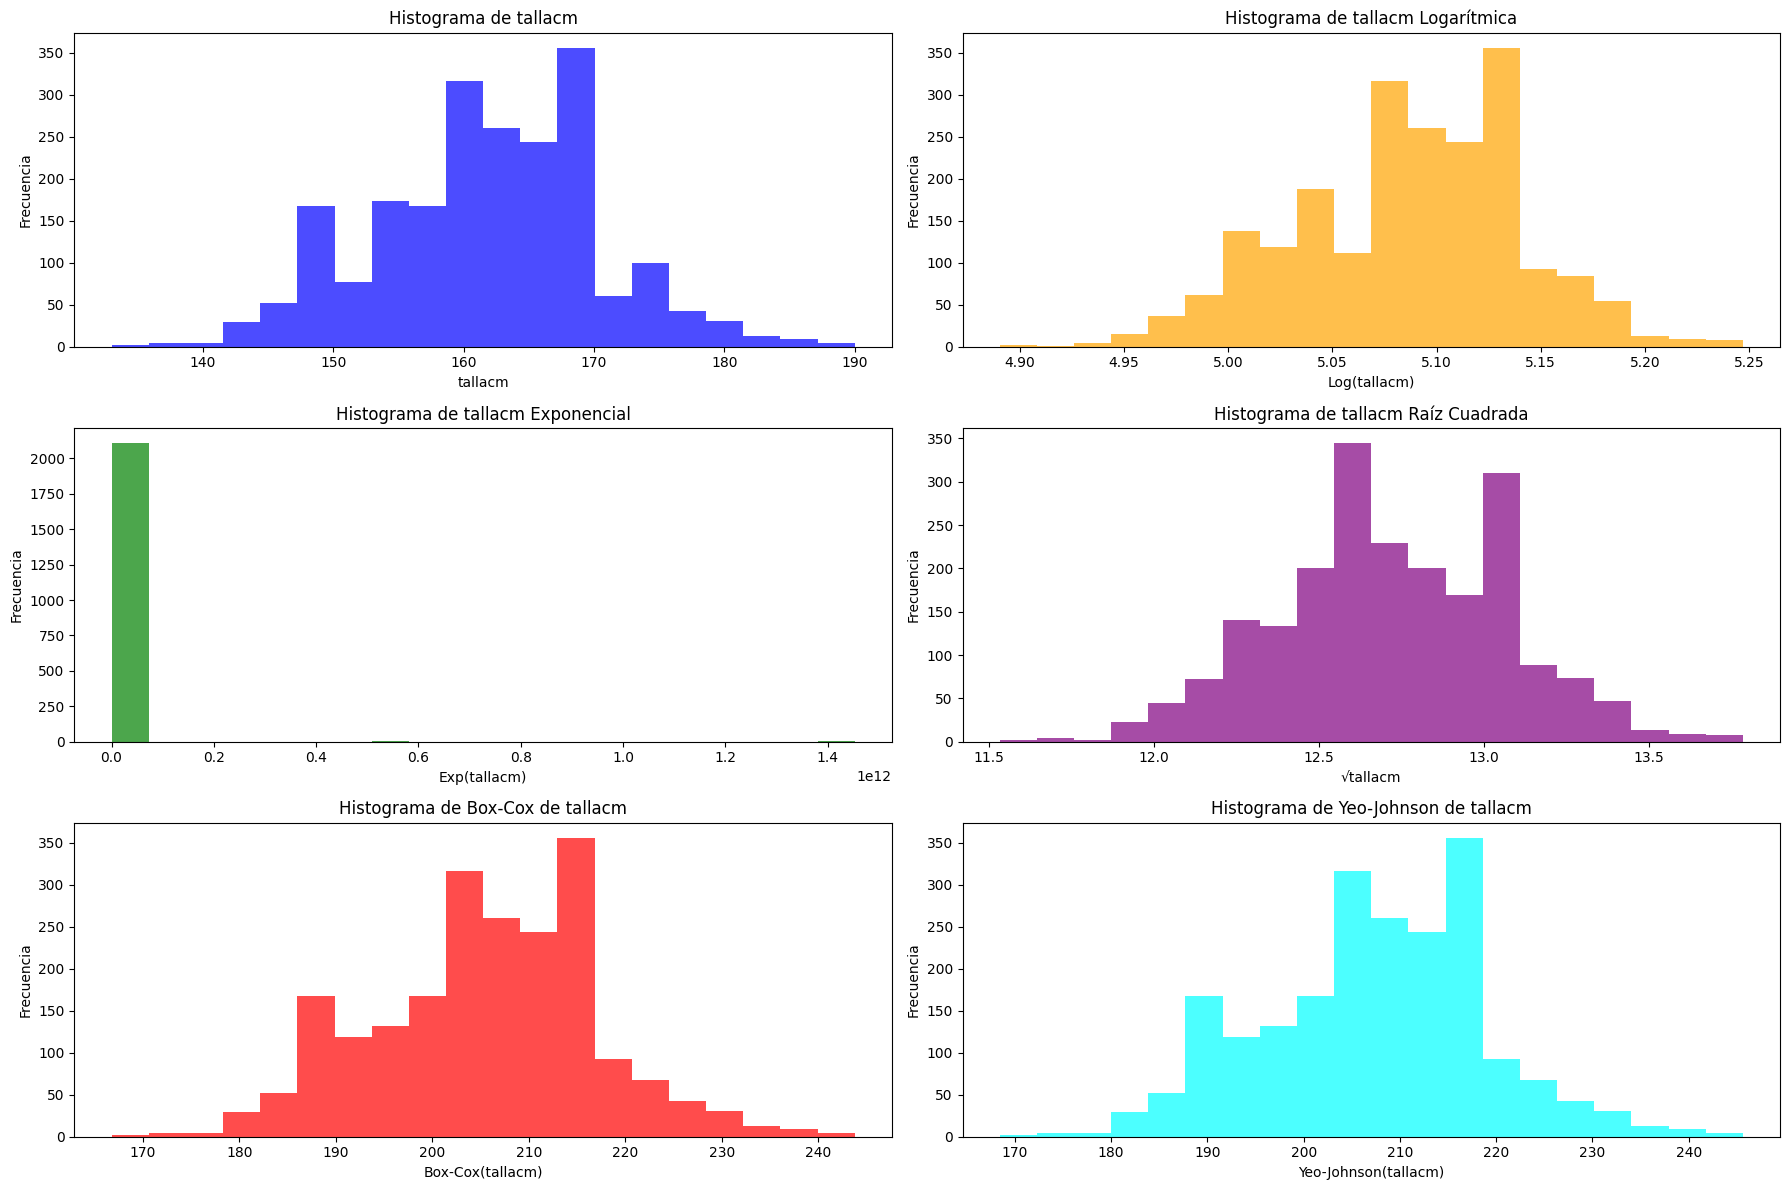


Resultados de normalidad para tallacm:
Original: Estadístico = 0.9923, p-value = 0.0000
Logarítmica: Estadístico = 0.9909, p-value = 0.0000
Exponencial: Estadístico = 0.0231, p-value = 0.0000
Raíz Cuadrada: Estadístico = 0.9919, p-value = 0.0000
Box-Cox: Estadístico = 0.9923, p-value = 0.0000
Yeo-Johnson: Estadístico = 0.9923, p-value = 0.0000


In [21]:
analizar_variable(df, "tallacm")

Este código proporciona una evaluación completa de la columna 'tallacm'. Las transformaciones y pruebas de normalidad permiten identificar si los datos se aproximan a una distribución normal, lo cual es importante para muchos modelos estadísticos y de machine learning.Este código proporciona una evaluación completa de la columna 'tallacm'. Las transformaciones y pruebas de normalidad permiten identificar si los datos se aproximan a una distribución normal, lo cual es importante para muchos modelos estadísticos y de machine learning.

In [22]:
# Verificar y manejar valores nulos
if df["tallacm"].isnull().any():
    print("Advertencia: Se encontraron valores nulos en 'tallacm'. Se reemplazarán por la media.")
    df["tallacm"].fillna(df["tallacm"].mean(), inplace=True)

# Inicializar el transformador Yeo-Johnson sin estandarización (standardize=False)
transformer = PowerTransformer(method="yeo-johnson", standardize=False)

# Aplicar la transformación Yeo-Johnson a la columna 'tallacm'
df["tallacm_yj"] = transformer.fit_transform(df[["tallacm"]])

# Aplicar MinMaxScaler para normalizar después de la transformación
df["tallacm_n"] = scaler.fit_transform(df[["tallacm_yj"]])

# Mostrar los primeros resultados para validar
df[["tallacm", "tallacm_yj", "tallacm_n"]].head(10)


,tallacm,tallacm_yj,tallacm_n
0,170.0,218.355880,0.293533
1,160.0,204.790468,-0.057890
2,160.0,204.790468,-0.057890
3,157.0,200.730499,-0.163066
4,161.0,206.144799,-0.022805
5,160.0,204.790468,-0.057890
6,170.0,218.355880,0.293533
7,147.0,187.230939,-0.512783
8,154.0,196.675126,-0.268124
9,160.0,204.790468,-0.057890


Este código implementa la transformación Yeo-Johnson para manejar la distribución de la variable tallacm, lo que permite transformar variables con valores cero o negativos. Posteriormente, se aplica MinMaxScaler para normalizar los valores transformados en un rango personalizado. Esta técnica permite que los datos estén bien preparados para su uso en modelos de machine learning.

#### imc

Se encontraron valores nulos en imc. Se eliminarán o reemplazarán.


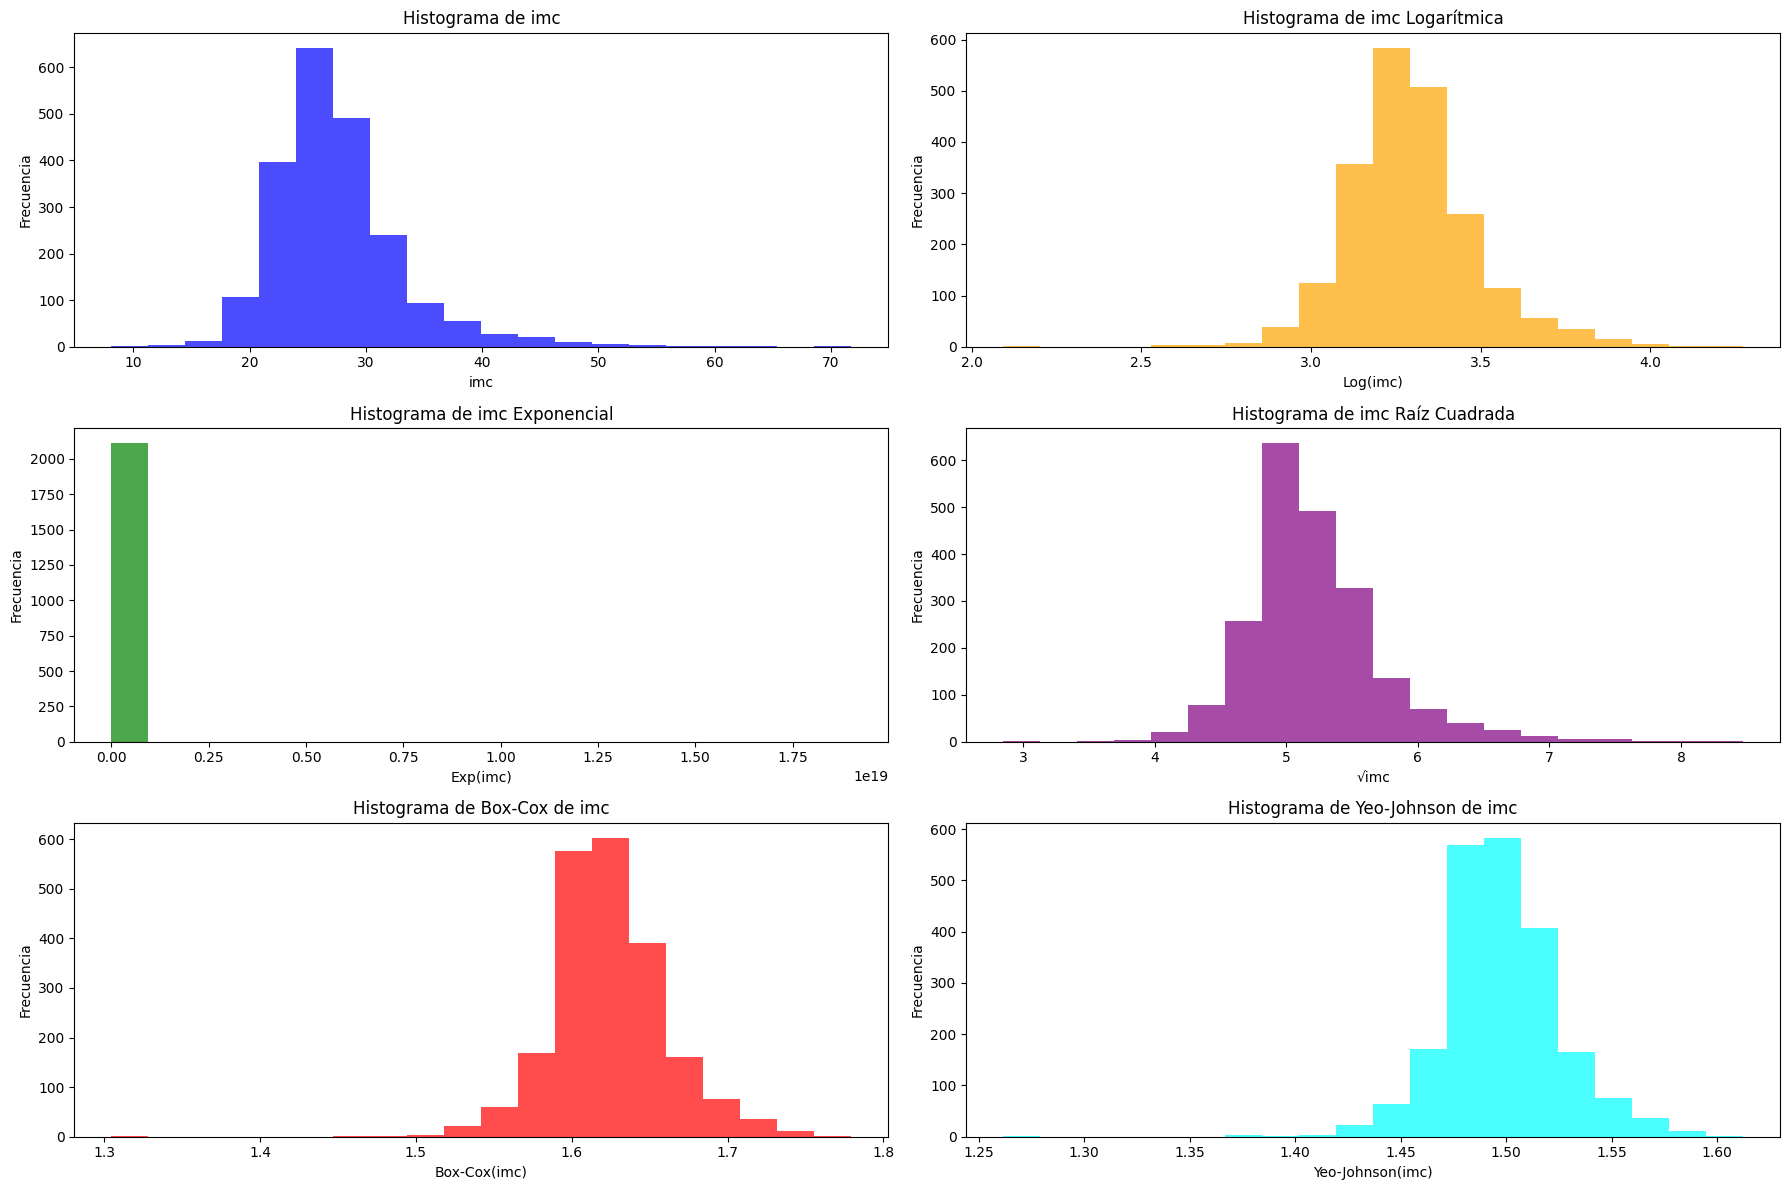


Resultados de normalidad para imc:
Original: Estadístico = 0.8865, p-value = 0.0000
Logarítmica: Estadístico = 0.9623, p-value = 0.0000
Exponencial: Estadístico = 0.0063, p-value = 0.0000
Raíz Cuadrada: Estadístico = 0.9338, p-value = 0.0000
Box-Cox: Estadístico = 0.9683, p-value = 0.0000
Yeo-Johnson: Estadístico = 0.9691, p-value = 0.0000


In [23]:
analizar_variable(df, "imc")

Este código permite analizar la variable 'imc' en detalle, identificando posibles problemas como valores nulos o datos no normalizados. Las transformaciones aplicadas ayudan a verificar si los datos se pueden ajustar a una distribución normal, lo cual es crucial para muchos modelos estadísticos y de machine learning.

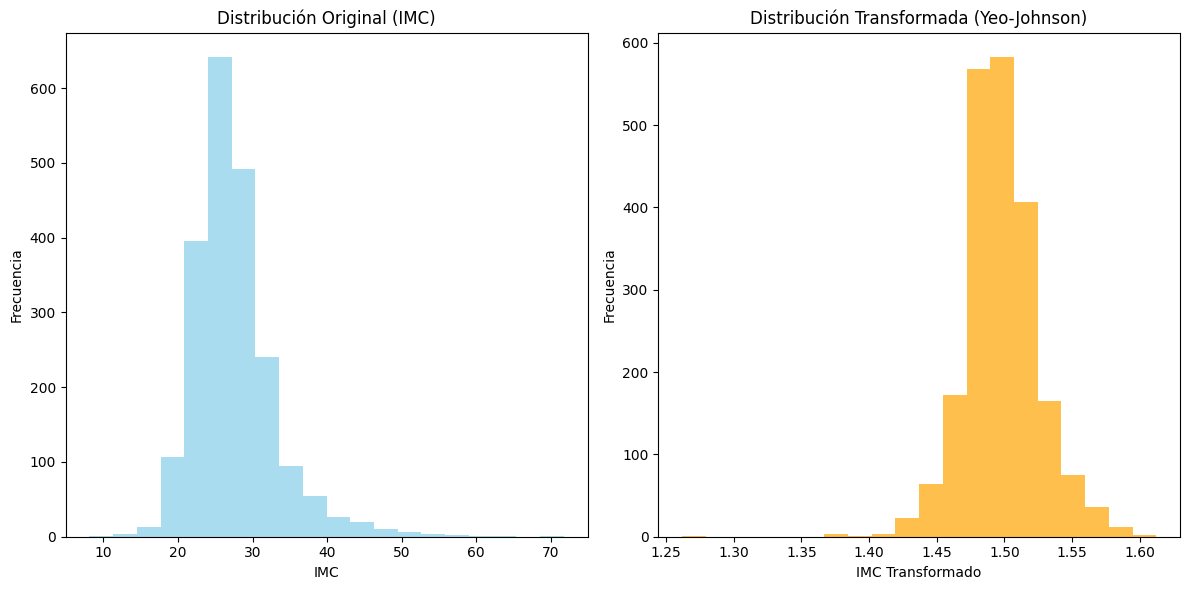

In [24]:
# Verificar y manejar valores nulos
if df["imc"].isnull().any():
    print("Advertencia: Se encontraron valores nulos en 'imc'. Se reemplazarán por la media.")
    df["imc"].fillna(df["imc"].mean(), inplace=True)

# Inicializar el transformador Yeo-Johnson sin estandarización (standardize=False)
transformer = PowerTransformer(method="yeo-johnson", standardize=False)

# Aplicar la transformación Yeo-Johnson
df["imc_yj"] = transformer.fit_transform(df[["imc"]])

# Normalizar los valores transformados con MinMaxScaler
df["imc_yj_n"] = scaler.fit_transform(df[["imc_yj"]])

# Comparación visual antes y después de la transformación
plt.figure(figsize=(12, 6))

# Histograma de la variable original
plt.subplot(1, 2, 1)
plt.hist(df["imc"], bins=20, alpha=0.7, color='skyblue')
plt.title("Distribución Original (IMC)")
plt.xlabel("IMC")
plt.ylabel("Frecuencia")

# Histograma de la variable transformada
plt.subplot(1, 2, 2)
plt.hist(df["imc_yj"], bins=20, alpha=0.7, color='orange')
plt.title("Distribución Transformada (Yeo-Johnson)")
plt.xlabel("IMC Transformado")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Este código implementa una transformación Yeo-Johnson para la variable imc, seguida de una normalización con MinMaxScaler. Esto permite que la variable esté adecuadamente transformada y escalada, y además, genera una visualización que permite comparar las distribuciones antes y después de la transformación. Este enfoque es ideal para ajustar distribuciones no normales y mejorar el rendimiento de los modelos de machine learning.

#### hb

Se encontraron valores nulos en hb. Se eliminarán o reemplazarán.


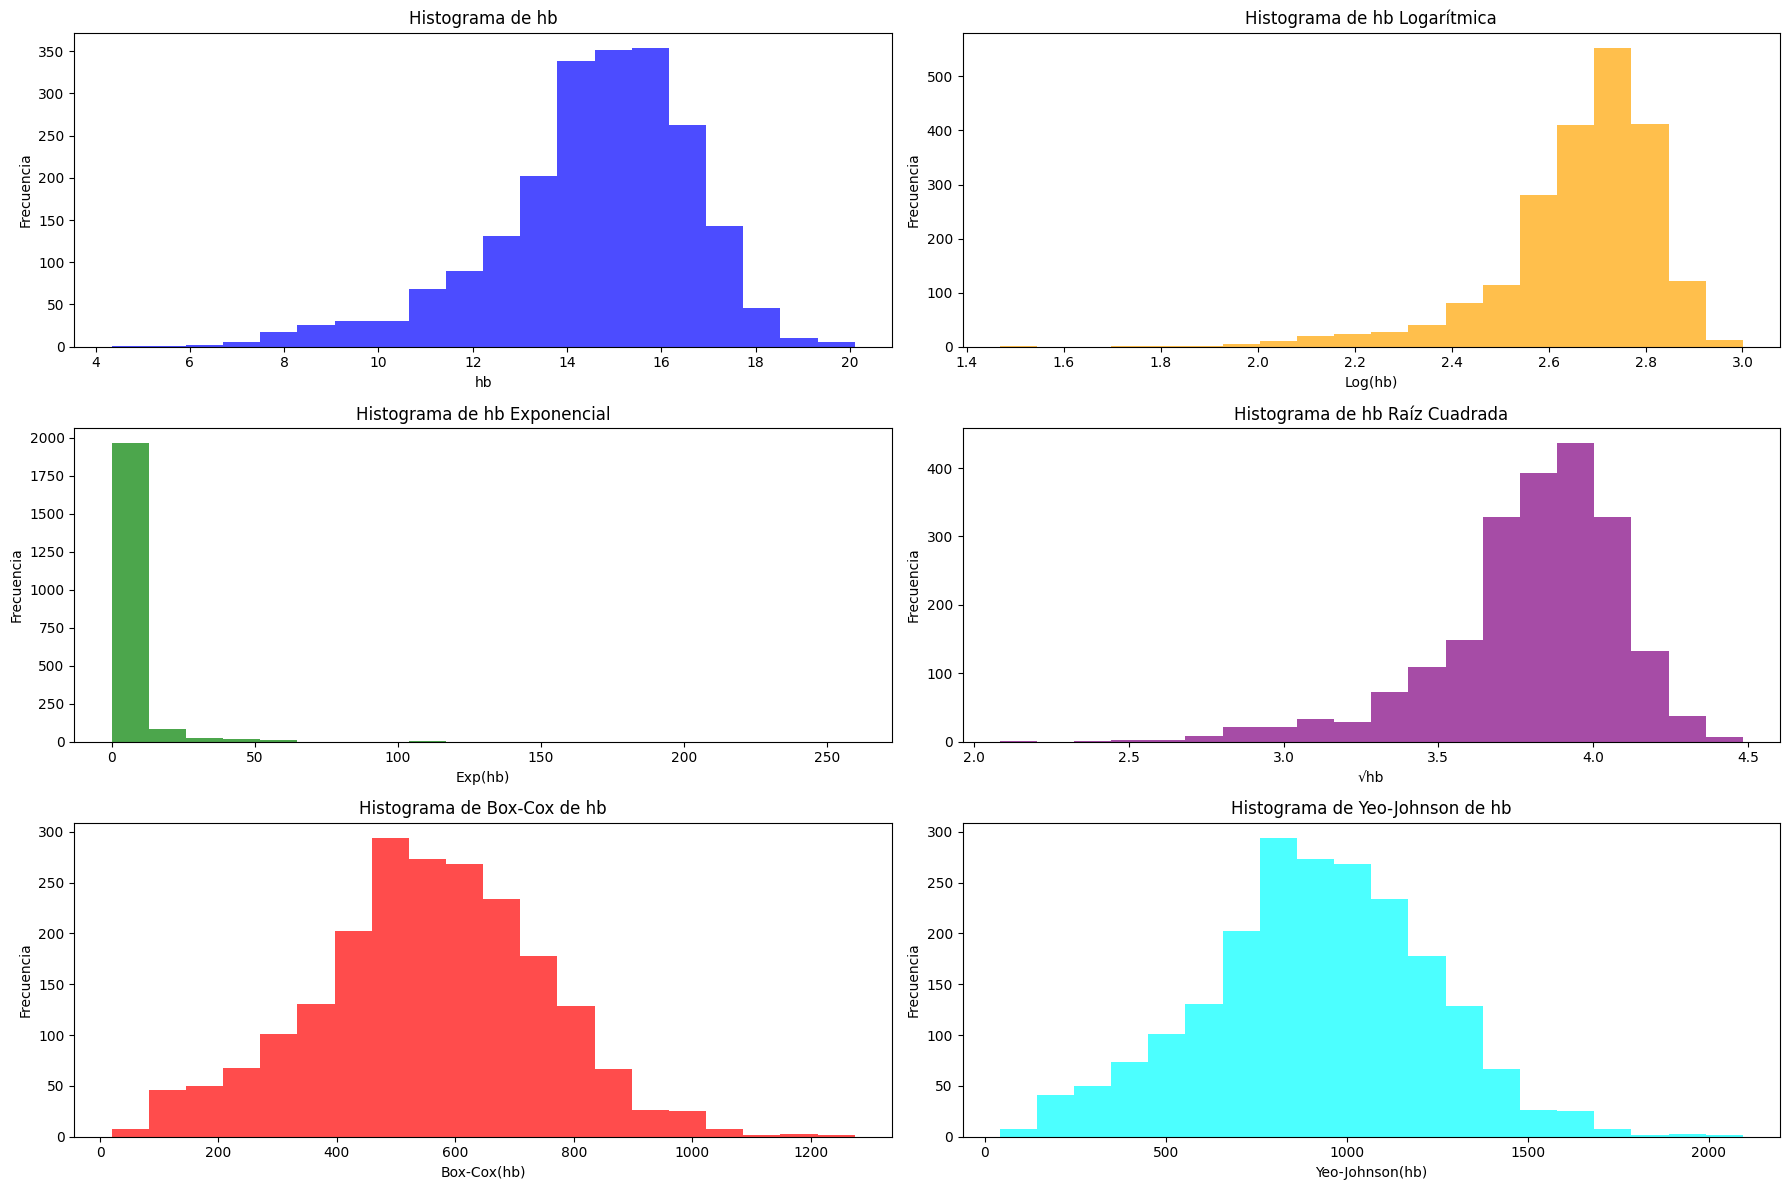


Resultados de normalidad para hb:
Original: Estadístico = 0.9551, p-value = 0.0000
Logarítmica: Estadístico = 0.8841, p-value = 0.0000
Exponencial: Estadístico = 0.3284, p-value = 0.0000
Raíz Cuadrada: Estadístico = 0.9249, p-value = 0.0000
Box-Cox: Estadístico = 0.9968, p-value = 0.0002
Yeo-Johnson: Estadístico = 0.9968, p-value = 0.0002


In [25]:
analizar_variable(df, "hb")

Este código realiza un análisis exhaustivo de la columna 'hb' para identificar problemas en la distribución y mejorarlos mediante transformaciones estadísticas. Las pruebas de normalidad ayudan a determinar qué transformación se ajusta mejor a una distribución normal.

Este análisis asegura que los datos de 'hb' estén listos para ser usados en modelos estadísticos o de machine learning, mejorando su rendimiento y precisión.

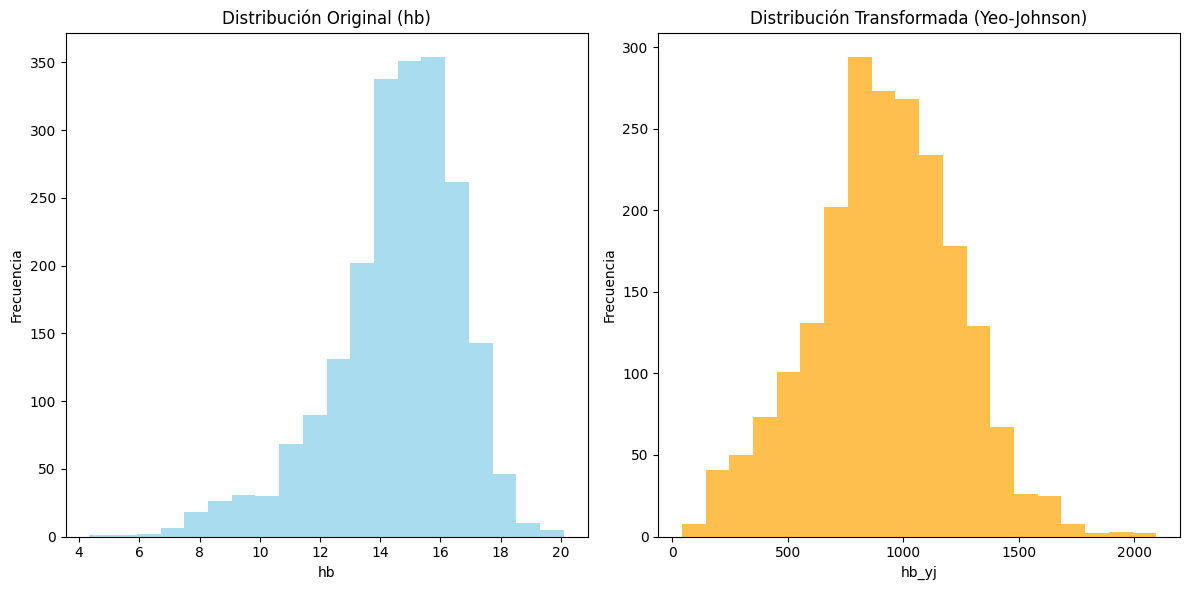

In [26]:
# Verificar si hay valores nulos y reemplazarlos con la media
if df["hb"].isnull().any():
    print("Advertencia: Se encontraron valores nulos en 'hb'. Se reemplazarán por la media.")
    df["hb"].fillna(df["hb"].mean(), inplace=True)

# Inicializar el transformador Yeo-Johnson sin estandarización (standardize=False)
transformer = PowerTransformer(method="yeo-johnson", standardize=False)

# Aplicar la transformación Yeo-Johnson
df["hb_yj"] = transformer.fit_transform(df[["hb"]])

# Normalizar los valores transformados con MinMaxScaler
df["hb_yj_n"] = scaler.fit_transform(df[["hb_yj"]])

# Visualización: comparar la distribución original y transformada
plt.figure(figsize=(12, 6))

# Histograma de la variable original
plt.subplot(1, 2, 1)
plt.hist(df["hb"], bins=20, alpha=0.7, color='skyblue')
plt.title("Distribución Original (hb)")
plt.xlabel("hb")
plt.ylabel("Frecuencia")

# Histograma de la variable transformada con Yeo-Johnson
plt.subplot(1, 2, 2)
plt.hist(df["hb_yj"], bins=20, alpha=0.7, color='orange')
plt.title("Distribución Transformada (Yeo-Johnson)")
plt.xlabel("hb_yj")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


Este código utiliza la transformación Yeo-Johnson en lugar de Box-Cox, lo que lo hace más flexible para una variedad de distribuciones. La combinación de Yeo-Johnson y MinMaxScaler asegura que los datos estén bien transformados y normalizados, mejorando su aplicabilidad en modelos de machine learning. La visualización permite ver la diferencia entre la distribución original y la transformada.

#### hto

Se encontraron valores nulos en hto. Se eliminarán o reemplazarán.


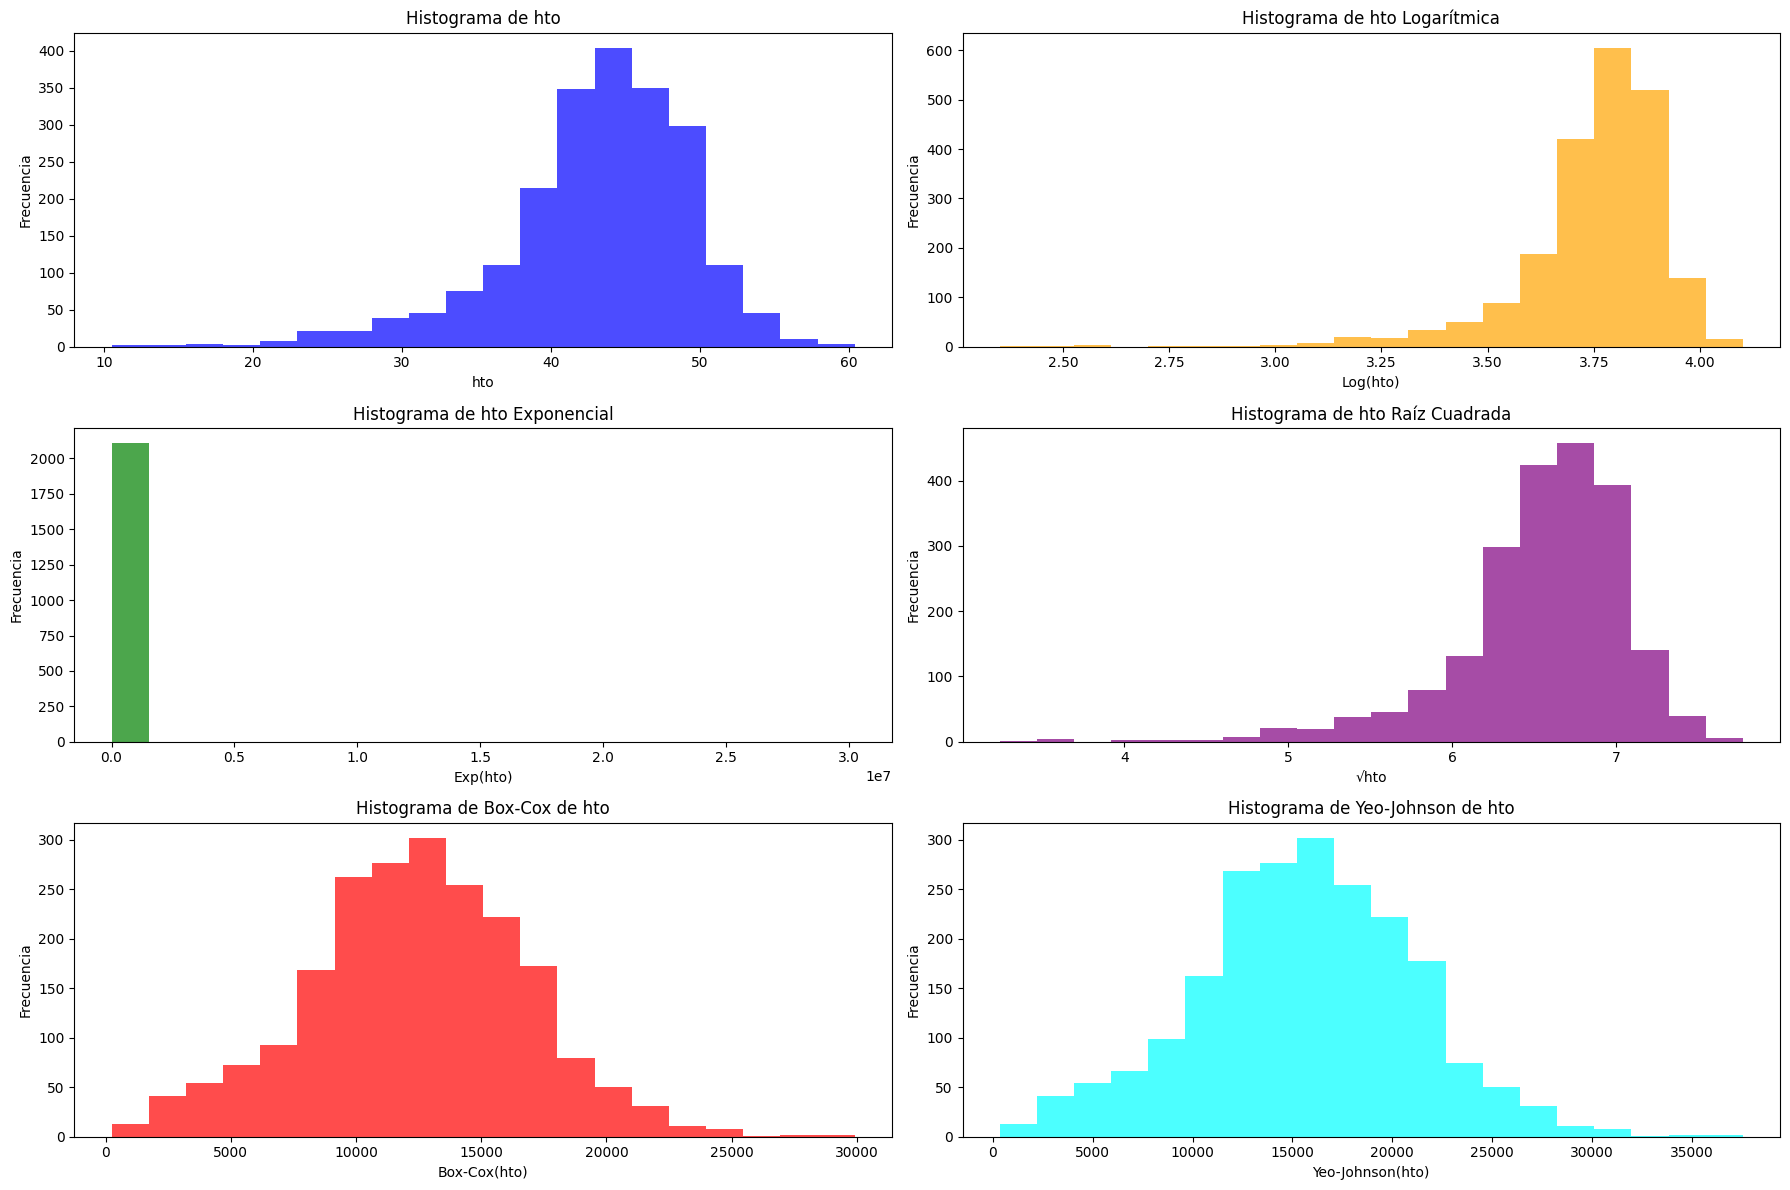


Resultados de normalidad para hto:
Original: Estadístico = 0.9429, p-value = 0.0000
Logarítmica: Estadístico = 0.8397, p-value = 0.0000
Exponencial: Estadístico = 0.0180, p-value = 0.0000
Raíz Cuadrada: Estadístico = 0.9006, p-value = 0.0000
Box-Cox: Estadístico = 0.9967, p-value = 0.0002
Yeo-Johnson: Estadístico = 0.9968, p-value = 0.0002


In [27]:
analizar_variable(df, "hto")

Este código realiza un análisis detallado de la columna 'hto' para detectar problemas de distribución y mejorarlos mediante transformaciones estadísticas. Las pruebas de normalidad ayudan a identificar qué transformación es más adecuada.

Este análisis asegura que la columna 'hto' esté lista para su uso en modelos estadísticos o de machine learning, mejorando su rendimiento y precisión.

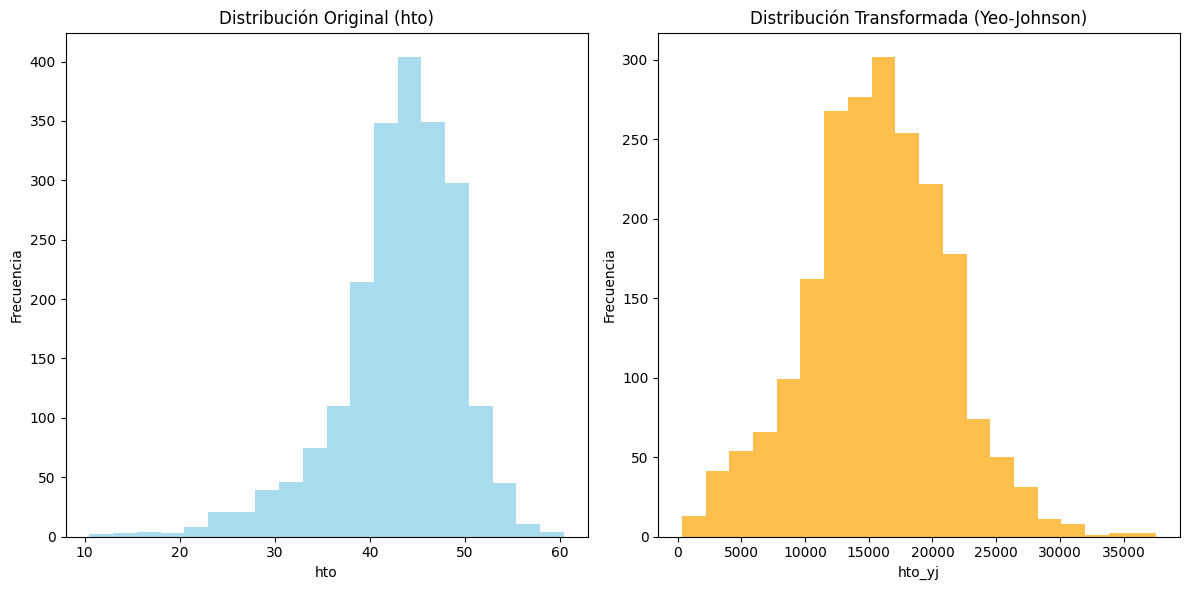

In [28]:
# Verificar y manejar valores nulos
if df["hto"].isnull().any():
    print("Advertencia: Se encontraron valores nulos en 'hto'. Se reemplazarán por la media.")
    df["hto"].fillna(df["hto"].mean(), inplace=True)

# Inicializar el transformador Yeo-Johnson sin estandarización (standardize=False)
transformer = PowerTransformer(method="yeo-johnson", standardize=False)

# Aplicar la transformación Yeo-Johnson
df["hto_yj"] = transformer.fit_transform(df[["hto"]])

# Normalizar los valores transformados con MinMaxScaler
df["hto_yj_n"] = scaler.fit_transform(df[["hto_yj"]])

# Comparación visual antes y después de la transformación
plt.figure(figsize=(12, 6))

# Histograma de la variable original
plt.subplot(1, 2, 1)
plt.hist(df["hto"], bins=20, alpha=0.7, color='skyblue')
plt.title("Distribución Original (hto)")
plt.xlabel("hto")
plt.ylabel("Frecuencia")

# Histograma de la variable transformada
plt.subplot(1, 2, 2)
plt.hist(df["hto_yj"], bins=20, alpha=0.7, color='orange')
plt.title("Distribución Transformada (Yeo-Johnson)")
plt.xlabel("hto_yj")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


Este código utiliza la transformación Yeo-Johnson para transformar la variable hto, lo que garantiza que los datos puedan manejar una variedad de distribuciones, incluyendo valores negativos o cero. Posteriormente, los datos se normalizan con MinMaxScaler para que se ajusten al rango de 0 a 1. La visualización permite comparar las distribuciones antes y después de la transformación, mostrando el impacto de Yeo-Johnson en los datos.

#### leucostotales

Se encontraron valores nulos en leucostotales. Se eliminarán o reemplazarán.


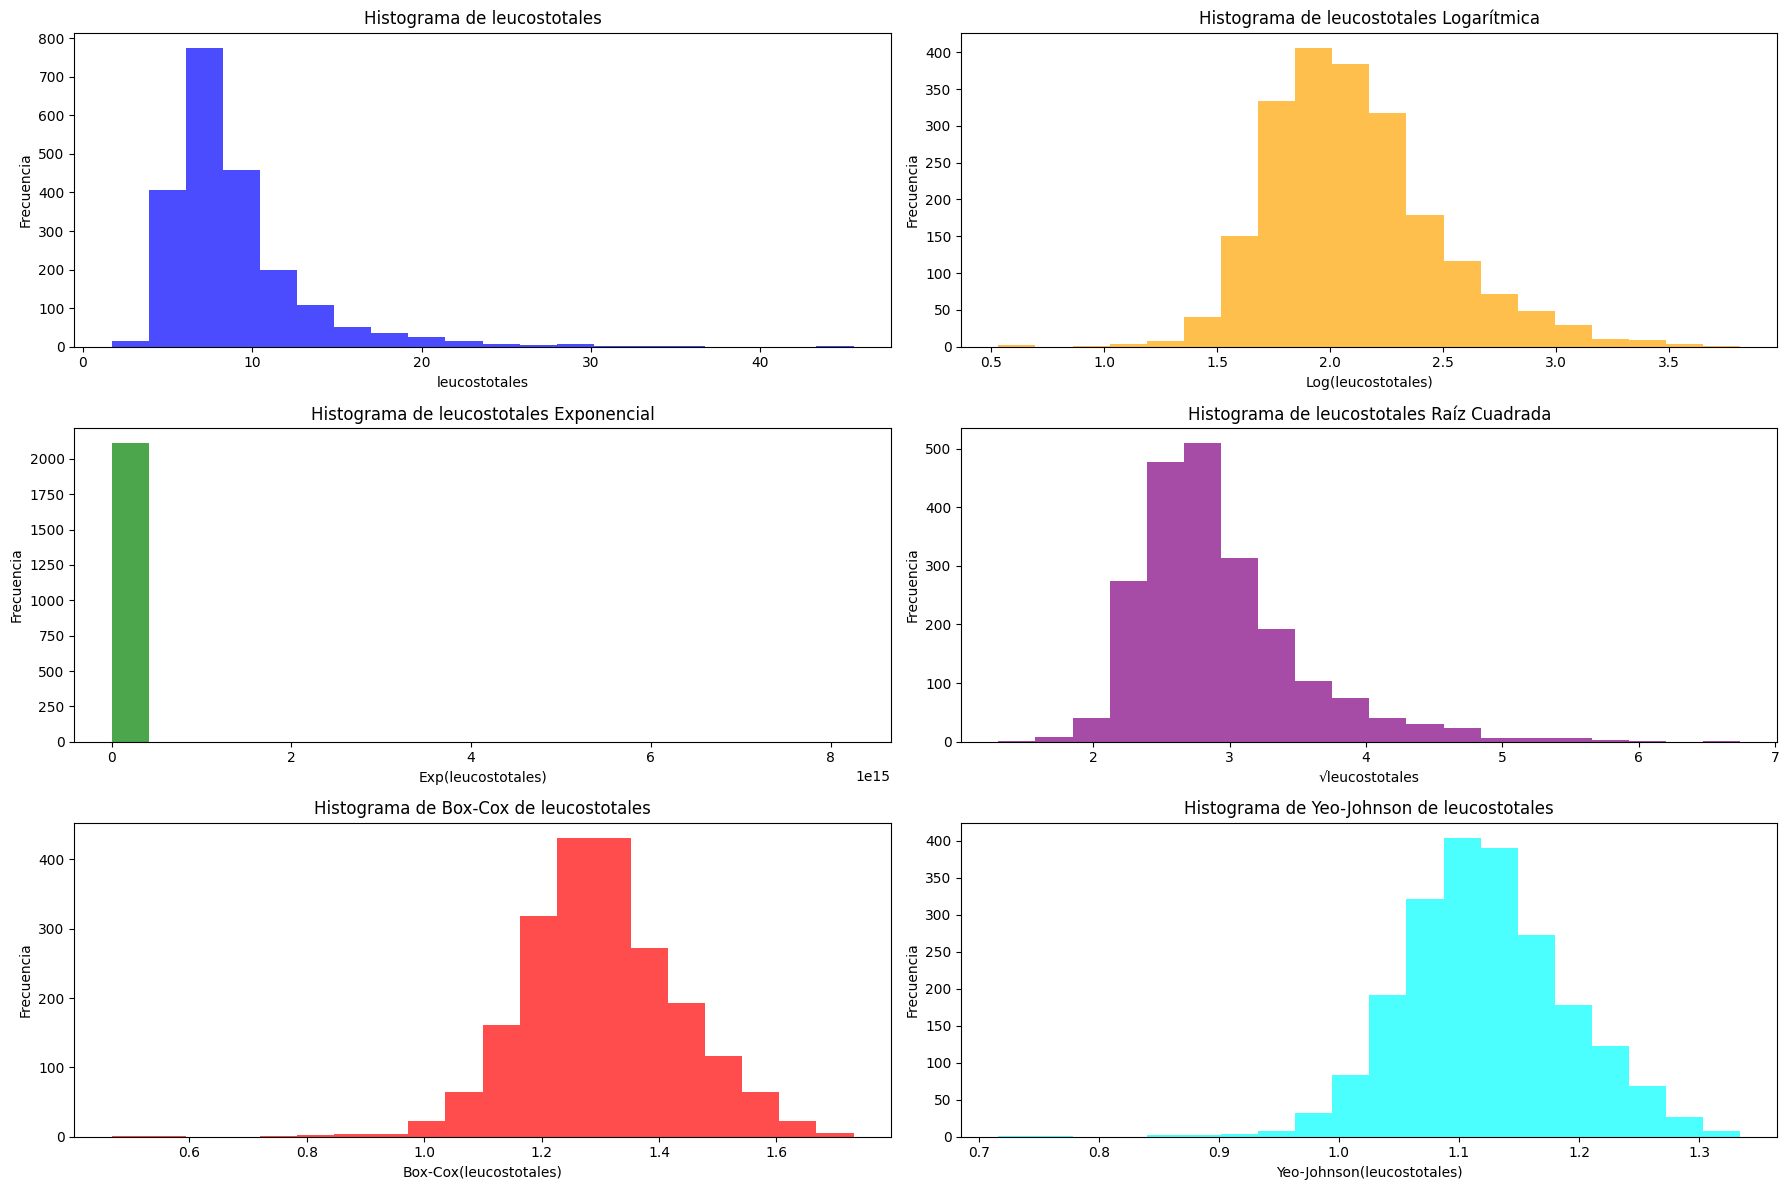


Resultados de normalidad para leucostotales:
Original: Estadístico = 0.7909, p-value = 0.0000
Logarítmica: Estadístico = 0.9672, p-value = 0.0000
Exponencial: Estadístico = 0.0063, p-value = 0.0000
Raíz Cuadrada: Estadístico = 0.8989, p-value = 0.0000
Box-Cox: Estadístico = 0.9871, p-value = 0.0000
Yeo-Johnson: Estadístico = 0.9899, p-value = 0.0000


In [29]:
analizar_variable(df, "leucostotales")

Este código proporciona un análisis detallado de la columna 'leucostotales', aplicando varias transformaciones y evaluando su impacto mediante pruebas de normalidad.

Este análisis asegura que los datos estén limpios, transformados y listos para su uso en análisis estadísticos o modelos de machine learning.

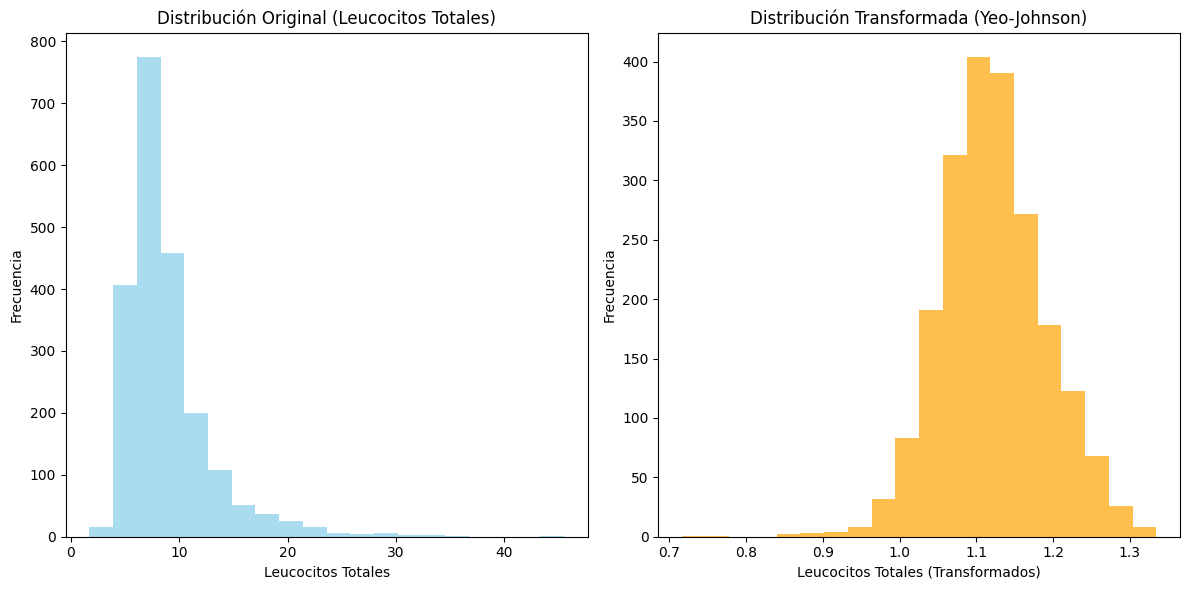

In [30]:
# Verificar y manejar valores nulos
if df["leucostotales"].isnull().any():
    print("Advertencia: Se encontraron valores nulos en 'leucostotales'. Se reemplazarán por la media.")
    df["leucostotales"].fillna(df["leucostotales"].mean(), inplace=True)

# Inicializar el transformador Yeo-Johnson sin estandarización automática (standardize=False)
transformer = PowerTransformer(method="yeo-johnson", standardize=False)

# Aplicar la transformación Yeo-Johnson a la columna 'leucostotales'
df["leucostotales_yj"] = transformer.fit_transform(df[["leucostotales"]])

# Normalizar los valores transformados con MinMaxScaler
df["leucostotales_yj_n"] = scaler.fit_transform(df[["leucostotales_yj"]])

# Comparar visualmente las distribuciones original y transformada
plt.figure(figsize=(12, 6))

# Distribución original de 'leucostotales'
plt.subplot(1, 2, 1)
plt.hist(df["leucostotales"], bins=20, alpha=0.7, color='skyblue')
plt.title("Distribución Original (Leucocitos Totales)")
plt.xlabel("Leucocitos Totales")
plt.ylabel("Frecuencia")

# Distribución transformada con Yeo-Johnson
plt.subplot(1, 2, 2)
plt.hist(df["leucostotales_yj"], bins=20, alpha=0.7, color='orange')
plt.title("Distribución Transformada (Yeo-Johnson)")
plt.xlabel("Leucocitos Totales (Transformados)")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Este enfoque garantiza que la transformación Yeo-Johnson maneje adecuadamente la distribución de la variable leucostotales, incluso si incluye valores negativos o cero. Posteriormente, los datos se normalizan con MinMaxScaler para ajustarse a un rango personalizado. Finalmente, los gráficos generados permiten una comparación visual entre la distribución original y la distribución transformada, lo que facilita la validación del impacto de la transformación.

#### linfos

Se encontraron valores nulos en linfos. Se eliminarán o reemplazarán.


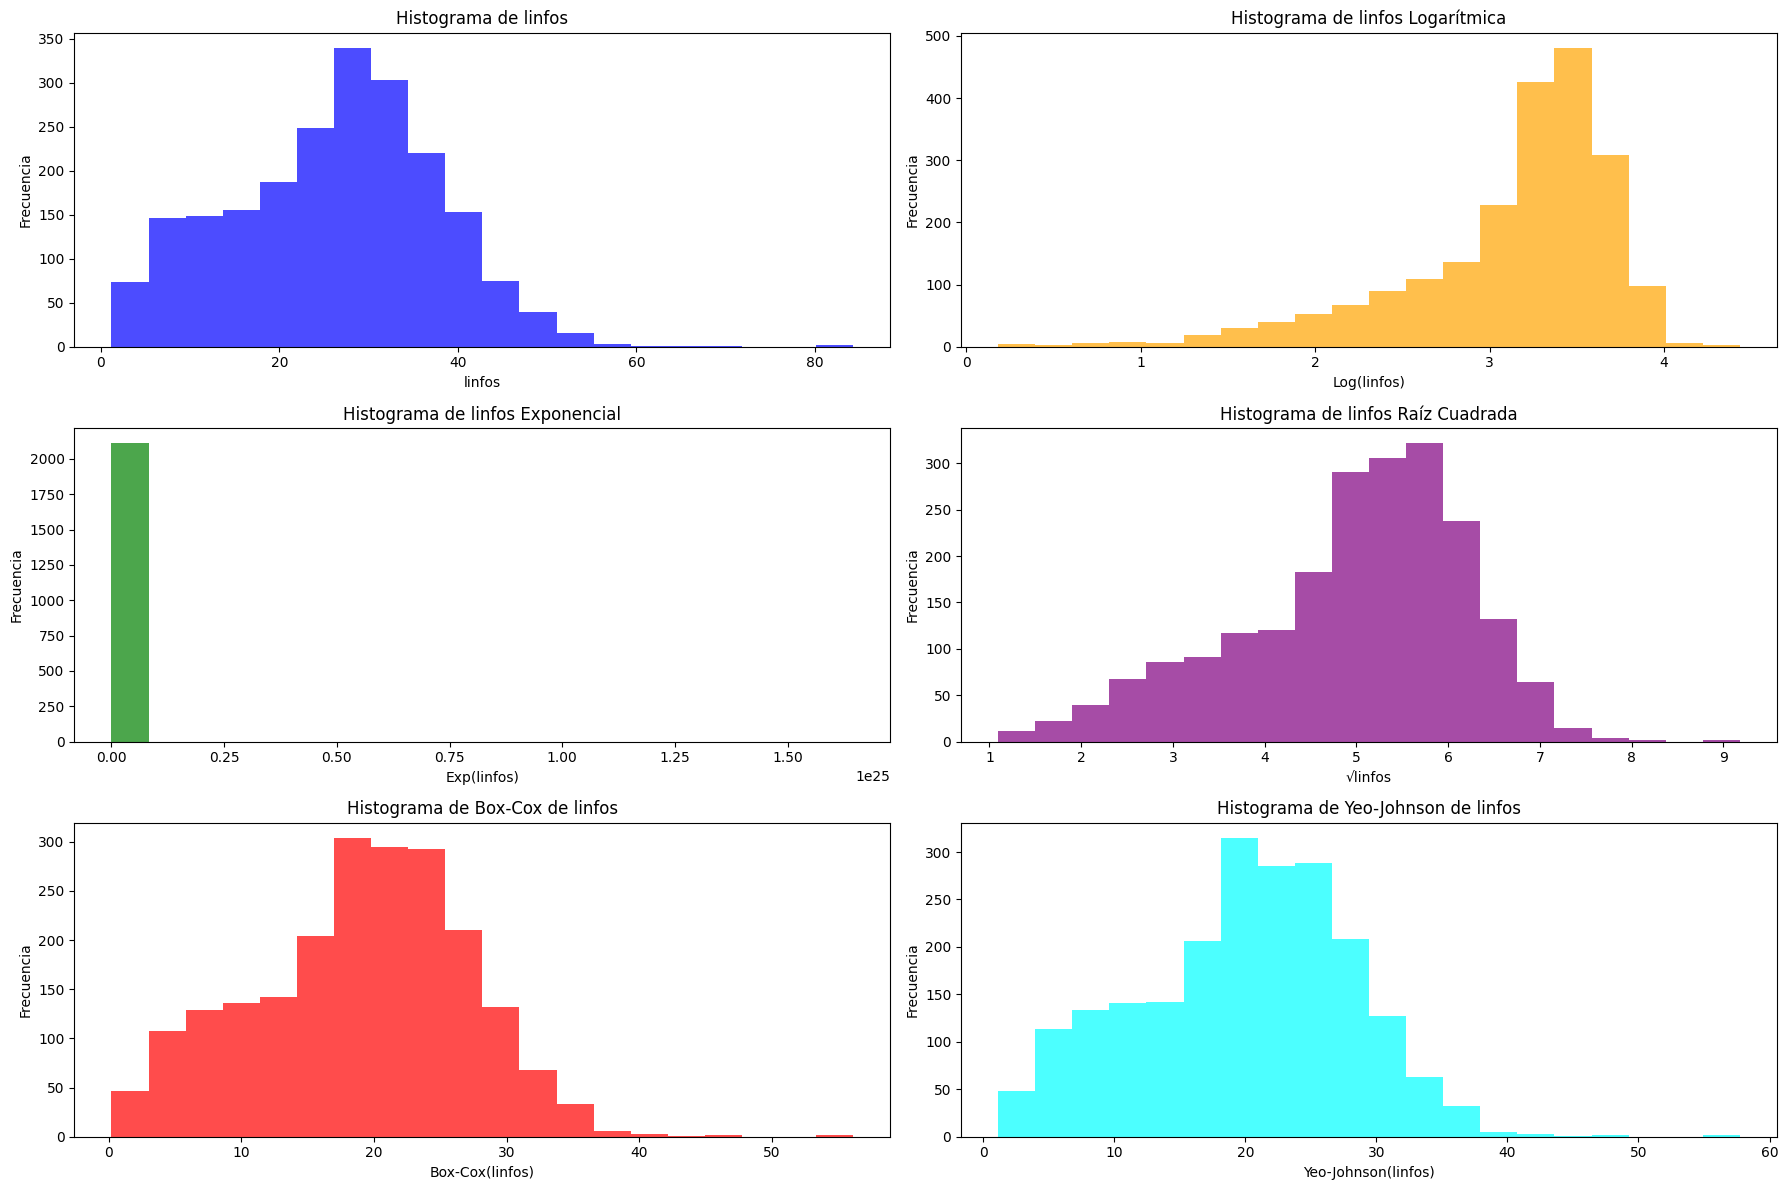


Resultados de normalidad para linfos:
Original: Estadístico = 0.9858, p-value = 0.0000
Logarítmica: Estadístico = 0.8768, p-value = 0.0000
Exponencial: Estadístico = 0.0093, p-value = 0.0000
Raíz Cuadrada: Estadístico = 0.9629, p-value = 0.0000
Box-Cox: Estadístico = 0.9853, p-value = 0.0000
Yeo-Johnson: Estadístico = 0.9854, p-value = 0.0000


In [31]:
analizar_variable(df, "linfos")

Este código permite analizar la columna 'linfos' en detalle, asegurando que los datos estén limpios y preparados para análisis o modelos predictivos. Las mejoras propuestas incluyen un manejo más flexible de valores nulos, la detección de outliers y visualizaciones más claras.

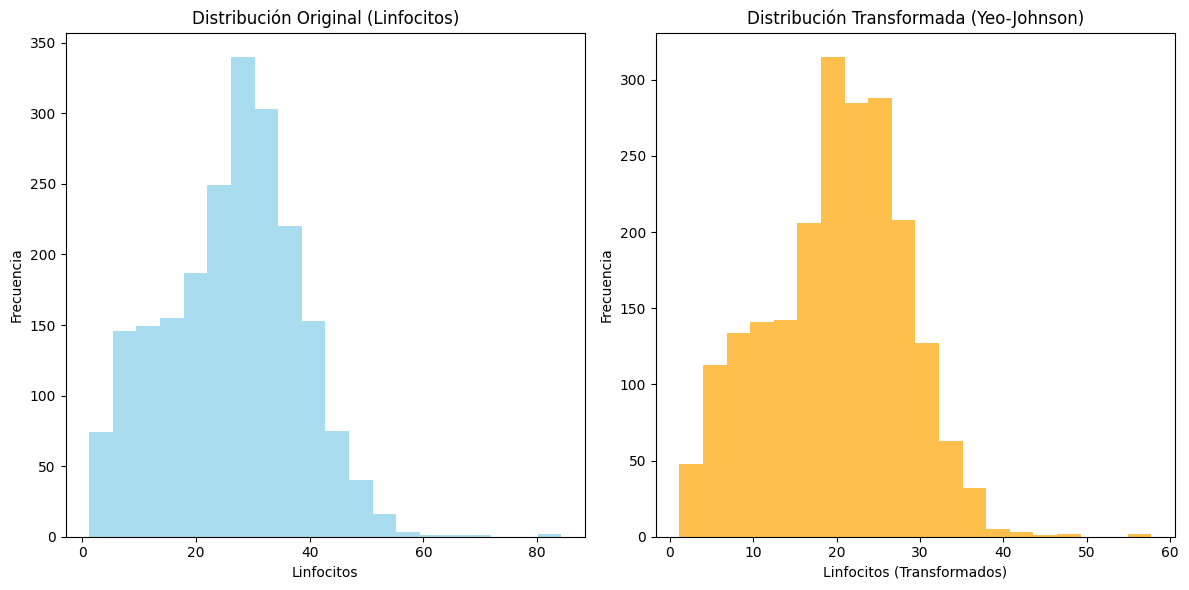

In [32]:
# Verificar si hay valores negativos o nulos y ajustarlos
if (df["linfos"] <= 0).any():
    print("Ajustando valores negativos o nulos en 'linfos'.")
    df["linfos"] = df["linfos"] + abs(df["linfos"].min()) + 1

# Inicializar el transformador Yeo-Johnson sin estandarización (standardize=False)
transformer = PowerTransformer(method="yeo-johnson", standardize=False)

# Aplicar la transformación Yeo-Johnson a la columna 'linfos'
df["linfos_yj"] = transformer.fit_transform(df[["linfos"]])

# Normalizar los valores transformados con MinMaxScaler
df["linfos_yj_n"] = scaler.fit_transform(df[["linfos_yj"]])

# Comparación visual antes y después de la transformación
plt.figure(figsize=(12, 6))

# Histograma de la variable original
plt.subplot(1, 2, 1)
plt.hist(df["linfos"], bins=20, alpha=0.7, color='skyblue')
plt.title("Distribución Original (Linfocitos)")
plt.xlabel("Linfocitos")
plt.ylabel("Frecuencia")

# Histograma de la variable transformada con Yeo-Johnson
plt.subplot(1, 2, 2)
plt.hist(df["linfos_yj"], bins=20, alpha=0.7, color='orange')
plt.title("Distribución Transformada (Yeo-Johnson)")
plt.xlabel("Linfocitos (Transformados)")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Este enfoque asegura que Yeo-Johnson se aplique correctamente a la variable linfos, lo que permite manejar tanto valores negativos como cero. Posteriormente, los datos se normalizan con MinMaxScaler para ajustarse a un rango específico. La visualización facilita la comparación entre la distribución original y la distribución transformada, proporcionando una validación visual del impacto de la transformación.

#### neutrofilos

Se encontraron valores nulos en neutrofilos. Se eliminarán o reemplazarán.


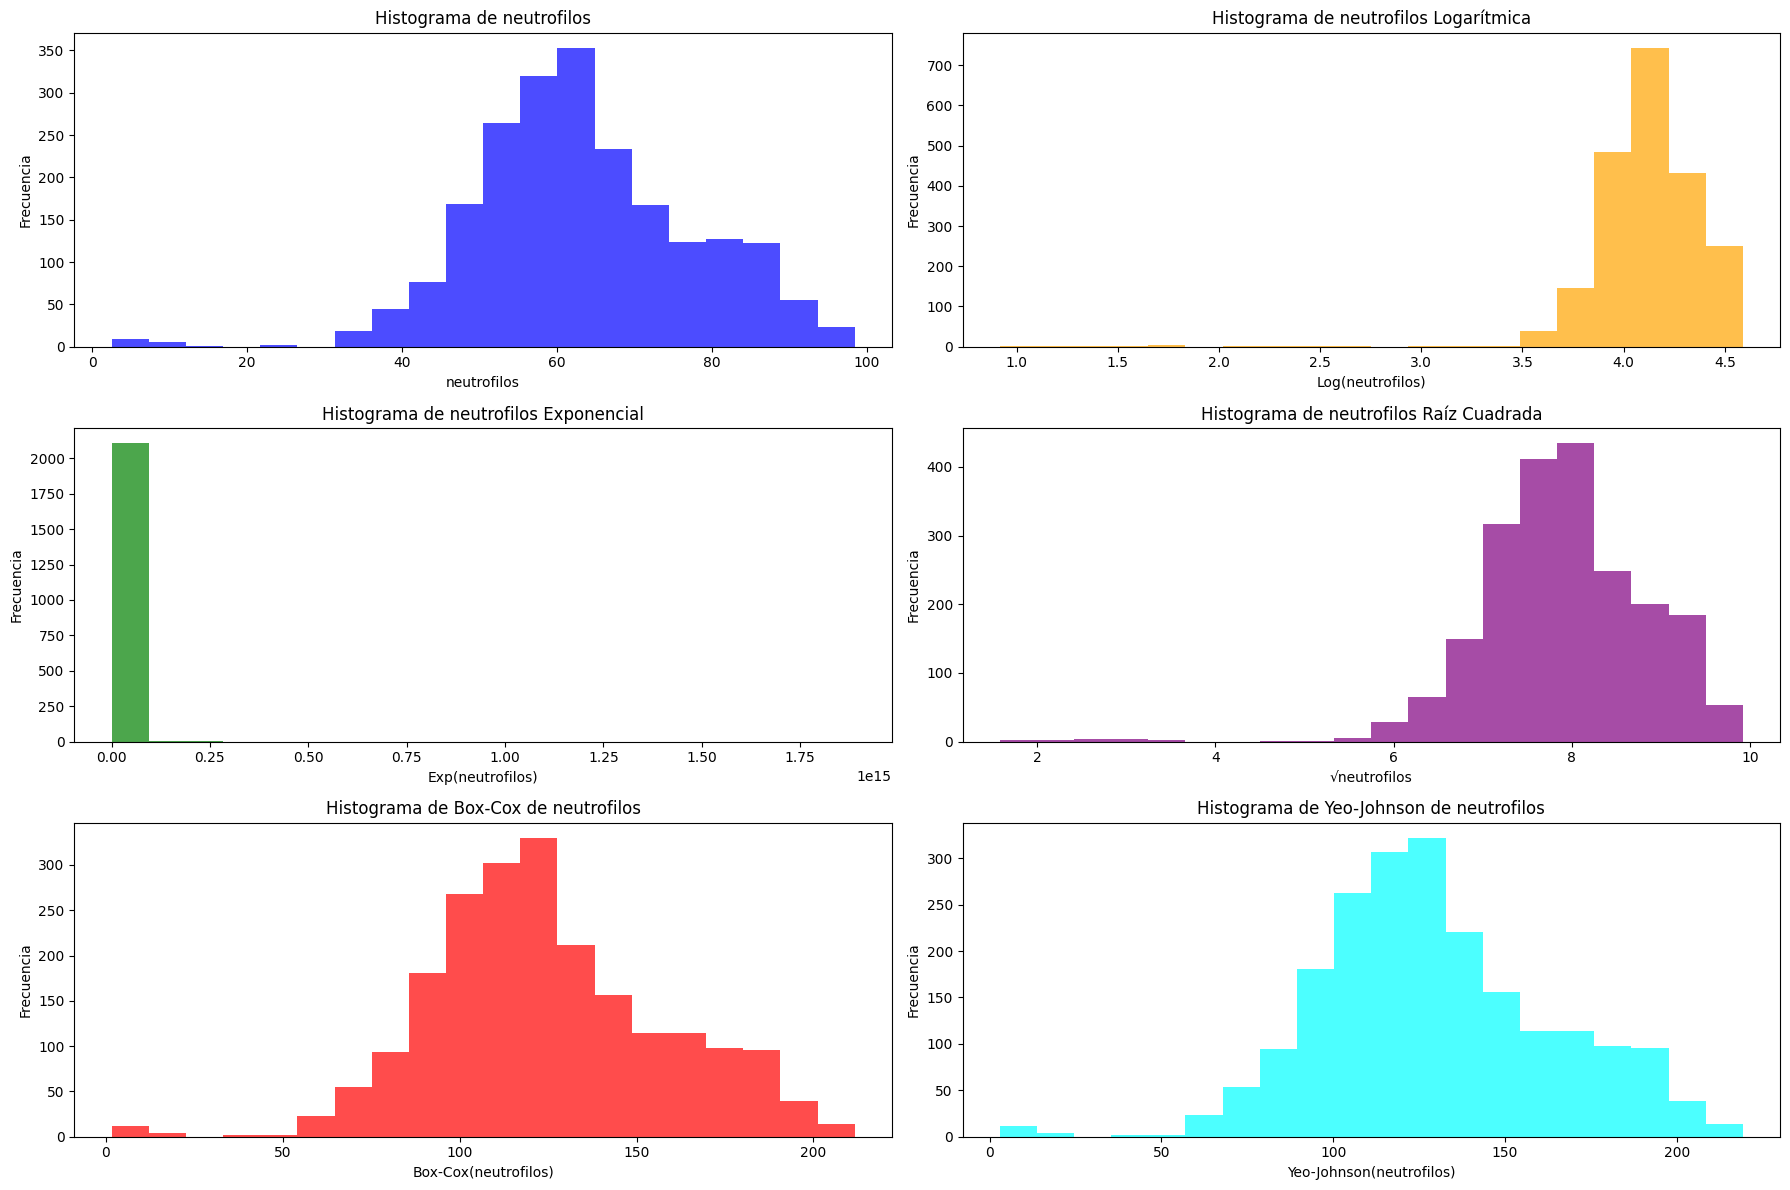


Resultados de normalidad para neutrofilos:
Original: Estadístico = 0.9752, p-value = 0.0000
Logarítmica: Estadístico = 0.7397, p-value = 0.0000
Exponencial: Estadístico = 0.0185, p-value = 0.0000
Raíz Cuadrada: Estadístico = 0.9205, p-value = 0.0000
Box-Cox: Estadístico = 0.9795, p-value = 0.0000
Yeo-Johnson: Estadístico = 0.9795, p-value = 0.0000


In [33]:
analizar_variable(df, "neutrofilos")

Este análisis garantiza que la columna 'neutrofilos' esté lista para su uso en modelos estadísticos o algoritmos de machine learning. La función maneja valores nulos y negativos, aplica varias transformaciones, y realiza pruebas de normalidad para identificar cuál es la más adecuada.

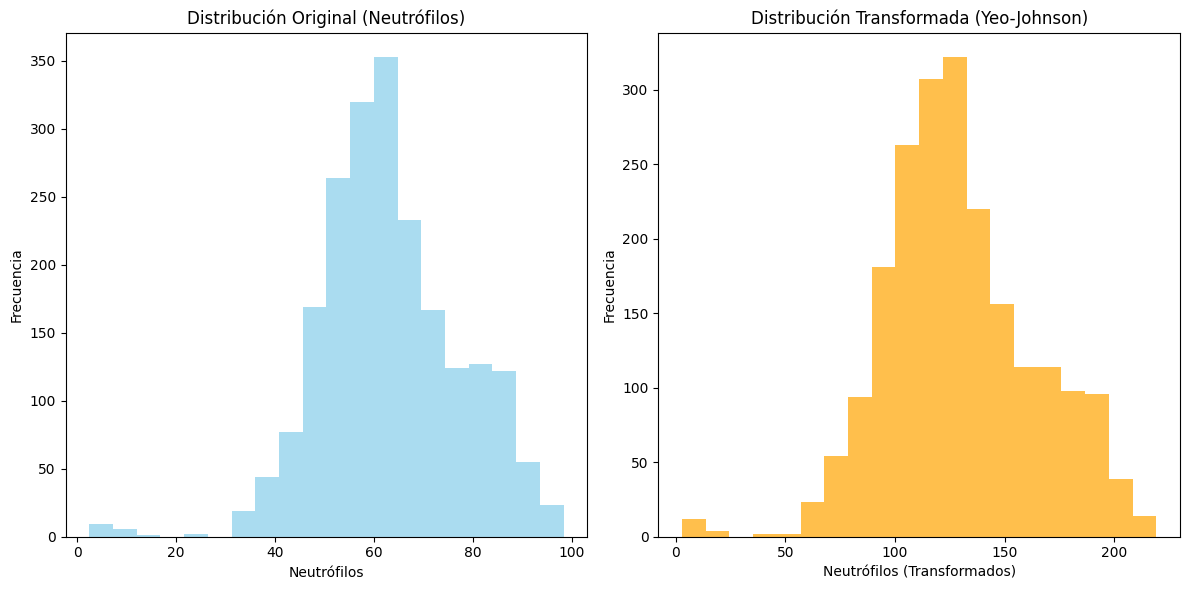

In [34]:
# Verificar y manejar valores nulos
if df["neutrofilos"].isnull().any():
    print("Advertencia: Se encontraron valores nulos en 'neutrofilos'. Se reemplazarán por la media.")
    df["neutrofilos"].fillna(df["neutrofilos"].mean(), inplace=True)

# Inicializar el transformador Yeo-Johnson sin estandarización automática (standardize=False)
transformer = PowerTransformer(method="yeo-johnson", standardize=False)

# Aplicar la transformación Yeo-Johnson a la columna 'neutrofilos'
df["neutrofilos_yj"] = transformer.fit_transform(df[["neutrofilos"]])

# Normalizar los valores transformados con MinMaxScaler
df["neutrofilos_yj_n"] = scaler.fit_transform(df[["neutrofilos_yj"]])

# Comparar visualmente las distribuciones original y transformada
plt.figure(figsize=(12, 6))

# Distribución original de 'neutrofilos'
plt.subplot(1, 2, 1)
plt.hist(df["neutrofilos"], bins=20, alpha=0.7, color='skyblue')
plt.title("Distribución Original (Neutrófilos)")
plt.xlabel("Neutrófilos")
plt.ylabel("Frecuencia")

# Distribución transformada con Yeo-Johnson
plt.subplot(1, 2, 2)
plt.hist(df["neutrofilos_yj"], bins=20, alpha=0.7, color='orange')
plt.title("Distribución Transformada (Yeo-Johnson)")
plt.xlabel("Neutrófilos (Transformados)")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


Este código transforma la variable neutrofilos utilizando Yeo-Johnson y luego normaliza los datos. La visualización te ayudará a comparar la distribución original y la transformada, lo que te permitirá validar la eficacia de la transformación.

#### tp

Se encontraron valores nulos en tp. Se eliminarán o reemplazarán.


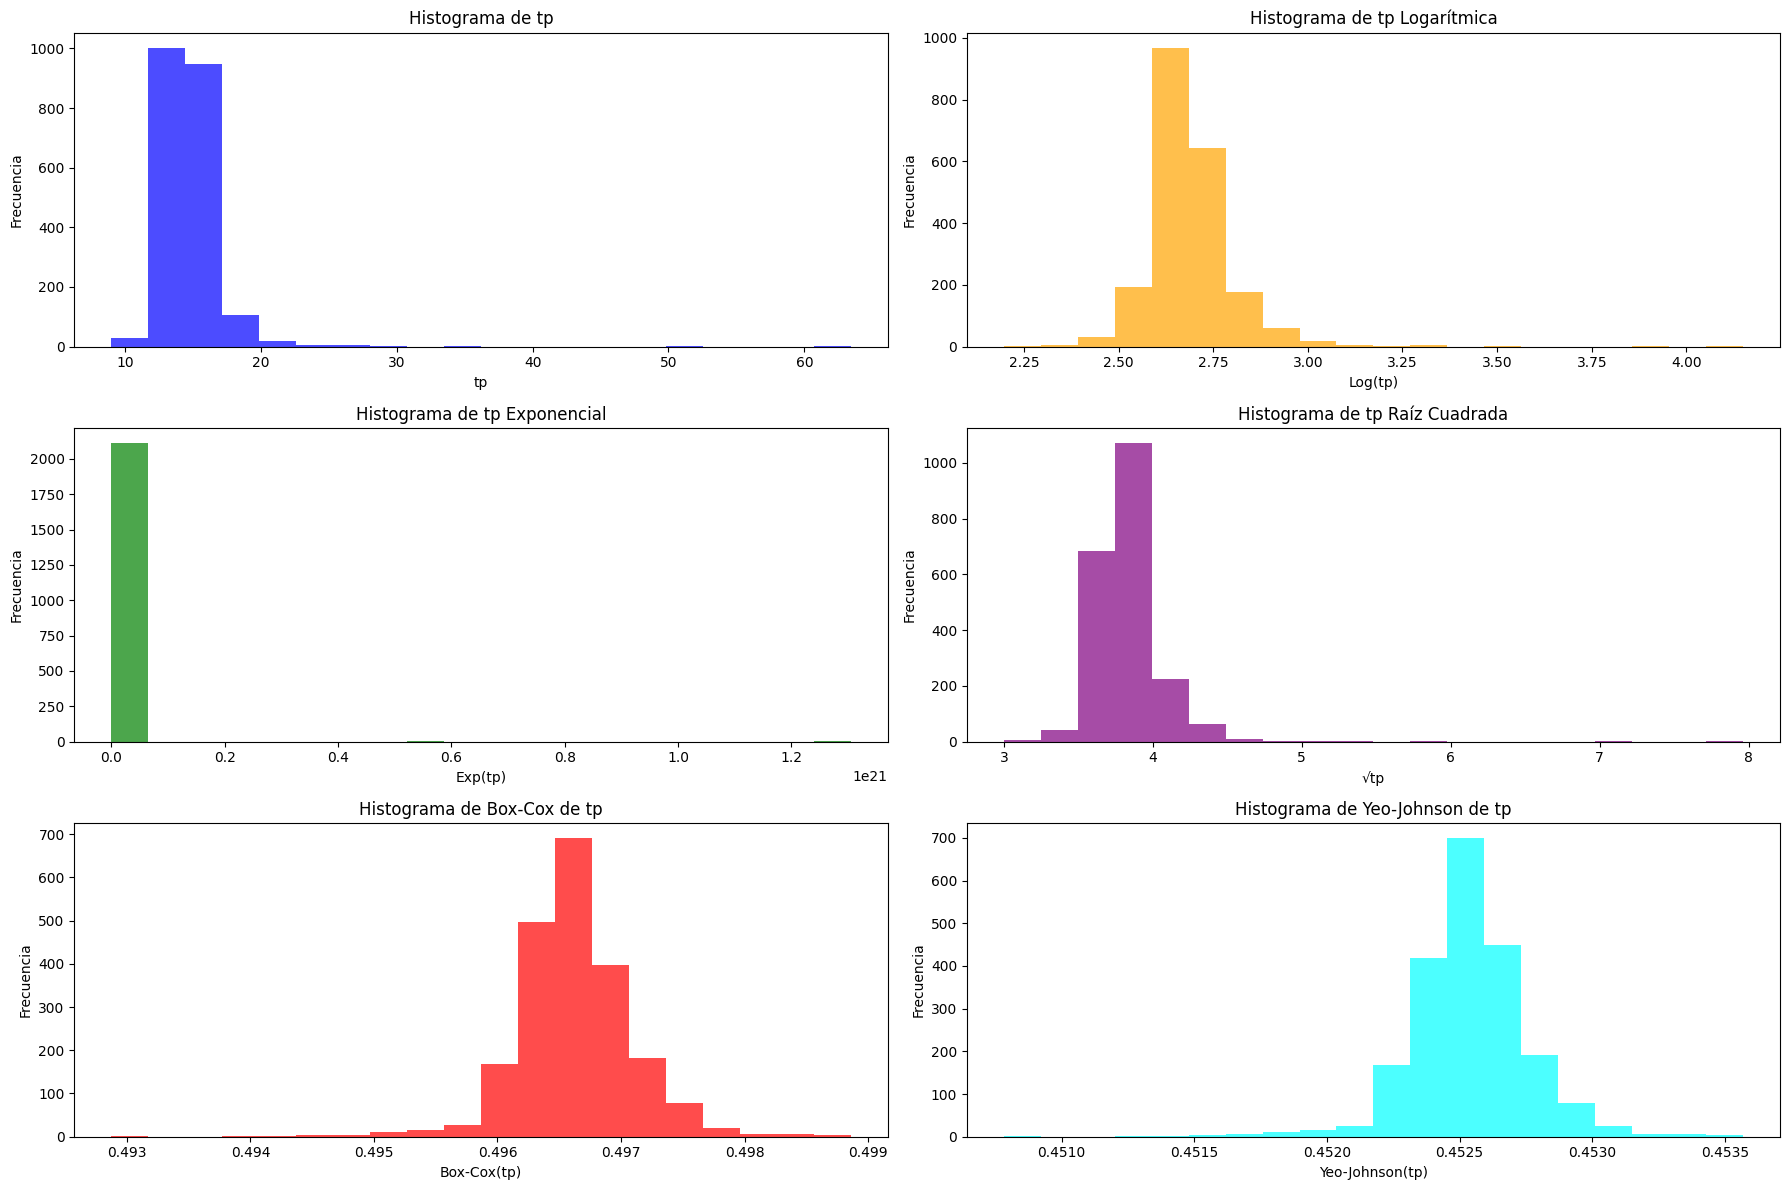


Resultados de normalidad para tp:
Original: Estadístico = 0.5185, p-value = 0.0000
Logarítmica: Estadístico = 0.8019, p-value = 0.0000
Exponencial: Estadístico = 0.0102, p-value = 0.0000
Raíz Cuadrada: Estadístico = 0.6808, p-value = 0.0000
Box-Cox: Estadístico = 0.9450, p-value = 0.0000
Yeo-Johnson: Estadístico = 0.9463, p-value = 0.0000


In [35]:
analizar_variable(df, "tp")

Este análisis garantiza que los datos de la columna 'tp' estén limpios y preparados para su uso en análisis estadísticos o modelos de machine learning. La función detecta problemas en la distribución, aplica transformaciones y realiza pruebas de normalidad para identificar cuál es la más adecuada.

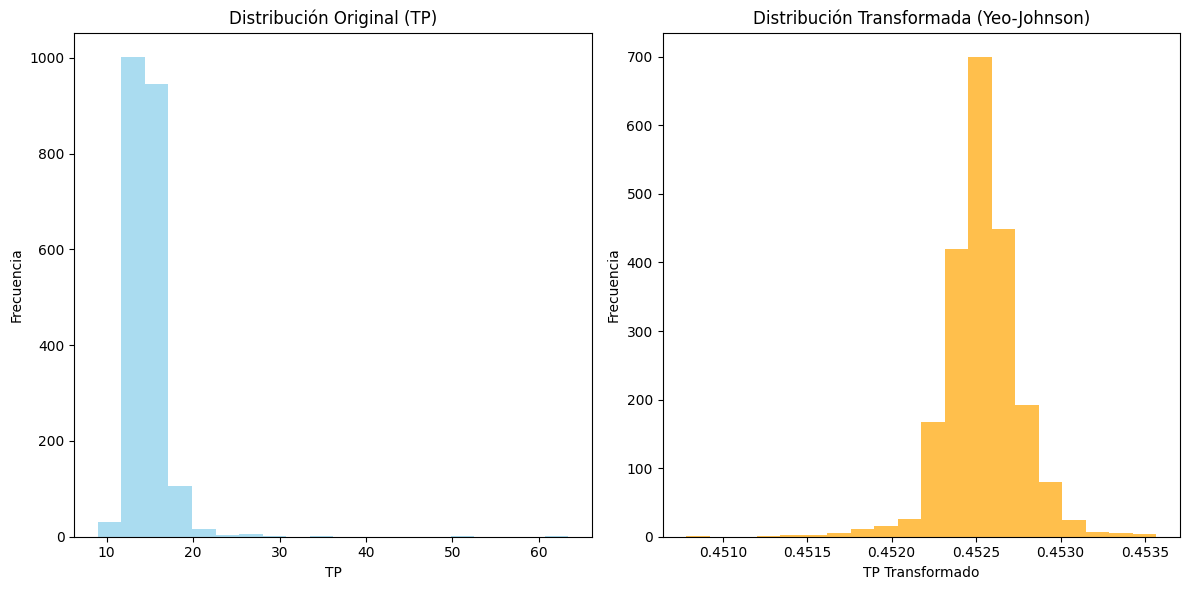

In [36]:
# Verificar y manejar valores nulos
if df["tp"].isnull().any():
    print("Advertencia: Se encontraron valores nulos en 'tp'. Se reemplazarán por la media.")
    df["tp"].fillna(df["tp"].mean(), inplace=True)

# Inicializar el transformador Yeo-Johnson sin estandarización automática (standardize=False)
transformer = PowerTransformer(method="yeo-johnson", standardize=False)

# Aplicar la transformación Yeo-Johnson
df["tp_yj"] = transformer.fit_transform(df[["tp"]])

# Normalizar los valores transformados con MinMaxScaler
df["tp_yj_n"] = scaler.fit_transform(df[["tp_yj"]])

# Comparación visual antes y después de la transformación
plt.figure(figsize=(12, 6))

# Distribución original de 'tp'
plt.subplot(1, 2, 1)
plt.hist(df["tp"], bins=20, alpha=0.7, color='skyblue')
plt.title("Distribución Original (TP)")
plt.xlabel("TP")
plt.ylabel("Frecuencia")

# Distribución transformada con Yeo-Johnson
plt.subplot(1, 2, 2)
plt.hist(df["tp_yj"], bins=20, alpha=0.7, color='orange')
plt.title("Distribución Transformada (Yeo-Johnson)")
plt.xlabel("TP Transformado")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Este código transforma la variable tp usando Yeo-Johnson y luego la normaliza con MinMaxScaler. La transformación Yeo-Johnson es ideal para variables que pueden contener valores cero o negativos, y garantiza una mejor adaptabilidad a diversos tipos de distribuciones. Además, los gráficos generados permiten comparar visualmente la distribución antes y después de la transformación, lo que ayuda a validar los resultados.

#### ttp

Se encontraron valores nulos en ttp. Se eliminarán o reemplazarán.


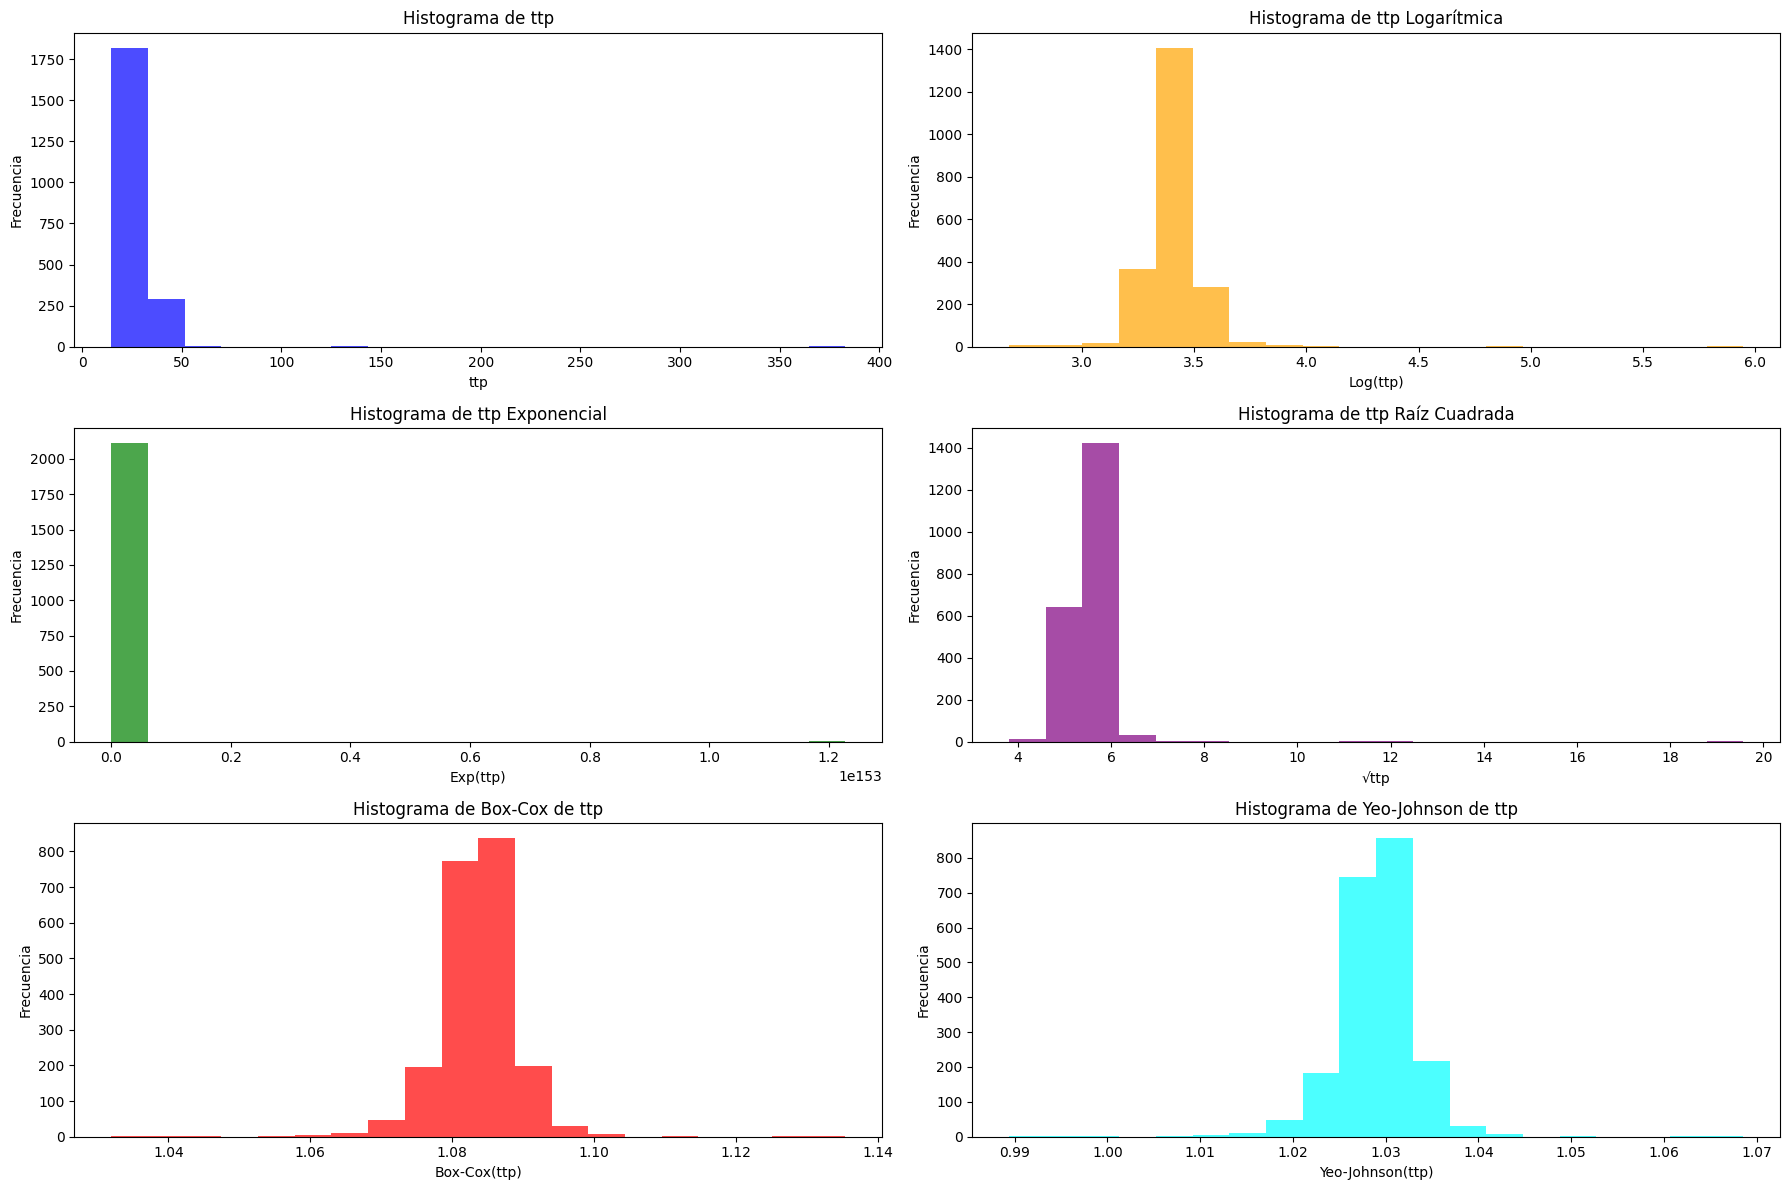


Resultados de normalidad para ttp:
Original: Estadístico = 0.1964, p-value = 0.0000
Logarítmica: Estadístico = 0.7411, p-value = 0.0000
Exponencial: Estadístico = 0.0063, p-value = 0.0000
Raíz Cuadrada: Estadístico = 0.4770, p-value = 0.0000
Box-Cox: Estadístico = 0.8788, p-value = 0.0000
Yeo-Johnson: Estadístico = 0.8810, p-value = 0.0000


In [37]:
analizar_variable(df, "ttp")

Este análisis garantiza que los datos de la columna 'ttp' estén limpios y preparados para su uso en modelos estadísticos o de machine learning. El código maneja valores nulos y negativos, aplica varias transformaciones, y realiza pruebas de normalidad para identificar cuál es la mejor opción.

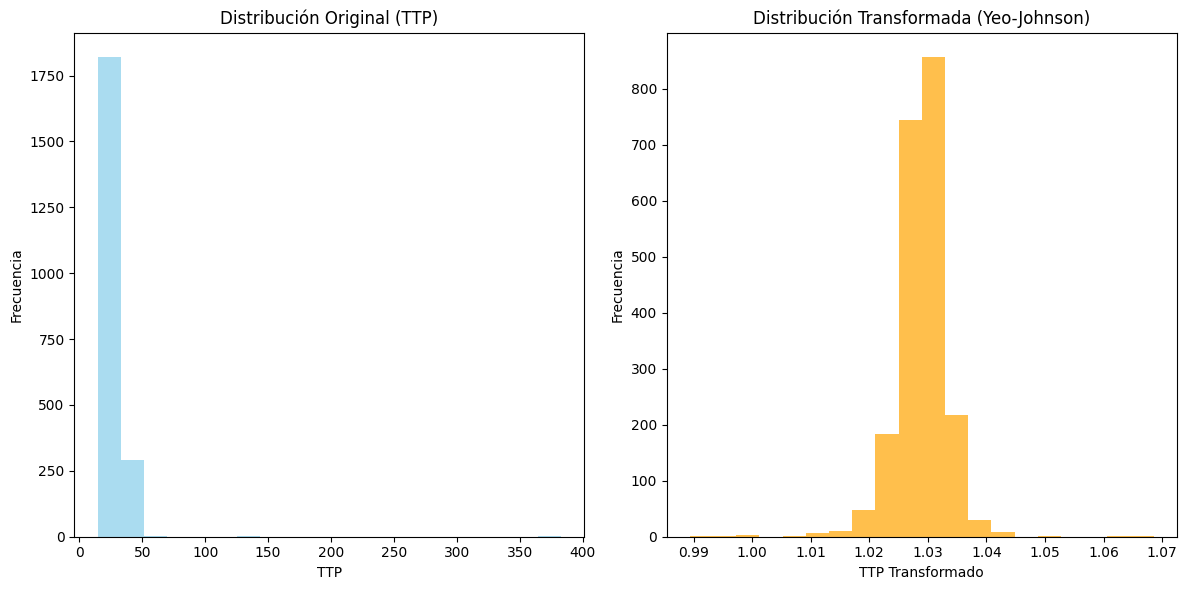

In [38]:
# Verificar y manejar valores nulos
if df["ttp"].isnull().any():
    print("Advertencia: Se encontraron valores nulos en 'ttp'. Se reemplazarán por la media.")
    df["ttp"].fillna(df["ttp"].mean(), inplace=True)

# Inicializar el transformador Yeo-Johnson sin estandarización automática (standardize=False)
transformer = PowerTransformer(method="yeo-johnson", standardize=False)

# Aplicar la transformación Yeo-Johnson
df["ttp_yj"] = transformer.fit_transform(df[["ttp"]])

# Normalizar los valores transformados con MinMaxScaler
df["ttp_yj_n"] = scaler.fit_transform(df[["ttp_yj"]])

# Visualización de la distribución antes y después de la transformación
plt.figure(figsize=(12, 6))

# Distribución original de 'ttp'
plt.subplot(1, 2, 1)
plt.hist(df["ttp"], bins=20, alpha=0.7, color='skyblue')
plt.title("Distribución Original (TTP)")
plt.xlabel("TTP")
plt.ylabel("Frecuencia")

# Distribución transformada con Yeo-Johnson
plt.subplot(1, 2, 2)
plt.hist(df["ttp_yj"], bins=20, alpha=0.7, color='orange')
plt.title("Distribución Transformada (Yeo-Johnson)")
plt.xlabel("TTP Transformado")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Este código aplica la transformación Yeo-Johnson a la variable ttp, una transformación que se adapta a una gran variedad de distribuciones, incluyendo aquellas con valores cero o negativos. Posteriormente, los datos se normalizan con MinMaxScaler. Además, la visualización permite comparar la distribución original y la distribución transformada para validar la efectividad de la transformación.

#### glucosa

Se encontraron valores nulos en glucosa. Se eliminarán o reemplazarán.


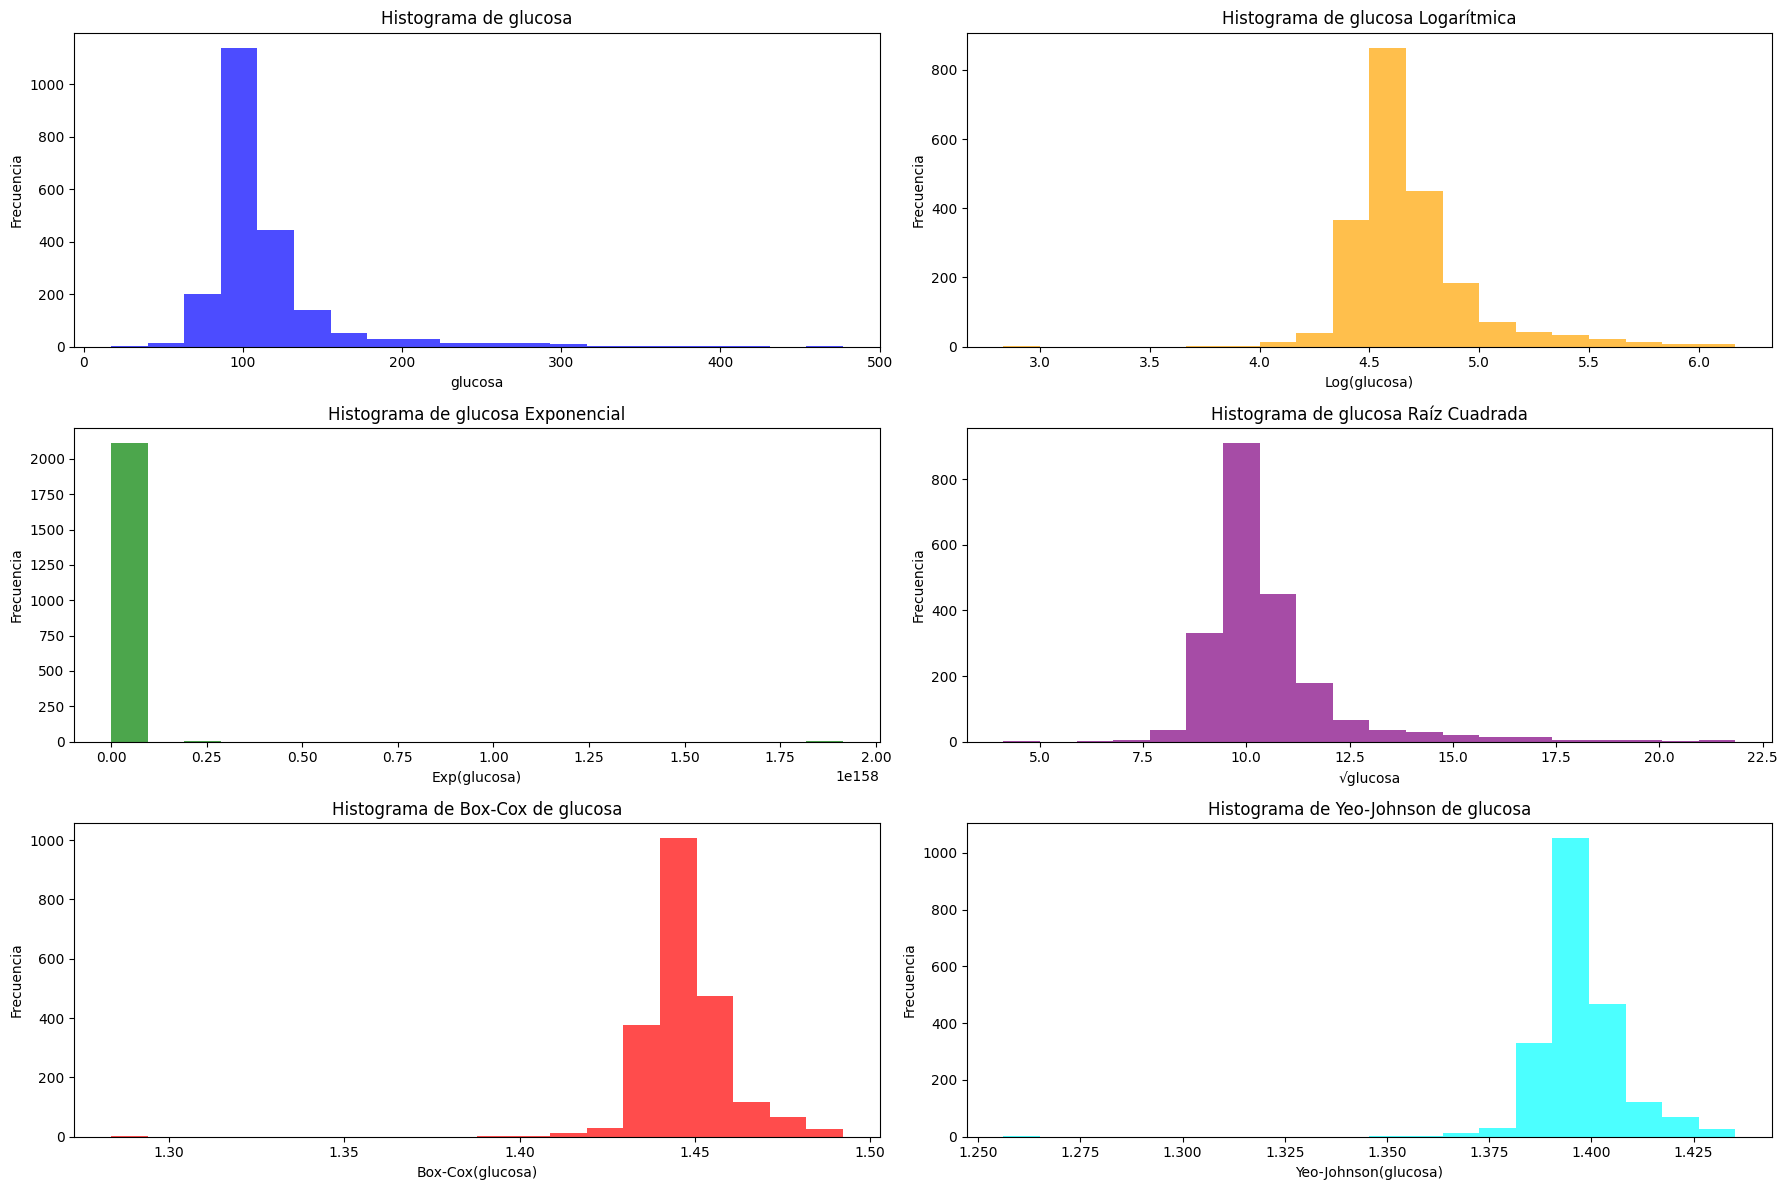


Resultados de normalidad para glucosa:
Original: Estadístico = 0.6292, p-value = 0.0000
Logarítmica: Estadístico = 0.8428, p-value = 0.0000
Exponencial: Estadístico = 0.0078, p-value = 0.0000
Raíz Cuadrada: Estadístico = 0.7484, p-value = 0.0000
Box-Cox: Estadístico = 0.8780, p-value = 0.0000
Yeo-Johnson: Estadístico = 0.8795, p-value = 0.0000


In [39]:
analizar_variable(df, "glucosa")

Este análisis garantiza que los datos de la columna 'glucosa' estén preparados para su uso en análisis estadísticos y modelos predictivos. La función detecta problemas en la distribución, aplica varias transformaciones y realiza pruebas de normalidad para identificar la mejor opción.

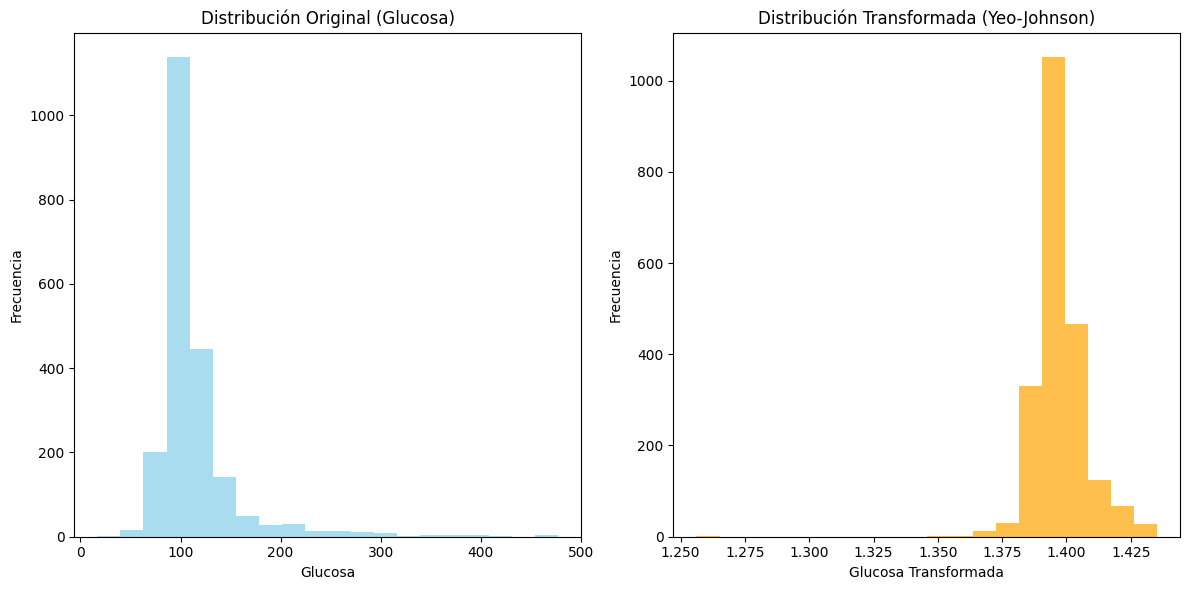

In [40]:
# Verificar y manejar valores nulos
if df["glucosa"].isnull().any():
    print("Advertencia: Se encontraron valores nulos en 'glucosa'. Se reemplazarán por la media.")
    df["glucosa"].fillna(df["glucosa"].mean(), inplace=True)

# Inicializar el transformador Yeo-Johnson sin estandarización automática (standardize=False)
transformer = PowerTransformer(method="yeo-johnson", standardize=False)

# Aplicar la transformación Yeo-Johnson a la columna 'glucosa'
df["glucosa_yj"] = transformer.fit_transform(df[["glucosa"]])

# Normalizar los valores transformados con MinMaxScaler
df["glucosa_yj_n"] = scaler.fit_transform(df[["glucosa_yj"]])

# Visualización de las distribuciones antes y después de la transformación
plt.figure(figsize=(12, 6))

# Distribución original de 'glucosa'
plt.subplot(1, 2, 1)
plt.hist(df["glucosa"], bins=20, alpha=0.7, color='skyblue')
plt.title("Distribución Original (Glucosa)")
plt.xlabel("Glucosa")
plt.ylabel("Frecuencia")

# Distribución transformada con Yeo-Johnson
plt.subplot(1, 2, 2)
plt.hist(df["glucosa_yj"], bins=20, alpha=0.7, color='orange')
plt.title("Distribución Transformada (Yeo-Johnson)")
plt.xlabel("Glucosa Transformada")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Este código transforma la variable glucosa utilizando Yeo-Johnson, lo que garantiza que los datos se ajusten mejor a una distribución normal y puedan manejar valores cero o negativos. Luego, la normalización con MinMaxScaler asegura que los valores transformados estén en el rango 0 a 1. Los gráficos permiten visualizar el efecto de la transformación sobre la distribución de los datos, ayudando a validar la mejora.

#### bun

Se encontraron valores nulos en bun. Se eliminarán o reemplazarán.


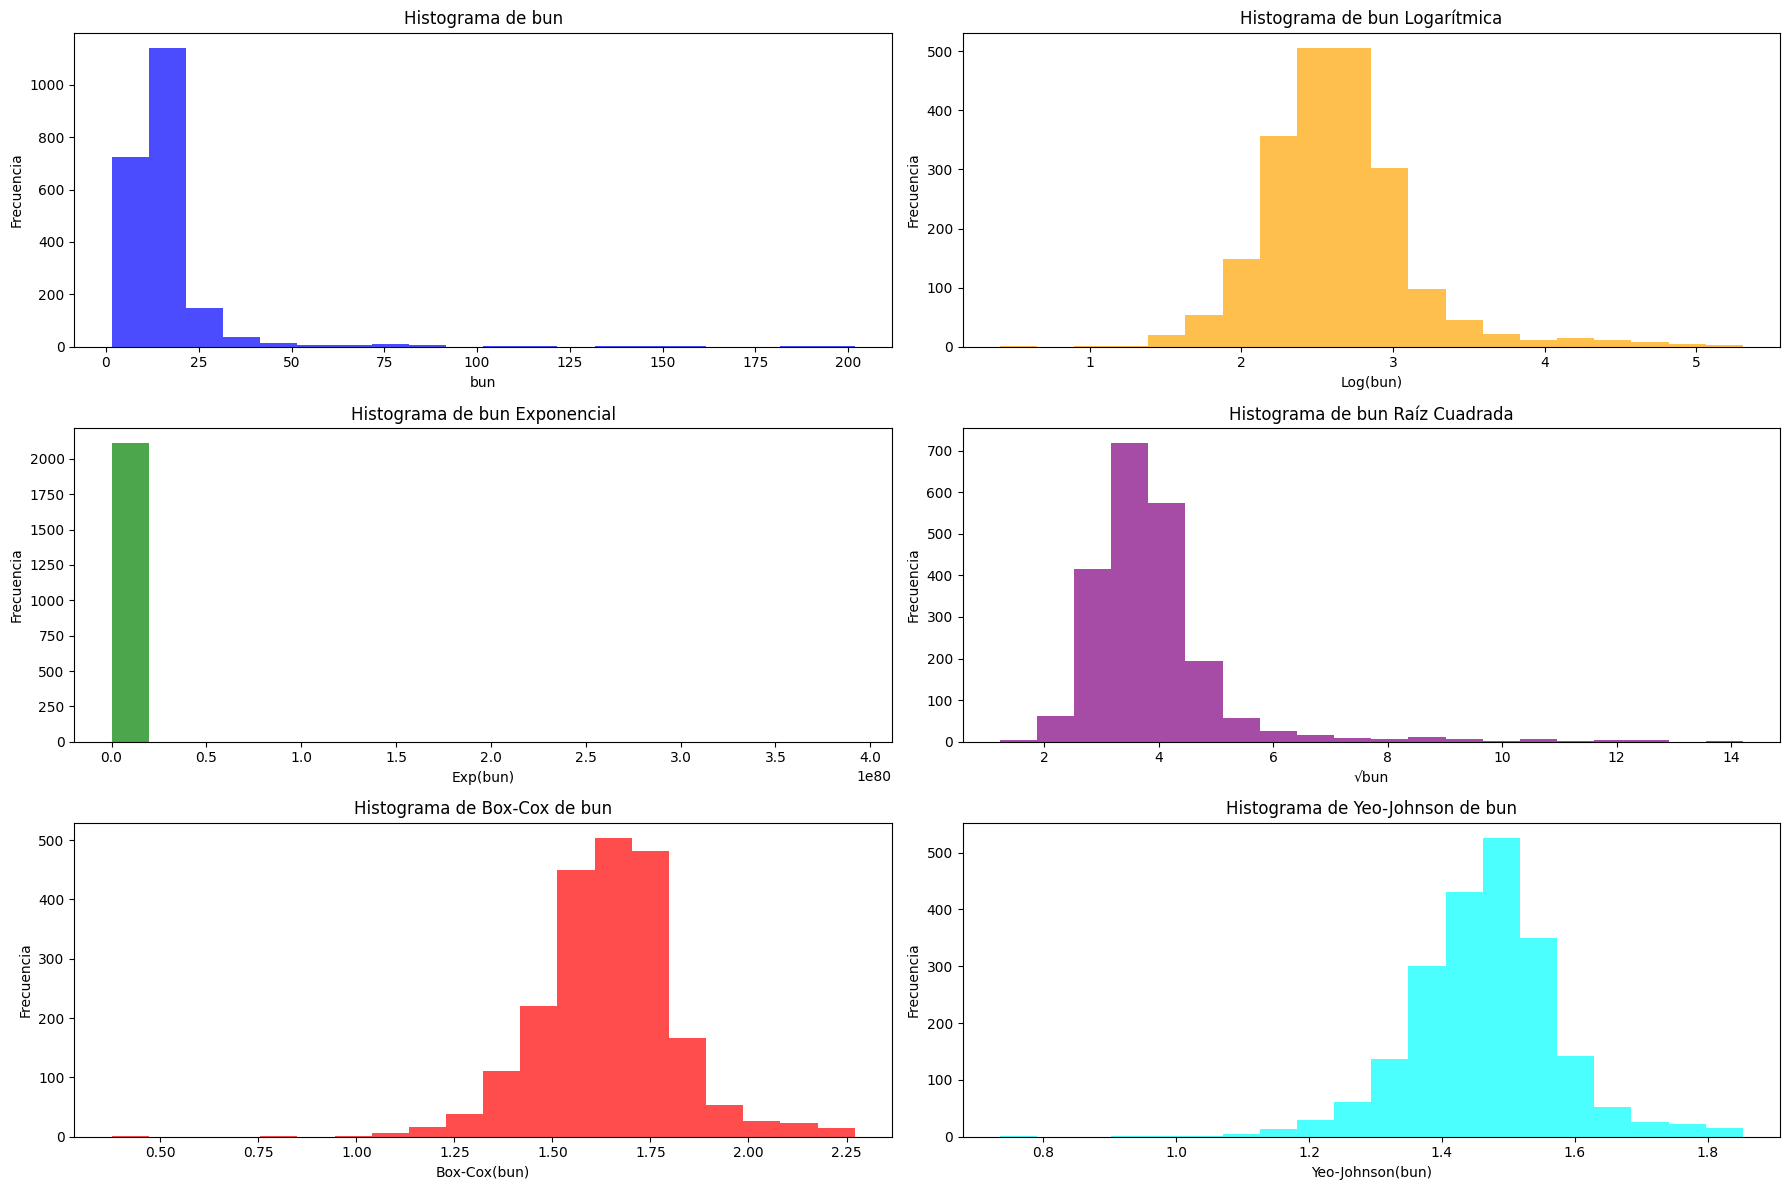


Resultados de normalidad para bun:
Original: Estadístico = 0.4662, p-value = 0.0000
Logarítmica: Estadístico = 0.9276, p-value = 0.0000
Exponencial: Estadístico = 0.0063, p-value = 0.0000
Raíz Cuadrada: Estadístico = 0.7323, p-value = 0.0000
Box-Cox: Estadístico = 0.9704, p-value = 0.0000
Yeo-Johnson: Estadístico = 0.9769, p-value = 0.0000


In [41]:
analizar_variable(df, "bun")

Este código garantiza que los datos de la columna 'bun' estén preparados y listos para su uso en análisis o modelos de machine learning. El proceso incluye manejo de nulos, ajustes de valores negativos, aplicación de transformaciones y pruebas de normalidad.

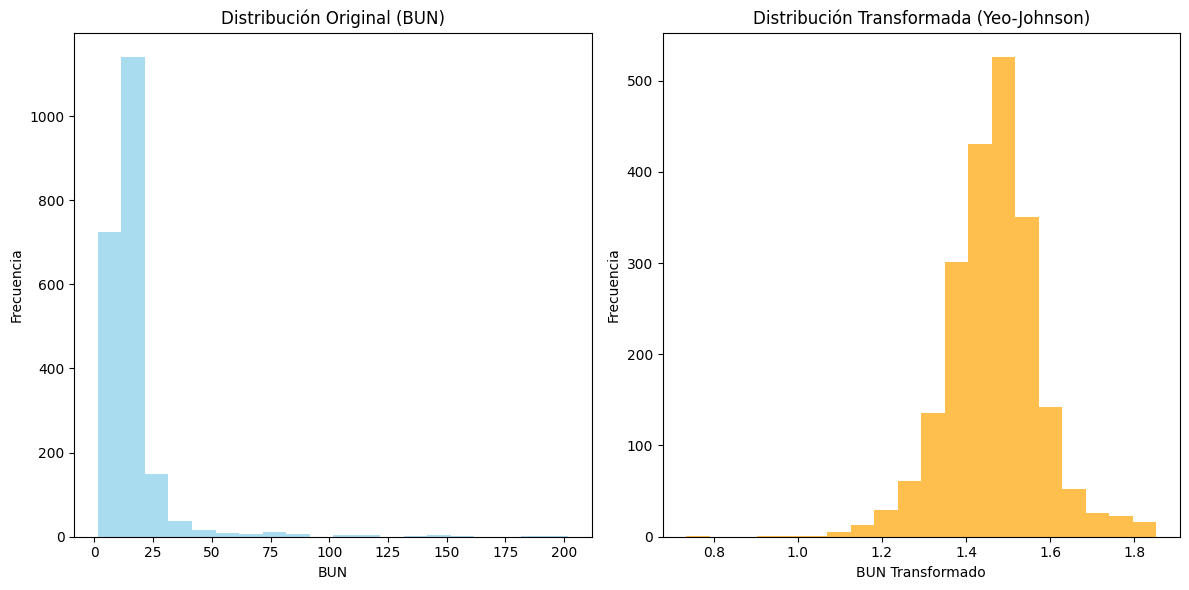

In [42]:
# Verificar y manejar valores nulos
if df["bun"].isnull().any():
    print("Advertencia: Se encontraron valores nulos en 'bun'. Se reemplazarán por la media.")
    df["bun"].fillna(df["bun"].mean(), inplace=True)

# Inicializar el transformador Yeo-Johnson sin estandarización automática (standardize=False)
transformer = PowerTransformer(method="yeo-johnson", standardize=False)

# Aplicar la transformación Yeo-Johnson
df["bun_yj"] = transformer.fit_transform(df[["bun"]])

# Normalizar los valores transformados con MinMaxScaler
df["bun_yj_n"] = scaler.fit_transform(df[["bun_yj"]])

# Visualización de las distribuciones antes y después de la transformación
plt.figure(figsize=(12, 6))

# Distribución original de 'bun'
plt.subplot(1, 2, 1)
plt.hist(df["bun"], bins=20, alpha=0.7, color='skyblue')
plt.title("Distribución Original (BUN)")
plt.xlabel("BUN")
plt.ylabel("Frecuencia")

# Distribución transformada con Yeo-Johnson
plt.subplot(1, 2, 2)
plt.hist(df["bun_yj"], bins=20, alpha=0.7, color='orange')
plt.title("Distribución Transformada (Yeo-Johnson)")
plt.xlabel("BUN Transformado")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Este código transforma la variable bun utilizando Yeo-Johnson, una transformación que se adapta a varias distribuciones y puede manejar valores negativos o cero. Después de la transformación, se utiliza MinMaxScaler para normalizar los datos entre 0 y 1. Los gráficos proporcionan una visualización clara de la distribución original y la distribución transformada, lo que te permite evaluar el impacto de la transformación.

#### creatinina

Se encontraron valores nulos en creatinina. Se eliminarán o reemplazarán.


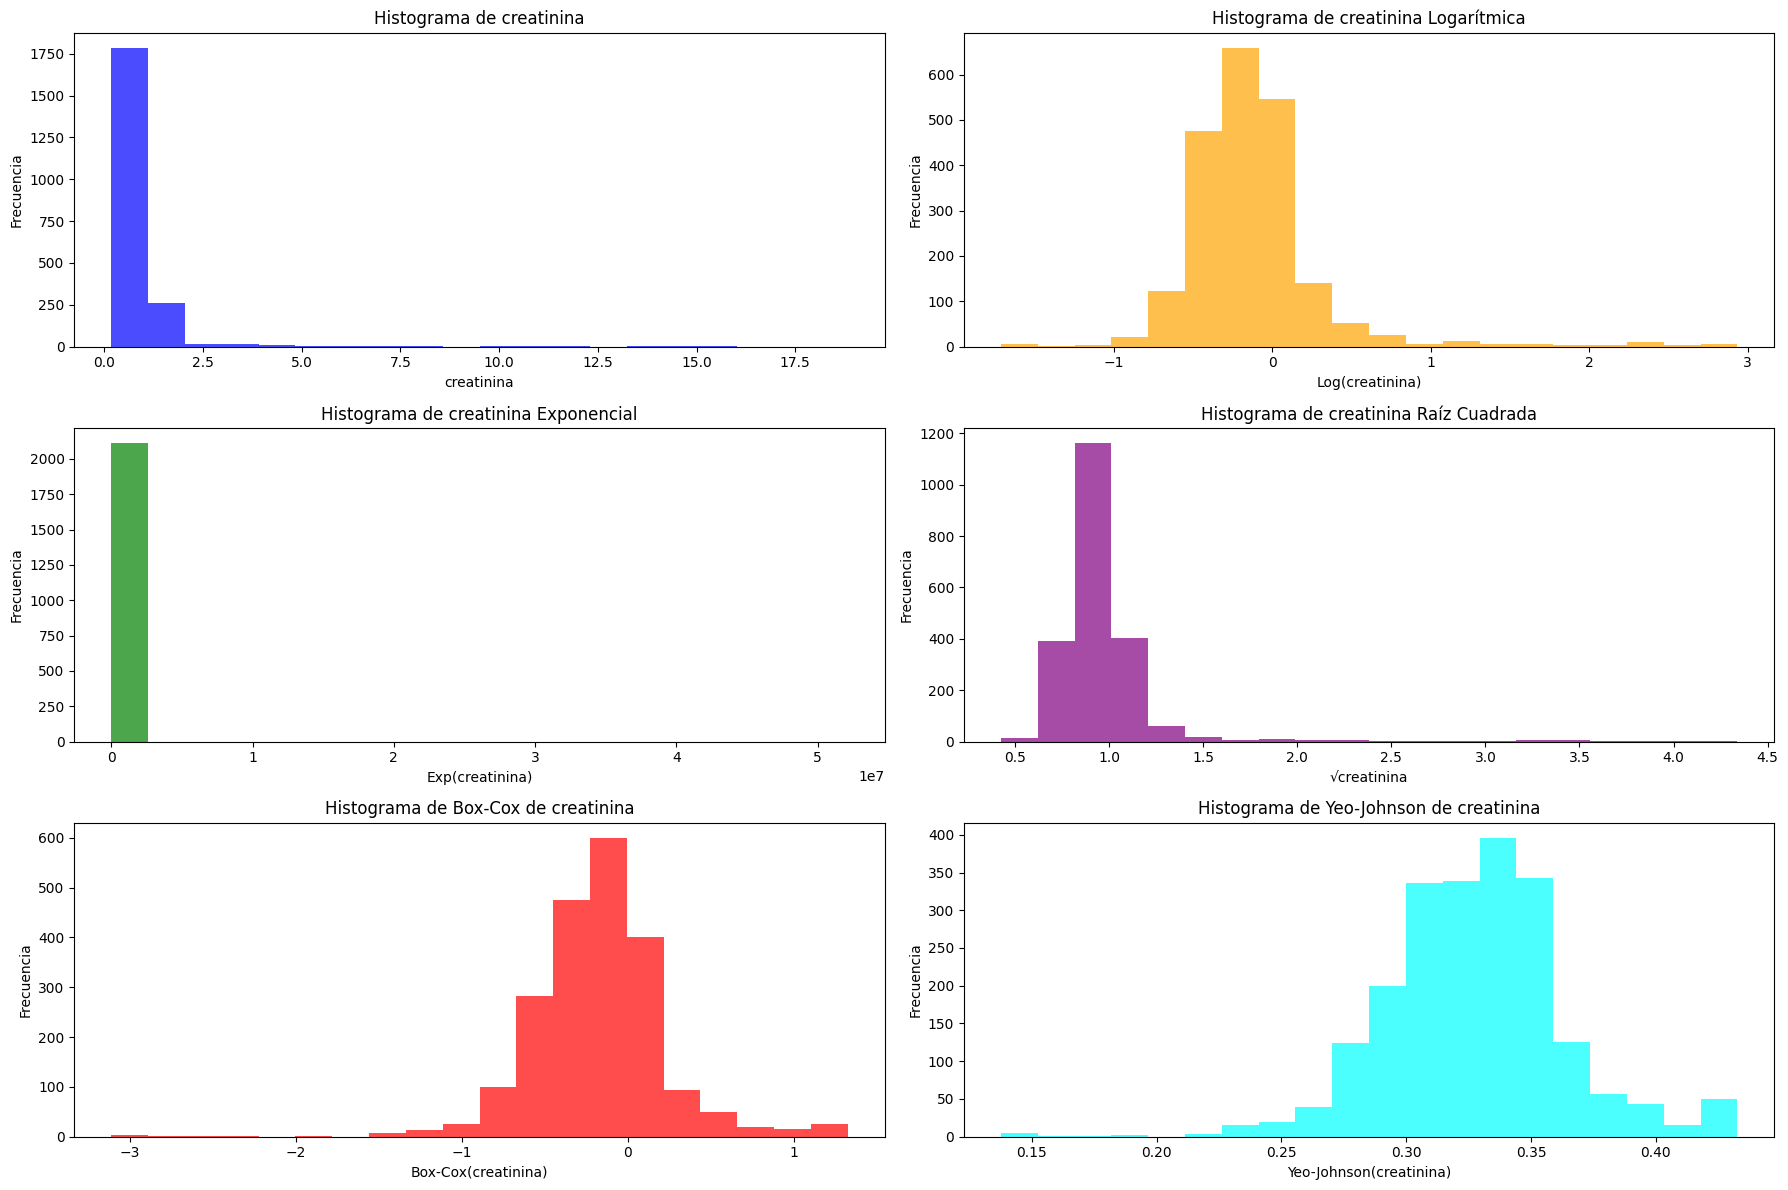


Resultados de normalidad para creatinina:
Original: Estadístico = 0.2702, p-value = 0.0000
Logarítmica: Estadístico = 0.7775, p-value = 0.0000
Exponencial: Estadístico = 0.0092, p-value = 0.0000
Raíz Cuadrada: Estadístico = 0.4999, p-value = 0.0000
Box-Cox: Estadístico = 0.9156, p-value = 0.0000
Yeo-Johnson: Estadístico = 0.9689, p-value = 0.0000


In [43]:
analizar_variable(df, "creatinina")

Este análisis garantiza que los datos de la columna 'creatinina' estén limpios y listos para su uso en análisis estadísticos o modelos predictivos. La función detecta y corrige problemas de distribución, aplica varias transformaciones, y realiza pruebas de normalidad para identificar cuál es la mejor opción.:

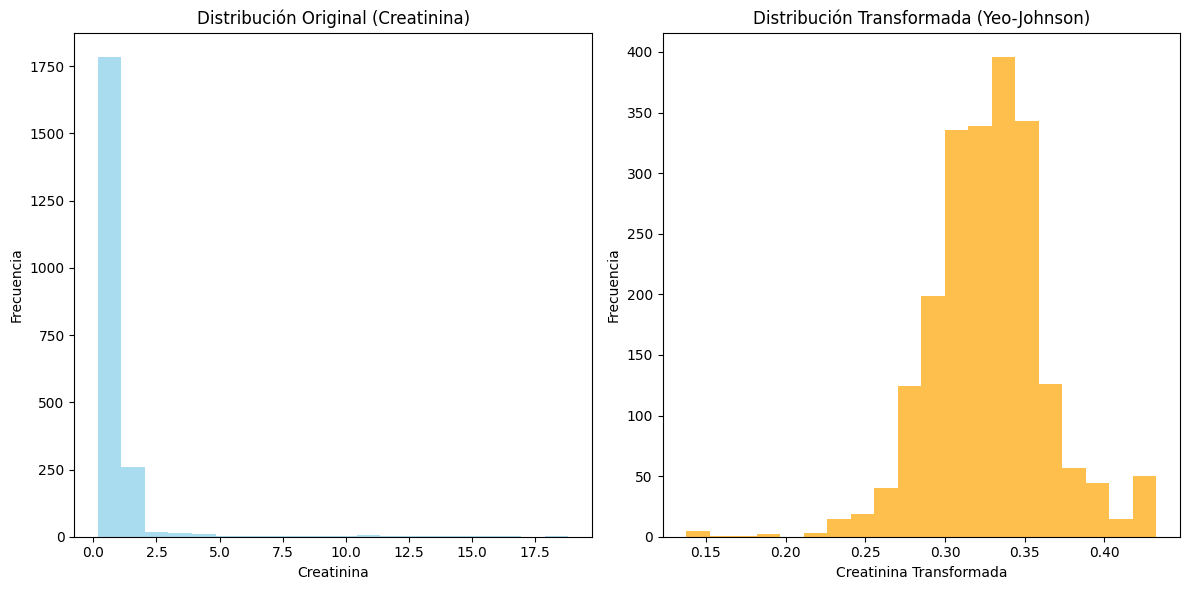

In [44]:
# Verificar y manejar valores nulos
if df["creatinina"].isnull().any():
    print("Advertencia: Se encontraron valores nulos en 'creatinina'. Se reemplazarán por la media.")
    df["creatinina"].fillna(df["creatinina"].mean(), inplace=True)

# Inicializar el transformador Yeo-Johnson sin estandarización automática (standardize=False)
transformer = PowerTransformer(method="yeo-johnson", standardize=False)

# Aplicar la transformación Yeo-Johnson
df["creatinina_yj"] = transformer.fit_transform(df[["creatinina"]])

# Normalizar los valores transformados con MinMaxScaler
df["creatinina_yj_n"] = scaler.fit_transform(df[["creatinina_yj"]])

# Visualización de las distribuciones antes y después de la transformación
plt.figure(figsize=(12, 6))

# Distribución original de 'creatinina'
plt.subplot(1, 2, 1)
plt.hist(df["creatinina"], bins=20, alpha=0.7, color='skyblue')
plt.title("Distribución Original (Creatinina)")
plt.xlabel("Creatinina")
plt.ylabel("Frecuencia")

# Distribución transformada con Yeo-Johnson
plt.subplot(1, 2, 2)
plt.hist(df["creatinina_yj"], bins=20, alpha=0.7, color='orange')
plt.title("Distribución Transformada (Yeo-Johnson)")
plt.xlabel("Creatinina Transformada")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Este código transforma la variable creatinina utilizando Yeo-Johnson, una transformación adecuada para manejar una variedad de distribuciones, incluidos valores cero o negativos. Luego, se normalizan los valores con MinMaxScaler para ajustarlos al rango de 0 a 1. Los gráficos permiten comparar la distribución original y la distribución transformada, proporcionando una validación visual de los cambios realizados.

#### sodio

Se encontraron valores nulos en sodio. Se eliminarán o reemplazarán.


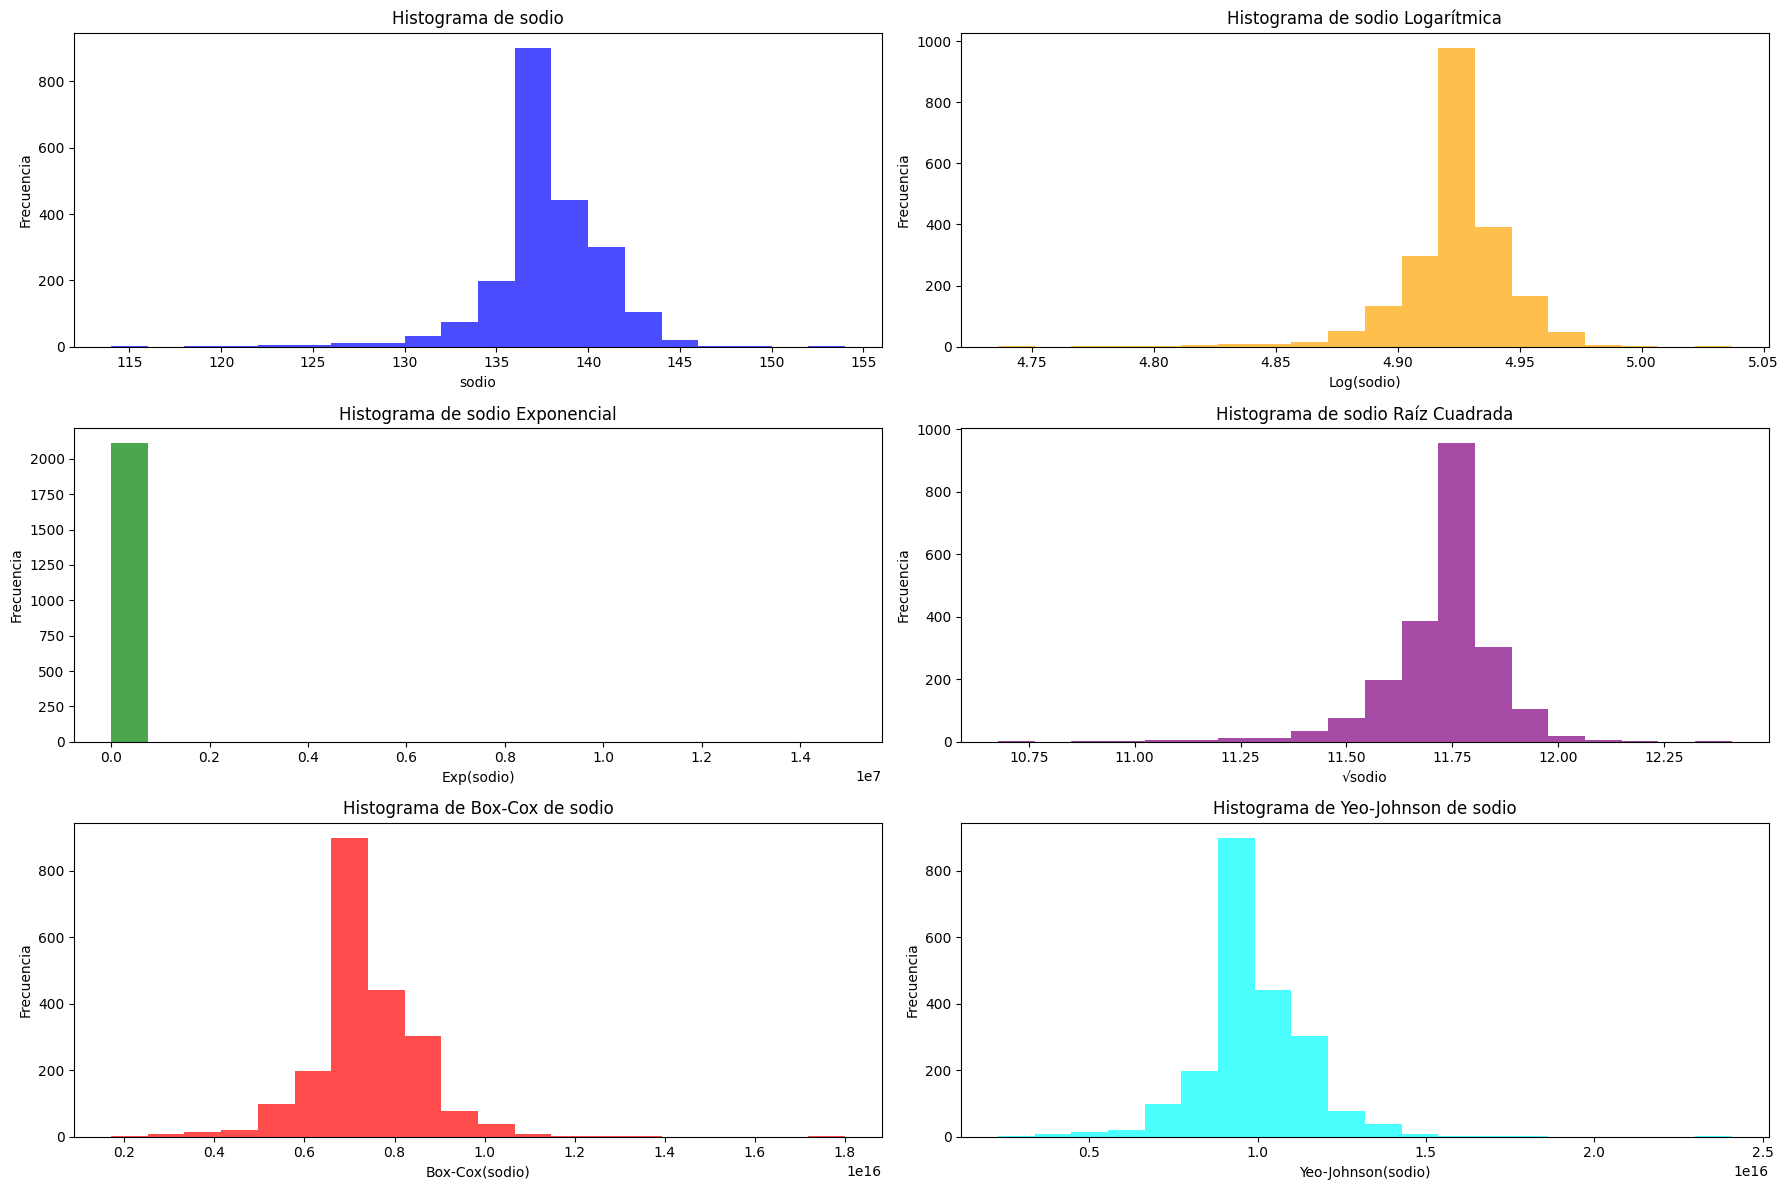


Resultados de normalidad para sodio:
Original: Estadístico = 0.8885, p-value = 0.0000
Logarítmica: Estadístico = 0.8754, p-value = 0.0000
Exponencial: Estadístico = 0.0065, p-value = 0.0000
Raíz Cuadrada: Estadístico = 0.8822, p-value = 0.0000
Box-Cox: Estadístico = 0.9244, p-value = 0.0000
Yeo-Johnson: Estadístico = 0.9244, p-value = 0.0000


In [45]:
analizar_variable(df, "sodio")

Este análisis asegura que los datos de la columna 'sodio' estén limpios y preparados para su uso en análisis estadísticos o modelos predictivos. La función maneja valores nulos, ajusta valores anómalos y aplica varias transformaciones para mejorar la distribución.

Estas mejoras garantizan que los datos estén en las mejores condiciones para su uso en modelos predictivos y análisis avanzados, aumentando su precisión y rendimiento.

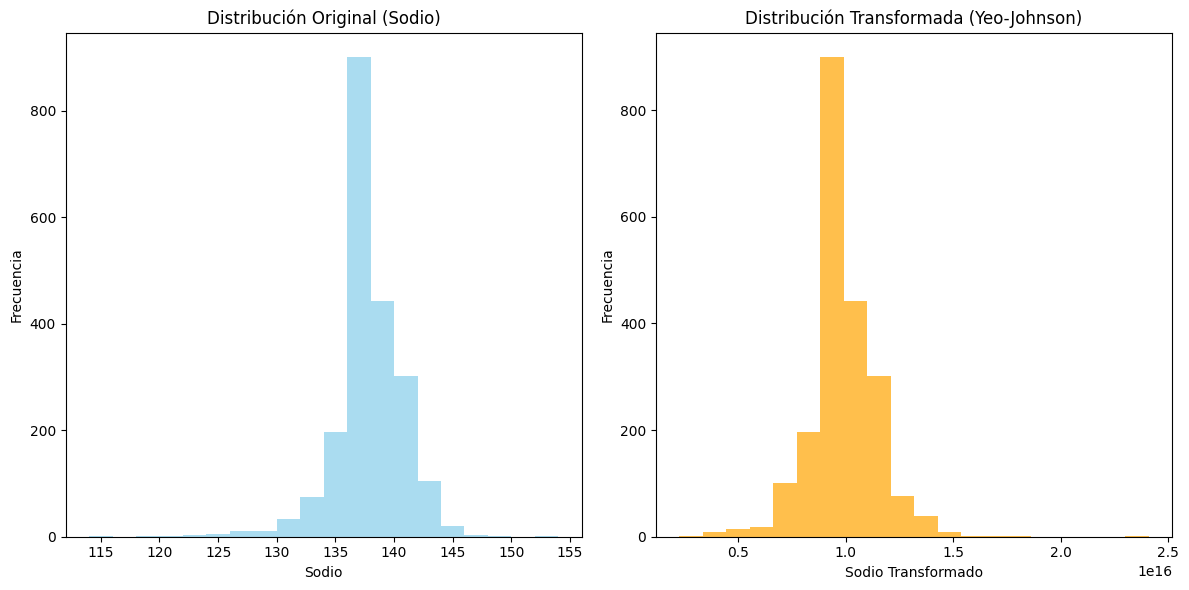

In [46]:
# Verificar y manejar valores nulos
if df["sodio"].isnull().any():
    print("Advertencia: Se encontraron valores nulos en 'sodio'. Se reemplazarán por la media.")
    df["sodio"].fillna(df["sodio"].mean(), inplace=True)

# Inicializar el transformador Yeo-Johnson sin estandarización automática (standardize=False)
transformer = PowerTransformer(method="yeo-johnson", standardize=False)

# Aplicar la transformación Yeo-Johnson a la columna 'sodio'
df["sodio_yj"] = transformer.fit_transform(df[["sodio"]])

# Normalizar los valores transformados con MinMaxScaler
df["sodio_yj_n"] = scaler.fit_transform(df[["sodio_yj"]])

# Visualización de las distribuciones antes y después de la transformación
plt.figure(figsize=(12, 6))

# Distribución original de 'sodio'
plt.subplot(1, 2, 1)
plt.hist(df["sodio"], bins=20, alpha=0.7, color='skyblue')
plt.title("Distribución Original (Sodio)")
plt.xlabel("Sodio")
plt.ylabel("Frecuencia")

# Distribución transformada con Yeo-Johnson
plt.subplot(1, 2, 2)
plt.hist(df["sodio_yj"], bins=20, alpha=0.7, color='orange')
plt.title("Distribución Transformada (Yeo-Johnson)")
plt.xlabel("Sodio Transformado")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Este código transforma la variable sodio utilizando Yeo-Johnson, lo que garantiza que los datos se ajusten mejor a una distribución normal y pueden manejar valores cero o negativos. Posteriormente, los datos se normalizan con MinMaxScaler para ajustarlos al rango de 0 a 1. Los gráficos permiten comparar la distribución original y la distribución transformada, proporcionando una validación visual del efecto de la transformación.

#### potasio

Se encontraron valores nulos en potasio. Se eliminarán o reemplazarán.


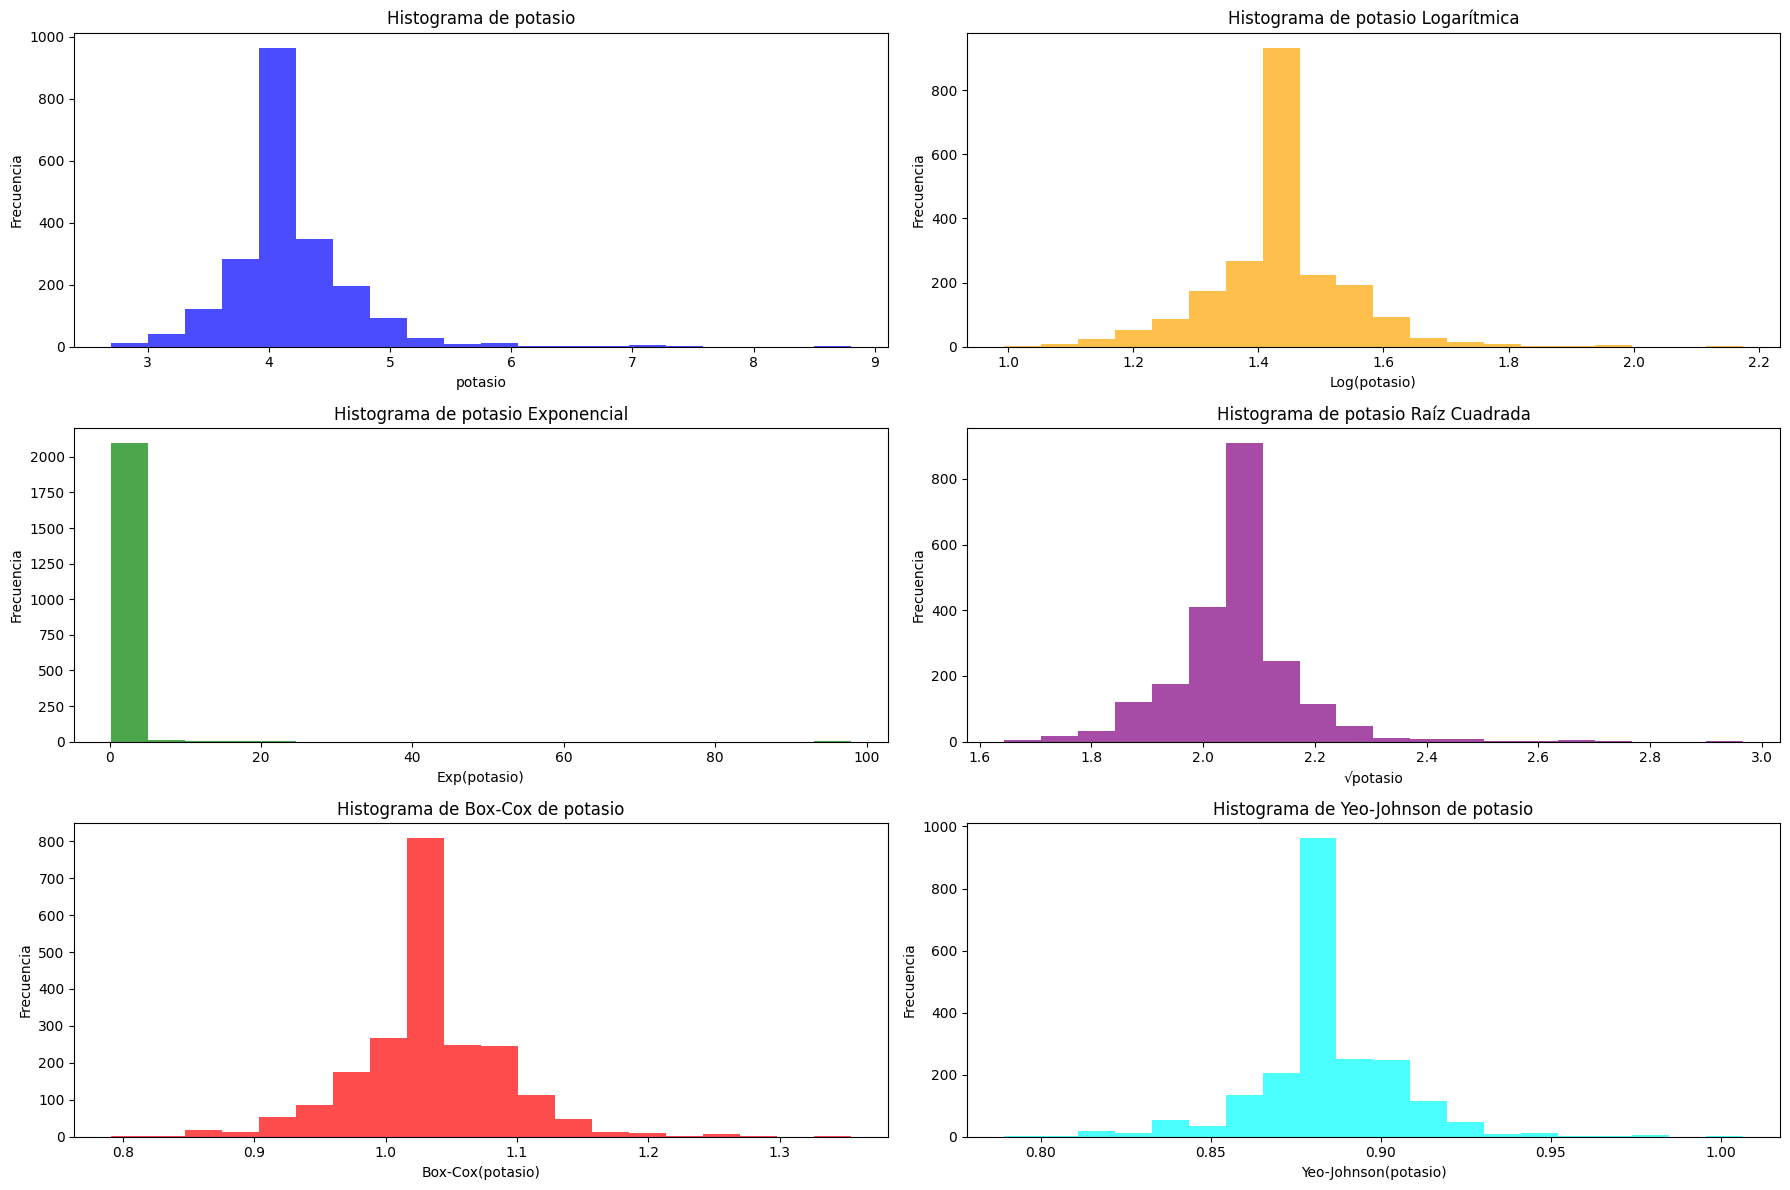


Resultados de normalidad para potasio:
Original: Estadístico = 0.8894, p-value = 0.0000
Logarítmica: Estadístico = 0.9313, p-value = 0.0000
Exponencial: Estadístico = 0.1133, p-value = 0.0000
Raíz Cuadrada: Estadístico = 0.9160, p-value = 0.0000
Box-Cox: Estadístico = 0.9365, p-value = 0.0000
Yeo-Johnson: Estadístico = 0.9376, p-value = 0.0000


In [47]:
analizar_variable(df, "potasio")

Este análisis garantiza que los datos de la columna 'potasio' estén limpios y listos para su uso en modelos predictivos o análisis estadísticos. La función maneja valores nulos y valores anómalos, aplica varias transformaciones y valida los resultados mediante pruebas de normalidad.

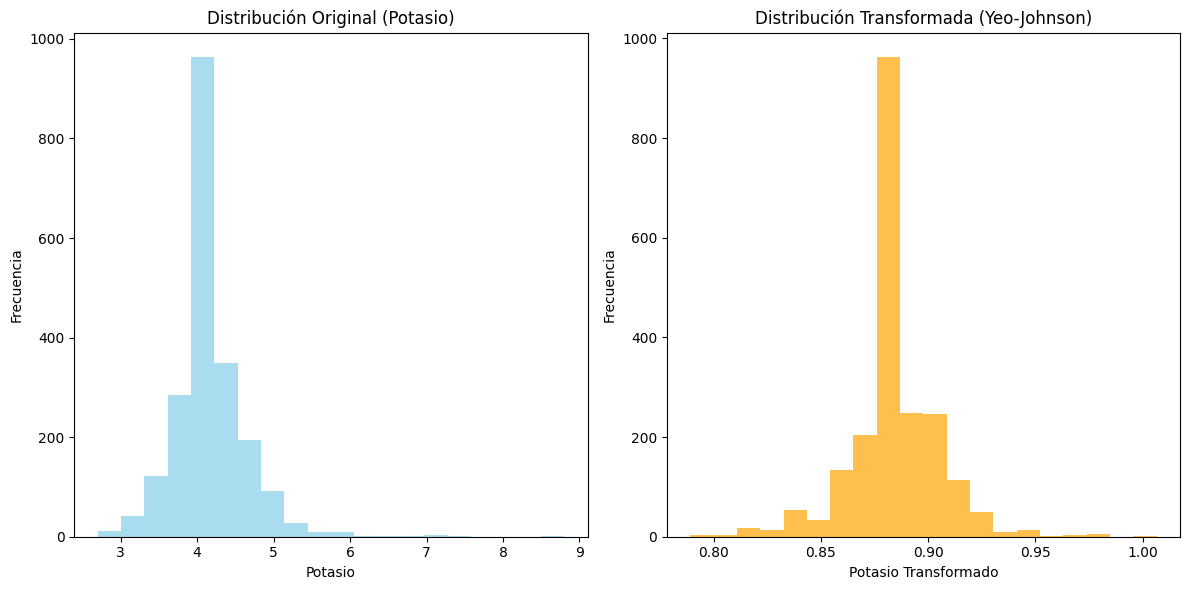

In [48]:
# Verificar y manejar valores nulos
if df["potasio"].isnull().any():
    print("Advertencia: Se encontraron valores nulos en 'potasio'. Se reemplazarán por la media.")
    df["potasio"].fillna(df["potasio"].mean(), inplace=True)

# Inicializar el transformador Yeo-Johnson sin estandarización automática (standardize=False)
transformer = PowerTransformer(method="yeo-johnson", standardize=False)

# Aplicar la transformación Yeo-Johnson a la columna 'potasio'
df["potasio_yj"] = transformer.fit_transform(df[["potasio"]])

# Normalizar los valores transformados con MinMaxScaler
df["potasio_yj_n"] = scaler.fit_transform(df[["potasio_yj"]])

# Visualización de distribuciones antes y después de la transformación
plt.figure(figsize=(12, 6))

# Distribución original de 'potasio'
plt.subplot(1, 2, 1)
plt.hist(df["potasio"], bins=20, alpha=0.7, color='skyblue')
plt.title("Distribución Original (Potasio)")
plt.xlabel("Potasio")
plt.ylabel("Frecuencia")

# Distribución transformada con Yeo-Johnson
plt.subplot(1, 2, 2)
plt.hist(df["potasio_yj"], bins=20, alpha=0.7, color='orange')
plt.title("Distribución Transformada (Yeo-Johnson)")
plt.xlabel("Potasio Transformado")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Este código transforma la variable potasio utilizando Yeo-Johnson, lo que garantiza que los datos se ajusten mejor a una distribución normal. Después de la transformación, se normalizan con MinMaxScaler para ajustarlos al rango de 0 a 1. La visualización permite comparar la distribución original y la distribución transformada, facilitando la validación del impacto de la transformación.

#### cloro

Se encontraron valores nulos en cloro. Se eliminarán o reemplazarán.


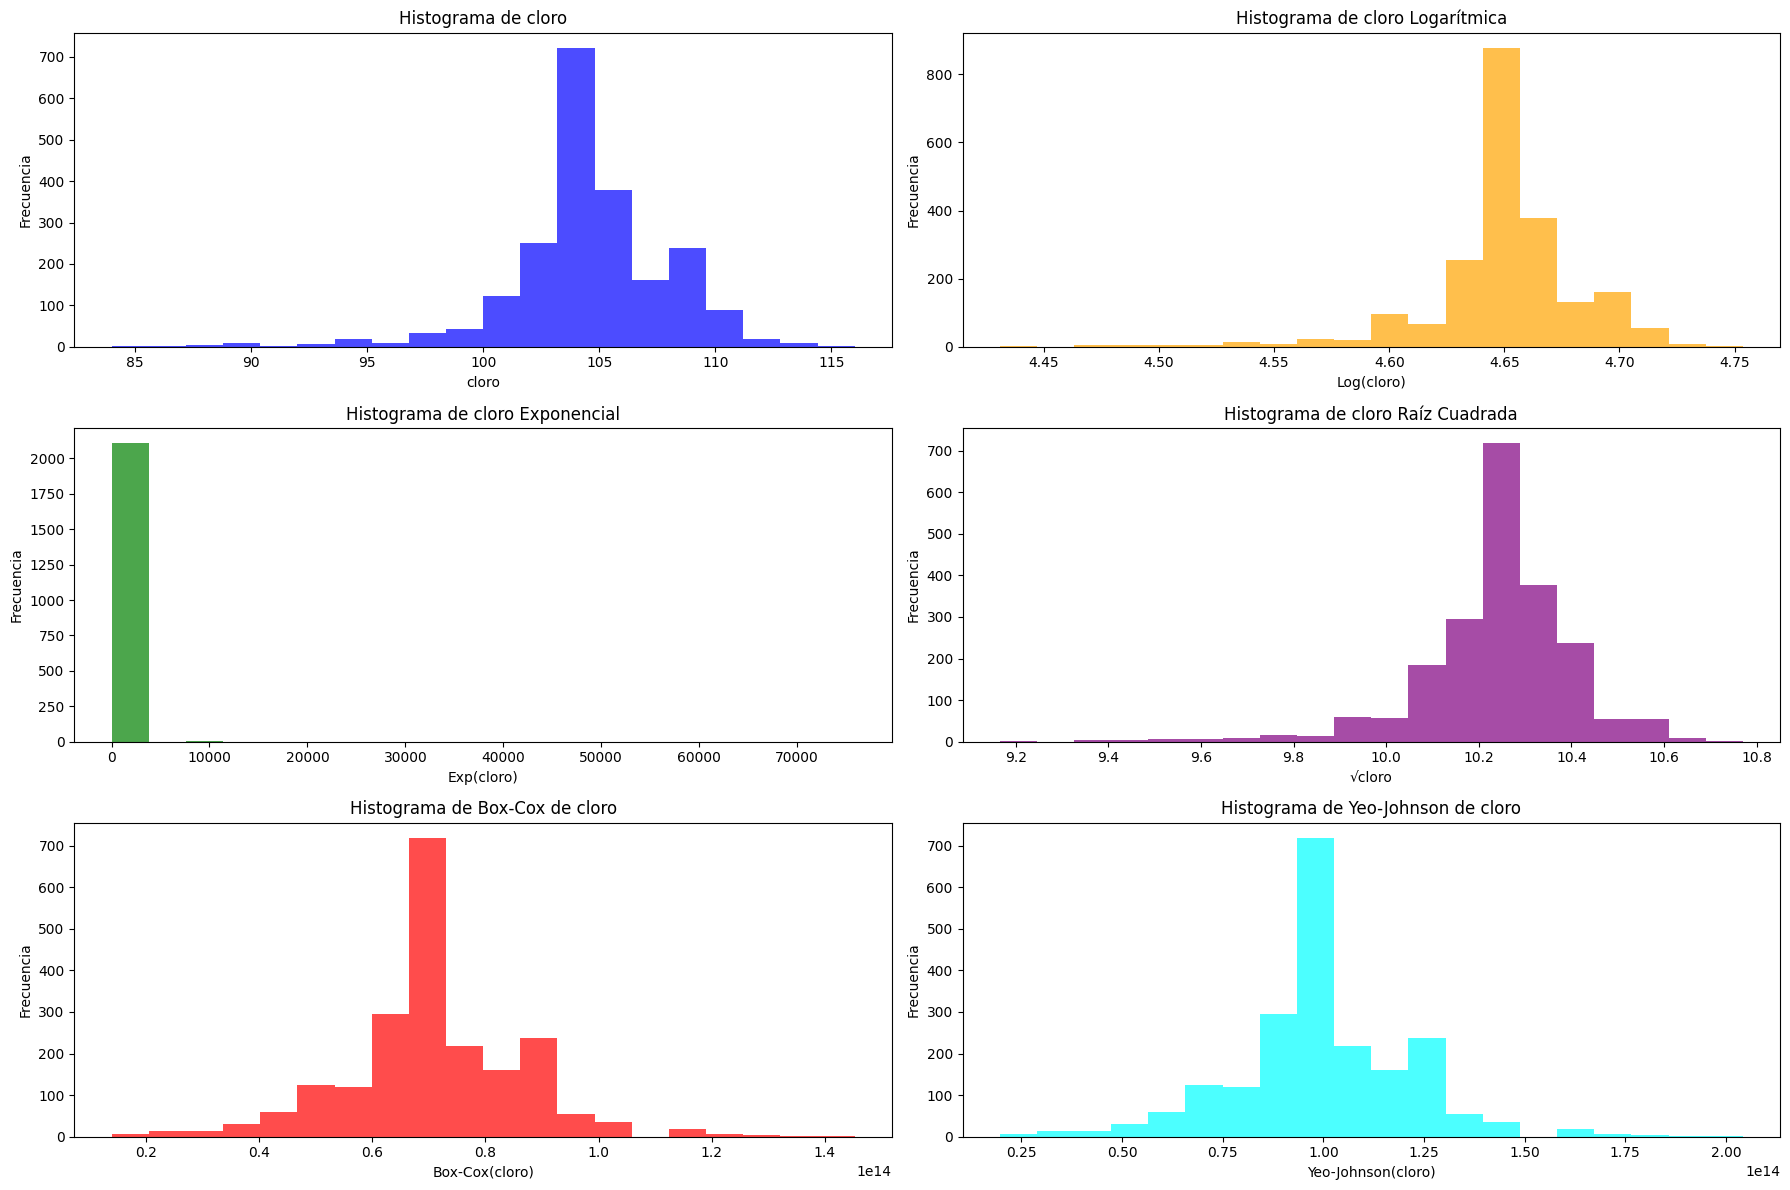


Resultados de normalidad para cloro:
Original: Estadístico = 0.9017, p-value = 0.0000
Logarítmica: Estadístico = 0.8830, p-value = 0.0000
Exponencial: Estadístico = 0.0287, p-value = 0.0000
Raíz Cuadrada: Estadístico = 0.8927, p-value = 0.0000
Box-Cox: Estadístico = 0.9503, p-value = 0.0000
Yeo-Johnson: Estadístico = 0.9503, p-value = 0.0000


In [49]:
analizar_variable(df, "cloro")

Este análisis asegura que los datos de la columna 'cloro' estén preparados para su uso en modelos predictivos o análisis estadísticos. Esto garantiza que los datos estén en las mejores condiciones posibles para su análisis, mejorando la precisión y rendimiento de los modelos.

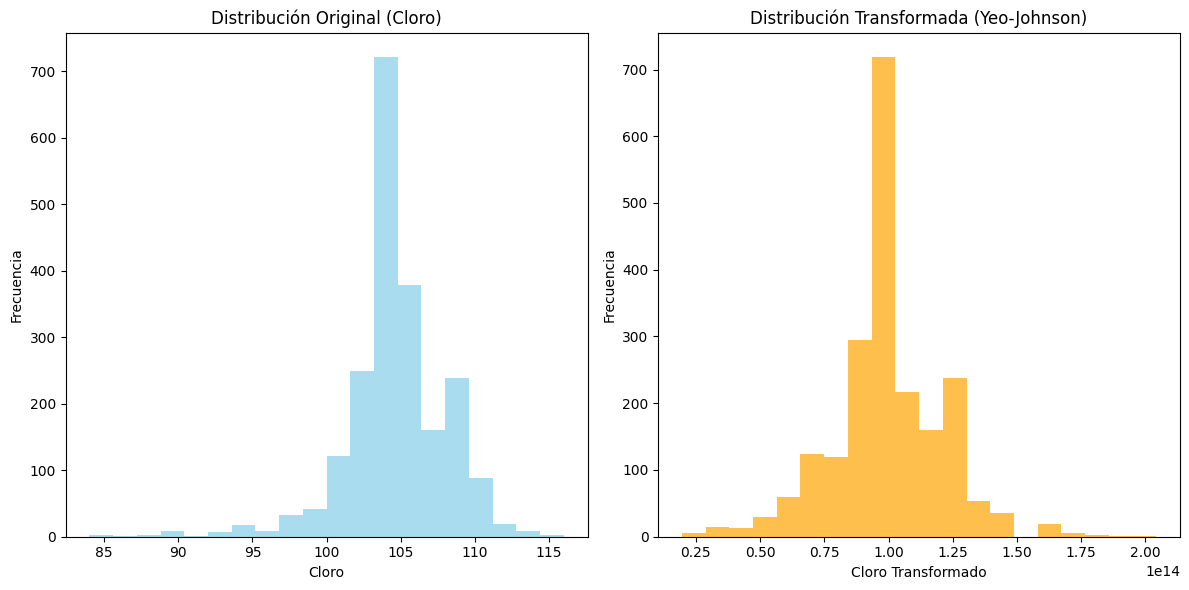

In [50]:
# Verificar y manejar valores nulos
if df["cloro"].isnull().any():
    print("Advertencia: Se encontraron valores nulos en 'cloro'. Se reemplazarán por la media.")
    df["cloro"].fillna(df["cloro"].mean(), inplace=True)

# Inicializar el transformador Yeo-Johnson sin estandarización automática (standardize=False)
transformer = PowerTransformer(method="yeo-johnson", standardize=False)

# Aplicar la transformación Yeo-Johnson a la columna 'cloro'
df["cloro_yj"] = transformer.fit_transform(df[["cloro"]])

# Normalizar los valores transformados con MinMaxScaler
df["cloro_yj_n"] = scaler.fit_transform(df[["cloro_yj"]])

# Visualización de las distribuciones antes y después de la transformación
plt.figure(figsize=(12, 6))

# Distribución original de 'cloro'
plt.subplot(1, 2, 1)
plt.hist(df["cloro"], bins=20, alpha=0.7, color='skyblue')
plt.title("Distribución Original (Cloro)")
plt.xlabel("Cloro")
plt.ylabel("Frecuencia")

# Distribución transformada con Yeo-Johnson
plt.subplot(1, 2, 2)
plt.hist(df["cloro_yj"], bins=20, alpha=0.7, color='orange')
plt.title("Distribución Transformada (Yeo-Johnson)")
plt.xlabel("Cloro Transformado")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Este código aplica la transformación Yeo-Johnson en la variable cloro, lo que garantiza que los datos puedan manejar valores cero o negativos y se ajusten mejor a una distribución normal. Posteriormente, los valores se normalizan con MinMaxScaler. La visualización permite comparar la distribución original y la distribución transformada, validando el efecto de la transformación en los datos.

### Variables finales

In [51]:
num_vars_entrada = ["edad_n", "peso_yj_n", "tallacm_n", "imc_yj_n", "hto_yj_n","leucostotales_yj_n", "neutrofilos_yj_n", "tp_yj_n", "ttp_yj_n", "glucosa_yj_n", "bun_yj_n",
            "creatinina_yj_n", "sodio_yj_n", "potasio_yj_n"]

binary_vars_entrada = ["Diabetes Mellitus (DM)", "Hipertensión (HTA)",
               "Ante_IAM", "ante_arritmia", "otrosantecedentesimportantes",
               "cirugaprevia", "alcoholismo", "tabaquismo", "otros", "valoracion_cardiovascular",
               "primeraqx", "fr_anormal", "plaquetaanormal", "tpanormal", "ttpanormal", "glucosaanormal",
               "creatanormal", "esanormales", "repeticn_examen", "obesidad", "hiperglucemia",
               "bhcanormal", "qsanormal", "sexo_binary", "anestesia_2",
               "anestesia_3", "anestesia_4", "anestesia_5", "nitritos_binary", "egoinfeccin_binary"]

Variables Numéricas (num_vars_entrada):
Estas variables han sido transformadas y normalizadas, lo que garantiza que los datos tengan una distribución más adecuada y una escala uniforme. Esto es crucial para modelos predictivos como regresión lineal o redes neuronales, que funcionan mejor con datos distribuidos de forma normal y con una magnitud controlada.

Variables Binarias (binary_vars_entrada):
Estas variables capturan características dicotómicas del paciente (por ejemplo, presencia o ausencia de enfermedades o hábitos). Los modelos predictivos suelen utilizar estas variables para hacer clasificaciones o cálculos de probabilidades.

In [52]:
var_salida = ["riesgo_quirurgico"]

Variable Objetivo:
"riesgo_quirurgico" es la variable de salida que el modelo tratará de predecir o clasificar. Por ejemplo, en un modelo de clasificación, esta variable podría tener valores como:

    1: Riesgo bajo
    2: Riesgo medio
    3: Riesgo alto

Importancia en Modelos Predictivos:
Esta variable se utilizará como referencia durante el entrenamiento del modelo. El objetivo es que, con base en las variables de entrada, el modelo pueda predecir el nivel de riesgo quirúrgico para nuevos pacientes.

In [53]:
for col in binary_vars_entrada:
    if df[col].isnull().any():
        moda = df[col].mode()[0]
        print(f"Advertencia: Se encontraron valores nulos en '{col}'. Se reemplazarán con la moda ({moda}).")
        df[col].fillna(moda, inplace=True)

Advertencia: Se encontraron valores nulos en 'Diabetes Mellitus (DM)'. Se reemplazarán con la moda (0.0).
Advertencia: Se encontraron valores nulos en 'Hipertensión (HTA)'. Se reemplazarán con la moda (0.0).
Advertencia: Se encontraron valores nulos en 'Ante_IAM'. Se reemplazarán con la moda (0.0).
Advertencia: Se encontraron valores nulos en 'ante_arritmia'. Se reemplazarán con la moda (0.0).
Advertencia: Se encontraron valores nulos en 'otrosantecedentesimportantes'. Se reemplazarán con la moda (0.0).
Advertencia: Se encontraron valores nulos en 'fr_anormal'. Se reemplazarán con la moda (0.0).
Advertencia: Se encontraron valores nulos en 'plaquetaanormal'. Se reemplazarán con la moda (0.0).
Advertencia: Se encontraron valores nulos en 'tpanormal'. Se reemplazarán con la moda (0.0).
Advertencia: Se encontraron valores nulos en 'ttpanormal'. Se reemplazarán con la moda (0.0).
Advertencia: Se encontraron valores nulos en 'glucosaanormal'. Se reemplazarán con la moda (0.0).
Advertencia: 

El código revisa cada variable en binary_vars_entrada para verificar si contiene valores nulos. Si se encuentran valores nulos, el código reemplaza esos valores faltantes con la moda (valor más frecuente) de la columna, en lugar de imputar con 0, en caso de que sea necesario.

In [54]:
all_columns = num_vars_entrada + binary_vars_entrada + var_salida

df_filtered = df[all_columns]

file_path = 'variables_quirurgicas_finales.xlsx'

df_filtered.to_excel(file_path, index=False)

Este código selecciona y exporta un subconjunto de columnas relevantes a un archivo Excel, lo que facilita el uso de los datos para análisis adicionales o compartirlos.

### Random forest

In [55]:
X = df[num_vars_entrada]
y = df['riesgo_quirurgico']

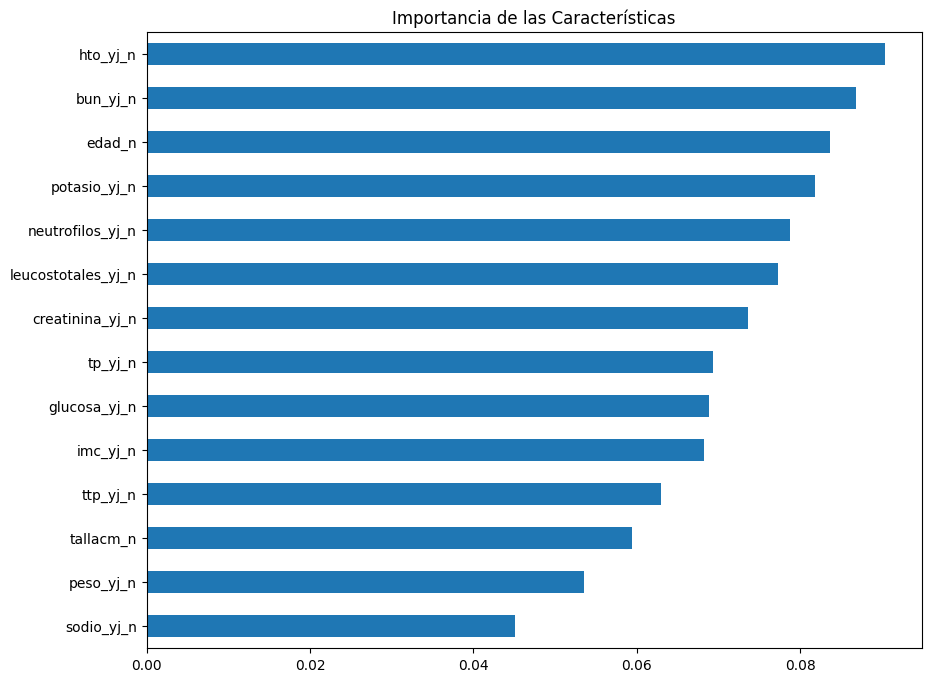

MAE: 0.4237795275590552, R²: 0.1308064227318767


In [56]:
rf = RandomForestRegressor()
rf.fit(X, y)

# Importancia de características
importancia = pd.Series(rf.feature_importances_, index=X.columns)
importancia_sorted = importancia.sort_values(ascending=False)

# Visualización Gráfica de la Importancia de las Características
importancia_sorted.plot(kind='barh', figsize=(10, 8))
plt.title('Importancia de las Características')
plt.gca().invert_yaxis()
plt.show()

# Validación del Modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluación del Modelo
y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}, R²: {r2}")

Este código entrena un modelo de bosque aleatorio para regresión y calcula la importancia de las características en la predicción. La versión mejorada incluye ajustes de hiperparámetros, visualización gráfica de la importancia de las variables, división del conjunto de datos en entrenamiento y prueba, y evaluación del modelo para garantizar un mejor rendimiento.

### Clasificación Logística (No Regresión Lineal)

Coeficientes de la Regresión Logística:
tp_yj_n               0.828400
bun_yj_n              0.776099
potasio_yj_n          0.664592
sodio_yj_n            0.463337
ttp_yj_n              0.411726
edad_n                0.369589
peso_yj_n             0.353452
tallacm_n             0.275726
glucosa_yj_n          0.233240
imc_yj_n              0.191951
leucostotales_yj_n    0.119196
creatinina_yj_n       0.073890
hto_yj_n              0.061789
neutrofilos_yj_n      0.050357
dtype: float64
Precisión del Modelo: 0.5953
Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.53      0.20      0.29       822
           2       0.61      0.88      0.72      1235
           3       0.00      0.00      0.00        58

    accuracy                           0.60      2115
   macro avg       0.38      0.36      0.34      2115
weighted avg       0.56      0.60      0.53      2115

Matriz de Confusión:
[[ 167  655    0]
 [ 143 1092    0]
 [   7   51    0]]

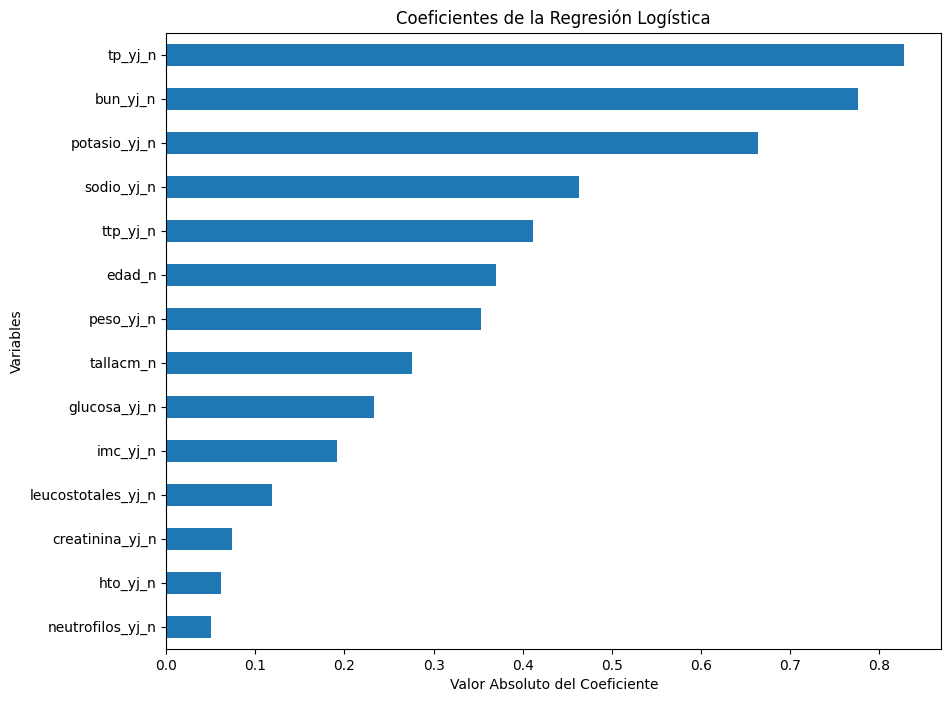

In [57]:
# Modelo de Clasificación Logística en lugar de Regresión Lineal
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# Coeficientes del Modelo
coef = pd.Series(model.coef_[0], index=X.columns).abs().sort_values(ascending=False)
print("Coeficientes de la Regresión Logística:")
print(coef)

# Evaluación del Modelo
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Precisión del Modelo: {accuracy:.4f}")

# Reporte de Clasificación y Matriz de Confusión
print("Reporte de Clasificación:")
print(classification_report(y, y_pred))

print("Matriz de Confusión:")
print(confusion_matrix(y, y_pred))

# Normalización de los Datos (Estándar)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reentrenar el modelo con datos escalados
model.fit(X_scaled, y)

# Visualización de los Coeficientes del Modelo Logístico
coef.plot(kind='barh', figsize=(10, 8))
plt.title('Coeficientes de la Regresión Logística')
plt.xlabel('Valor Absoluto del Coeficiente')
plt.ylabel('Variables')
plt.gca().invert_yaxis()
plt.show()

Este código reemplaza la regresión lineal por un modelo de regresión logística, que es adecuado para problemas de clasificación. Las métricas de clasificación como accuracy, classification report, y la matriz de confusión brindan una evaluación más precisa del rendimiento del modelo. La normalización de los datos con StandardScaler también asegura que las variables numéricas estén en la misma escala para un mejor ajuste del modelo.

### Umbral de la varianza

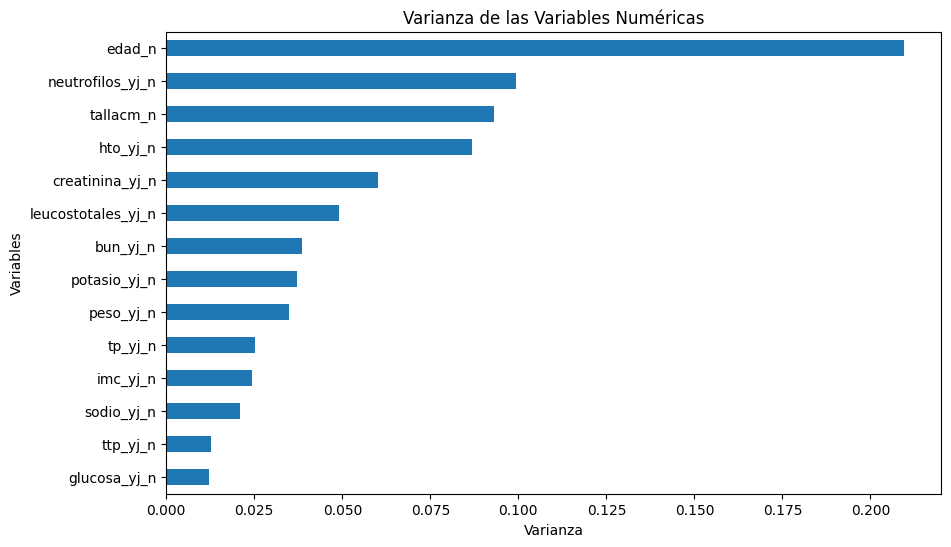

Varianzas de las variables numéricas (ordenadas de mayor a menor):
edad_n                0.209637
neutrofilos_yj_n      0.099385
tallacm_n             0.093193
hto_yj_n              0.086725
creatinina_yj_n       0.060101
leucostotales_yj_n    0.049043
bun_yj_n              0.038440
potasio_yj_n          0.037213
peso_yj_n             0.034962
tp_yj_n               0.025066
imc_yj_n              0.024377
sodio_yj_n            0.020825
ttp_yj_n              0.012675
glucosa_yj_n          0.012216
dtype: float64


In [58]:
variances = X.var()

# Ordenar las varianzas de mayor a menor
sorted_variances = variances.sort_values(ascending=False)

# Visualización de la Varianza
sorted_variances.plot(kind='barh', figsize=(10, 6))
plt.title("Varianza de las Variables Numéricas")
plt.xlabel("Varianza")
plt.ylabel("Variables")
plt.gca().invert_yaxis()
plt.show()

# Mostrar resultados
print("Varianzas de las variables numéricas (ordenadas de mayor a menor):")
print(sorted_variances)

Este código proporciona una visión general de la dispersión de las variables predictoras mediante el cálculo de la varianza.

### PCA

In [59]:
pca = PCA() # pca = PCA(n_components=0.95)  # Mantener 95% de la varianza explicada

In [60]:
pca_t = pca.fit_transform(X)

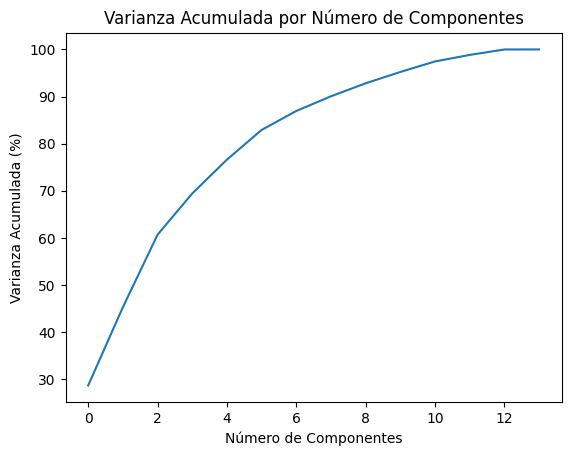

In [61]:
# Visualización de la Varianza Acumulada
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100)
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada (%)')
plt.title('Varianza Acumulada por Número de Componentes')
plt.show()

In [62]:
pcs_labels = [f'PC{i + 1}' for i in range(pca_t.shape[1])]

In [63]:
pcsResumen = pd.DataFrame({
    '% varianza explicada': np.round(pca.explained_variance_ratio_, 4) * 100,
    '% varianza acumulada': np.cumsum(pca.explained_variance_ratio_) * 100
})

pcsResumen.index = pcs_labels

# Mostrar el resumen de varianza explicada por cada componente principal
print(pcsResumen)

      % varianza explicada  % varianza acumulada
PC1                  28.68             28.676018
PC2                  16.60             45.278585
PC3                  15.40             60.676329
PC4                   8.75             69.424705
PC5                   7.18             76.606735
PC6                   6.30             82.907641
PC7                   4.03             86.936645
PC8                   3.12             90.052626
PC9                   2.76             92.813025
PC10                  2.40             95.217009
PC11                  2.23             97.449589
PC12                  1.38             98.832752
PC13                  1.16             99.988616
PC14                  0.01            100.000000


In [64]:
comps_df = pd.DataFrame(
    pca.components_.round(4),  # Coeficientes de las componentes principales
    columns=X.columns,  # Variables originales como columnas
    index=pcs_labels  # Componentes principales como filas
)

# Transponer el DataFrame para que las variables sean filas y las PCs sean columnas
comps_df_transposed = comps_df.T

# Mostrar las primeras 8 columnas (componentes principales) del DataFrame transpuesto
comps_df_transposed.iloc[:, :6]

,PC1,PC2,PC3,PC4,PC5,PC6
edad_n,0.9275,0.1438,0.1535,0.2049,-0.2042,-0.0563
peso_yj_n,-0.0514,0.0380,0.2742,0.0325,-0.1632,0.6737
tallacm_n,-0.1892,0.1632,0.6689,-0.3331,-0.5191,-0.1917
imc_yj_n,0.0111,-0.0123,0.0536,0.1267,0.0080,0.6666
hto_yj_n,-0.1657,-0.1550,0.5154,0.7300,0.2596,-0.2048
leucostotales_yj_n,-0.1291,0.4117,-0.0488,0.2038,0.0359,0.0889
neutrofilos_yj_n,-0.1574,0.7488,-0.2020,0.2734,-0.0941,-0.0637
tp_yj_n,0.0094,0.1803,-0.0515,-0.0928,-0.0984,-0.0450
ttp_yj_n,-0.0189,-0.0382,0.0207,-0.0512,0.0108,-0.0344
glucosa_yj_n,0.0277,0.0900,-0.0023,0.0372,-0.0148,0.0322


In [65]:
pcs_df = pd.DataFrame(pca_t, columns=pcs_labels)

# Extraer las columnas PC1 a PC6
pcs_1_to_6 = pcs_df.loc[:, 'PC1':'PC6']

# Mostrar las primeras filas de los datos extraídos
pcs_1_to_6.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.220685,-0.046512,0.289712,-0.119189,-0.044110,-0.136385
1,-0.932969,0.232451,-0.381182,0.209256,-0.002467,-0.111172
2,0.314980,-0.280194,-0.207718,0.043215,-0.322653,-0.177422
3,-0.133141,-0.220974,-0.149775,-0.132989,0.164482,0.114355
4,0.093376,-0.434232,0.258033,0.078670,0.146095,0.018583


In [66]:
rf_pca = RandomForestRegressor()
rf_pca.fit(pcs_1_to_6, y)

# Importancia de características
importancia_pca = pd.Series(rf_pca.feature_importances_, index=pcs_1_to_6.columns)
importancia_pca_sorted = importancia_pca.sort_values(ascending=False)
print("Importancia de características (ordenadas de mayor a menor):")
print(importancia_pca_sorted)

Importancia de características (ordenadas de mayor a menor):
PC4    0.171827
PC5    0.168603
PC3    0.167672
PC1    0.166654
PC2    0.164721
PC6    0.160524
dtype: float64


Podemos guardar la matriz de PCA para transformar los datos en el entrenamiento. Se usan los primeros 6 para tener el 80% de la información.

#### Xi cuadrado

In [67]:
# Seleccionar las variables binarias
X_binarias = df[binary_vars_entrada]

# Variable de salida ya está codificada
y = df['riesgo_quirurgico']  # Variable de salida (ya categorizada)

# Calcular el chi-cuadrado para cada variable binaria
chi2_vals, p_vals = chi2(X_binarias, y)

# Crear un DataFrame para mostrar los resultados
chi2_results = pd.DataFrame({
    'Variable': X_binarias.columns,
    'Chi-Squared Value': chi2_vals,
    'p-value': p_vals
})

# Ordenar las variables por el valor de Chi-cuadrado
chi2_results_sorted = chi2_results.sort_values(by='Chi-Squared Value', ascending=False)

# Mostrar los resultados
chi2_results_sorted

,Variable,Chi-Squared Value,p-value
25,anestesia_3,192.229123,1.811241e-42
24,anestesia_2,12.977618,1.520359e-03
18,repeticn_examen,12.553821,1.879198e-03
26,anestesia_4,9.437956,8.924294e-03
17,esanormales,9.277230,9.671082e-03
28,nitritos_binary,8.992121,1.115285e-02
12,plaquetaanormal,7.645922,2.186297e-02
23,sexo_binary,6.782216,3.367135e-02
13,tpanormal,6.072145,4.802312e-02
4,otrosantecedentesimportantes,5.360941,6.853090e-02


Este código calcula correctamente el test chi-cuadrado sin la necesidad de aplicar LabelEncoder, ya que la variable de salida está codificada de antemano. Los resultados proporcionan una visión clara de la relación entre las variables binarias y la variable de salida, ordenando las variables por su valor de chi-cuadrado para facilitar la interpretación.

Chi-Squared Value: Un valor alto indica una mayor relación entre la variable binaria y la variable de salida.

p-value: Un p-value bajo (menor a un umbral, como 0.05) indica que la relación es estadísticamente significativa.

Por lo tanto las primeras 10 son significativas.

In [68]:
# Filtrar Variables Significativas
significant_vars = chi2_results[chi2_results['p-value'] < 0.05]
print("Variables con asociación significativa:")
print(significant_vars)

Variables con asociación significativa:
           Variable  Chi-Squared Value       p-value
12  plaquetaanormal           7.645922  2.186297e-02
13        tpanormal           6.072145  4.802312e-02
17      esanormales           9.277230  9.671082e-03
18  repeticn_examen          12.553821  1.879198e-03
23      sexo_binary           6.782216  3.367135e-02
24      anestesia_2          12.977618  1.520359e-03
25      anestesia_3         192.229123  1.811241e-42
26      anestesia_4           9.437956  8.924294e-03
28  nitritos_binary           8.992121  1.115285e-02


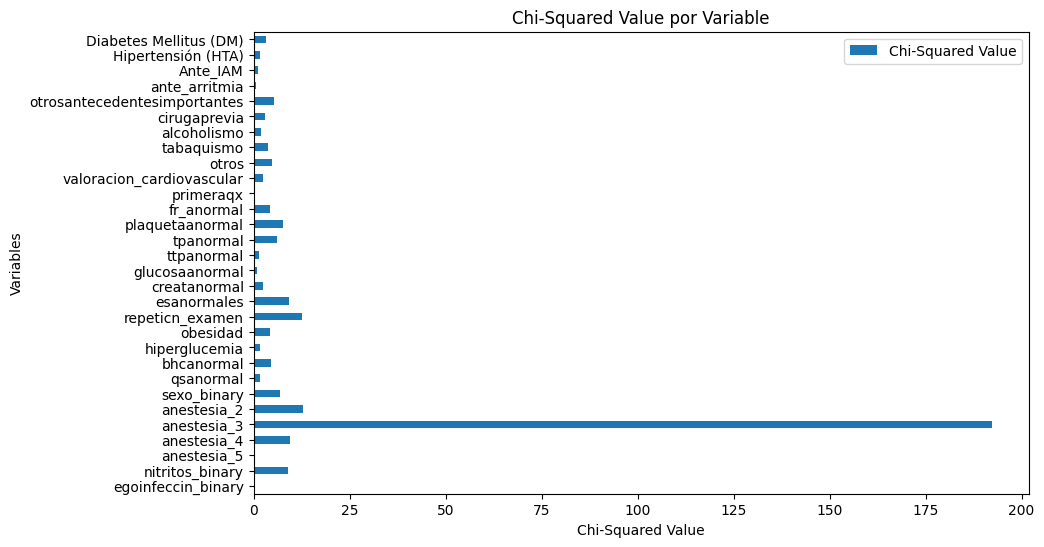

In [69]:
# Visualización de los Resultados
chi2_results.plot(kind='barh', x='Variable', y='Chi-Squared Value', figsize=(10, 6))
plt.title('Chi-Squared Value por Variable')
plt.xlabel('Chi-Squared Value')
plt.ylabel('Variables')
plt.gca().invert_yaxis()
plt.show()

In [70]:
# Verificación de Valores Nulos
if X_binarias.isnull().any().any():
    print("Advertencia: Existen valores nulos en las variables binarias.")
    X_binarias.fillna(0, inplace=True)

Este código calcula el Chi-cuadrado para evaluar la relación entre variables binarias y la variable de salida. Las mejoras sugeridas incluyen:

  * Filtrar variables significativas usando los p-valores.
    
  * Visualizar los resultados con un gráfico de barras.
    
  * Manejar valores nulos para evitar errores.
    
  * Dividir los datos en entrenamiento y prueba para evitar sesgos.

Estas mejoras ayudan a identificar características relevantes de manera más eficiente y garantizan que los datos estén bien preparados para su uso en modelos predictivos.

### Conclusión

La ingeniería de características es una etapa clave en los proyectos de análisis de datos y machine learning. Implica la creación, selección y transformación de variables relevantes a partir de los datos brutos para mejorar el rendimiento de los modelos predictivos. Las características bien diseñadas permiten que los algoritmos de aprendizaje automático detecten patrones más significativos y proporcionen mejores resultados.
Importancia de la Ingeniería de Características:

  * Mejora el rendimiento del modelo: La calidad de las características influye directamente en la capacidad del modelo para generalizar sobre datos nuevos.
  
  * Reducción de ruido: La creación de variables más informativas puede disminuir la complejidad del modelo y reducir el riesgo de sobreajuste (overfitting).
    
  * Adaptación a diferentes modelos: Algunas técnicas (como normalización o codificación) aseguran que los datos sean compatibles con distintos algoritmos.
    
  * Automatización limitada: Aunque existen herramientas como AutoML, la ingeniería de características sigue siendo una tarea que requiere conocimiento del dominio y creatividad.

La ingeniería de características es un arte y una ciencia que requiere tanto habilidades técnicas como un buen entendimiento del contexto de los datos. Modelos avanzados, como redes neuronales, dependen menos de la ingeniería manual, pero en la mayoría de los casos, una buena ingeniería de características sigue siendo crítica para obtener modelos eficaces y eficientes. El éxito de un proyecto de machine learning depende no solo del algoritmo seleccionado, sino también de las características con las que se alimenta.

Se utilizaron diversas técnicas de procesamiento, entre ellas las siguientes:

  * Codificación One-Hot para las variables Sexo, Nitritos, Egoinfeccin, entre otras: Estas variables fueron codificadas para que los algoritmos puedan manejarlas adecuadamente, transformando cada categoría en una variable binaria independiente.
    
  * Codificación One-Hot para la variable clasificaciónanestes: Esta técnica se aplicó para tratar las categorías de la variable, pero no con el objetivo de darle un orden explícito, ya que la variable no es ordinal.
    
  * Transformaciones numéricas: Se realizó escalamiento para las variables como edad, peso, talla, IMC, Hto, entre otras. Para algunas de estas variables también se realizaron transformaciones como Normal, Box-Cox o Yeo-Johnson. Se recomendo el uso exclusivo de Yeo-Johnson porque abarca varios casos específicos de transformación, como la exponencial, la raíz cuadrada y la logarítmica, dependiendo del valor de lambda utilizado. Esto significa que, al usar Yeo-Johnson, se prueban automáticamente estas transformaciones entre los diferentes valores de lambda. Además, a diferencia de la transformación de Box-Cox, que solo se aplica a datos estrictamente positivos, Yeo-Johnson puede aplicarse a datos que incluyan valores cero o incluso negativos, lo que lo convierte en una opción más general para la transformación de datos.
  
  * Manejo de valores nulos: Se reemplazaron o eliminaron valores nulos en varias columnas, como tp, ttp, glucosa, bun, entre otras.

Por el lado de métodos de filtrado para la selección de características, concluimos que se deben probar los métodos de selección una vez que se haya construido el modelo baseline. Es difícil predecir cuál método dará mejor resultado sin haberlo validado con el modelo. Se consideró, por ejemplo, el umbral de varianza para eliminar variables con baja varianza, pero la efectividad de estos métodos se determinará mejor una vez que el modelo baseline esté en funcionamiento.

Además, se realizó un análisis utilizando el test de Chi-cuadrado, lo que permitió identificar qué variables categóricas tienen una relación significativa con la variable objetivo, y las primeras 10 variables categóricas resultaron ser las más relevantes para la predicción del modelo.

Por otro lado, también se evaluaron otros métodos de selección, como la correlación o el análisis de componentes principales (PCA), para garantizar que las variables importantes se mantengan en el modelo final.